In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from matplotlib import font_manager as fm

In [2]:
!pwd

/home/yuncheng/Work/yuncheng/DFT_optimization/Project_DFT-optimization/27Feb2025_FigureMaking/Project_arranged/Jupyter-Arranged


In [3]:
!pip install fontlib
!fc-match Arial
sorted(fm.get_font_names())
os.getcwd()

Arial.ttf: "Arial" "Regular"


'/home/yuncheng/Work/yuncheng/DFT_optimization/Project_DFT-optimization/27Feb2025_FigureMaking/Project_arranged/Jupyter-Arranged'

In [4]:
font_path = "/usr/share/fonts/truetype/msttcorefonts/Arial.ttf"
prop = fm.FontProperties(fname=font_path)

## 1. Raw simulated data for 2MFUprojects

### 1.1 2MFU-C1 11G Na+

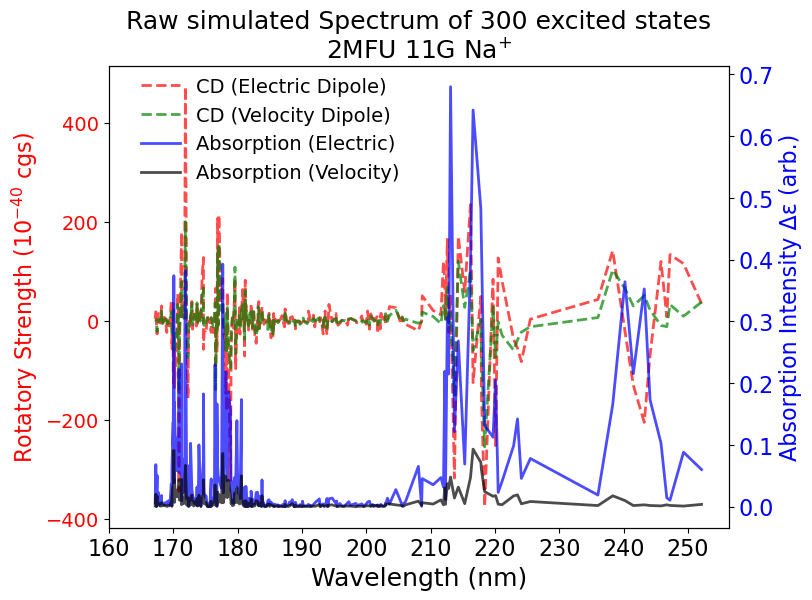

Selected Excited States (Wavelength and R(ELEC)):
     Wavelength(nm)    R(ELEC)
1             252.1   34.68489
10            238.3  141.51871
25            215.3   58.71405
50            202.3   14.98375
100           191.5    2.73281
150           183.9   -1.68282
200           179.1  -13.11220
250           173.2   13.56351
300           167.2    4.62375

Saved to: ../Figures/Raw_TDDFT/Raw_DFT_2MFU_C1_Selected_ExcitedStates.csv


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from matplotlib import font_manager as fm

# Step 0: Prerequisites settings
Taskname = "Raw_DFT_2MFU_C1"
Data_pathway = "../Raw_DFT/11Jun2025_2MFU-C1_TDDFT-TDA_CD_proj24.csv"

# Step 1: Read raw data
globals()[f"filepath_{Taskname}"] = f"{Data_pathway}"
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])

# Step 2: Extract columns
globals()[f"wavelength_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"]
globals()[f"absorption_ELEC_{Taskname}"] = globals()[f"df_{Taskname}"]["fosc(ELEC)"]
globals()[f"absorption_VELO_{Taskname}"] = globals()[f"df_{Taskname}"]["fosc(VELO)"]
globals()[f"cd_ELEC_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"]
globals()[f"cd_VELO_{Taskname}"] = globals()[f"df_{Taskname}"]["R(VELO)"]

# Step 3: Plotting
prop = fm.FontProperties()

# Step 3.1: Create figure and base axis (left y-axis for CD)
globals()[f"fig_{Taskname}"], globals()[f"ax1_{Taskname}"] = plt.subplots(figsize=(8, 6))

# Plot CD on the left y-axis
globals()[f"ax1_{Taskname}"].set_xlabel("Wavelength (nm)", fontproperties=prop, size=18)
globals()[f"ax1_{Taskname}"].set_ylabel("Rotatory Strength (10$^{\\mathrm{-40}}$ cgs)", color="red", fontproperties=prop, size=16)
globals()[f"ax1_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"cd_ELEC_{Taskname}"],
                                  color="red", linestyle="dashed", label="CD (Electric Dipole)", linewidth=2, alpha=0.7)
globals()[f"ax1_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"cd_VELO_{Taskname}"],
                                  color="green", linestyle="dashed", label="CD (Velocity Dipole)", linewidth=2, alpha=0.7)
globals()[f"ax1_{Taskname}"].tick_params(axis='y', labelcolor="red", labelsize=14)

# Step 3.2: Create twin axis (right y-axis for absorption)
# Plot Absorption on the right y-axis
globals()[f"ax2_{Taskname}"] = globals()[f"ax1_{Taskname}"].twinx()
globals()[f"ax2_{Taskname}"].set_ylabel("Absorption Intensity Δε (arb.)", color="blue", fontproperties=prop, size=16)
globals()[f"ax2_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"absorption_ELEC_{Taskname}"],
                                  color="blue", label="Absorption (Electric)", linewidth=2, alpha=0.7)
globals()[f"ax2_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"absorption_VELO_{Taskname}"],
                                  color="black", label="Absorption (Velocity)", linewidth=2, alpha=0.7)
globals()[f"ax2_{Taskname}"].tick_params(axis='y', labelcolor="blue", labelsize=16)

# Step 3.3: X-ticks
plt.xticks(np.arange(160, 251, 10))
globals()[f"ax1_{Taskname}"].tick_params(axis='x', labelcolor="black", labelsize=16)

# Step 4: Legend & Title
globals()[f"fig_{Taskname}"].legend(loc="upper right", fontsize=14, bbox_to_anchor=(0.51, 0.89), frameon=False)
plt.title("Raw simulated Spectrum of 300 excited states\n2MFU 11G Na$^{+}$", fontproperties=prop, size=18)
plt.tight_layout
plt.savefig(f"../Figures/Raw_TDDFT/{Taskname}-Raw_TDDFT.png", dpi=300)
plt.show()

# Step 5: Data on excited states of interest
# Step 5.1: Select specific excited states of interest
states_of_interest = [1, 10, 25, 50, 100, 150, 200, 250, 300] # excited state 1-300

# Extract wavelength and R(ELEC) values for those states
selected_data = globals()[f"df_{Taskname}"].iloc[[i - 1 for i in states_of_interest]][["Wavelength(nm)", "R(ELEC)"]]
selected_data.index = states_of_interest  # Use excited state index as DataFrame index

# # Step 5.2: Print out the selected values
print("Selected Excited States (Wavelength and R(ELEC)):")
print(selected_data)

output_folder = f"../Figures/Raw_TDDFT"  # your desired folder
output_filename = f"{Taskname}_Selected_ExcitedStates.csv"
output_path = os.path.join(output_folder, output_filename)

# Create the folder and save data as CSV.
os.makedirs(output_folder, exist_ok=True)
selected_data.to_csv(output_path)

# Confirmation print
print(f"\nSaved to: {output_path}")


### 1.2 2MFU-C2 8G Na+

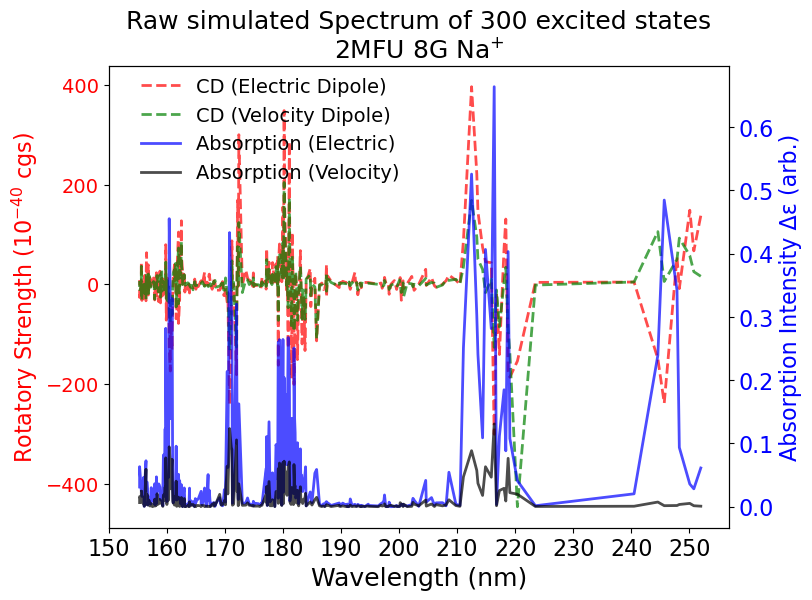

Selected Excited States (Wavelength and R(ELEC)):
     Wavelength(nm)    R(ELEC)
1             252.0  137.53849
10            220.4 -153.62074
25            210.5   -0.19598
50            198.3  -19.83593
100           183.6  -26.93660
150           176.0   -8.02985
200           165.4   -4.48190
250           159.5   -4.73552
300           155.3    8.42324

Saved to: ../Figures/Raw_TDDFT/Raw_DFT_2MFU_C2_Selected_ExcitedStates.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from matplotlib import font_manager as fm

# Step 0: Prerequisites settings
Taskname = "Raw_DFT_2MFU_C2"
Data_pathway = "../Raw_DFT/20May2025_2MFU-C2_TDDFT-TDA_CD_proj25.csv"

# Step 1: Read raw data
globals()[f"filepath_{Taskname}"] = f"{Data_pathway}"
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])

# Step 2: Extract columns
globals()[f"wavelength_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"]
globals()[f"absorption_ELEC_{Taskname}"] = globals()[f"df_{Taskname}"]["fosc(ELEC)"]
globals()[f"absorption_VELO_{Taskname}"] = globals()[f"df_{Taskname}"]["fosc(VELO)"]
globals()[f"cd_ELEC_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"]
globals()[f"cd_VELO_{Taskname}"] = globals()[f"df_{Taskname}"]["R(VELO)"]

# Step 3: Plotting
prop = fm.FontProperties()

# Step 3.1: Create figure and base axis (left y-axis for CD)
globals()[f"fig_{Taskname}"], globals()[f"ax1_{Taskname}"] = plt.subplots(figsize=(8, 6))

# Plot CD on the left y-axis
globals()[f"ax1_{Taskname}"].set_xlabel("Wavelength (nm)", fontproperties=prop, size=18)
globals()[f"ax1_{Taskname}"].set_ylabel("Rotatory Strength (10$^{\\mathrm{-40}}$ cgs)", color="red", fontproperties=prop, size=16)
globals()[f"ax1_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"cd_ELEC_{Taskname}"],
                                  color="red", linestyle="dashed", label="CD (Electric Dipole)", linewidth=2, alpha=0.7)
globals()[f"ax1_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"cd_VELO_{Taskname}"],
                                  color="green", linestyle="dashed", label="CD (Velocity Dipole)", linewidth=2, alpha=0.7)
globals()[f"ax1_{Taskname}"].tick_params(axis='y', labelcolor="red", labelsize=14)

# Step 3.2: Create twin axis (right y-axis for absorption)
# Plot Absorption on the right y-axis
globals()[f"ax2_{Taskname}"] = globals()[f"ax1_{Taskname}"].twinx()
globals()[f"ax2_{Taskname}"].set_ylabel("Absorption Intensity Δε (arb.)", color="blue", fontproperties=prop, size=16)
globals()[f"ax2_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"absorption_ELEC_{Taskname}"],
                                  color="blue", label="Absorption (Electric)", linewidth=2, alpha=0.7)
globals()[f"ax2_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"absorption_VELO_{Taskname}"],
                                  color="black", label="Absorption (Velocity)", linewidth=2, alpha=0.7)
globals()[f"ax2_{Taskname}"].tick_params(axis='y', labelcolor="blue", labelsize=16)

# Step 3.3: X-ticks
plt.xticks(np.arange(150, 251, 10))
globals()[f"ax1_{Taskname}"].tick_params(axis='x', labelcolor="black", labelsize=16)

# Step 4: Legend & Title
globals()[f"fig_{Taskname}"].legend(loc="upper right", fontsize=14, bbox_to_anchor=(0.51, 0.89), frameon=False)
plt.title("Raw simulated Spectrum of 300 excited states\n2MFU 8G Na$^{+}$", fontproperties=prop, size=18)
plt.tight_layout
plt.savefig(f"../Figures/Raw_TDDFT/{Taskname}-Raw_TDDFT.png", dpi=300)
plt.show()

# Step 5: Data on excited states of interest
# Step 5.1: Select specific excited states of interest
states_of_interest = [1, 10, 25, 50, 100, 150, 200, 250, 300] # excited state 1-300

# Extract wavelength and R(ELEC) values for those states
selected_data = globals()[f"df_{Taskname}"].iloc[[i - 1 for i in states_of_interest]][["Wavelength(nm)", "R(ELEC)"]]
selected_data.index = states_of_interest  # Use excited state index as DataFrame index

# # Step 5.2: Print out the selected values
print("Selected Excited States (Wavelength and R(ELEC)):")
print(selected_data)

output_folder = f"../Figures/Raw_TDDFT"  # your desired folder
output_filename = f"{Taskname}_Selected_ExcitedStates.csv"
output_path = os.path.join(output_folder, output_filename)

# Create the folder and save data as CSV.
os.makedirs(output_folder, exist_ok=True)
selected_data.to_csv(output_path)

# Confirmation print
print(f"\nSaved to: {output_path}")


### 1.3 2MFU-C3 11G K+

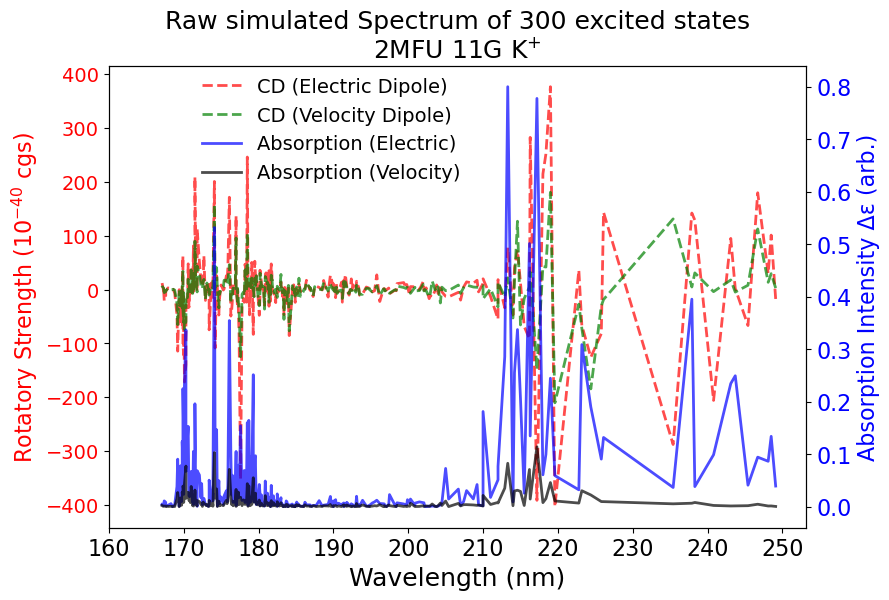

Selected Excited States (Wavelength and R(ELEC)):
     Wavelength(nm)    R(ELEC)
1             249.1  -17.46566
10            237.9  141.85532
25            215.0   12.74194
50            203.2  -14.06806
100           191.4   17.23421
150           183.4  -46.83773
200           179.3  -27.74027
250           173.1    8.21817
300           167.1   13.03661

Saved to: ../Figures/Raw_TDDFT/Raw_DFT_2MFU_C3_Selected_ExcitedStates.csv


In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from matplotlib import font_manager as fm

# Step 0: Prerequisites settings
Taskname = "Raw_DFT_2MFU_C3"
Data_pathway = "../Raw_DFT/20May2025_2MFU-C3_TDDFT-TDA_CD_proj26.csv"

# Step 1: Read raw data
globals()[f"filepath_{Taskname}"] = f"{Data_pathway}"
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])

# Step 2: Extract columns
globals()[f"wavelength_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"]
globals()[f"absorption_ELEC_{Taskname}"] = globals()[f"df_{Taskname}"]["fosc(ELEC)"]
globals()[f"absorption_VELO_{Taskname}"] = globals()[f"df_{Taskname}"]["fosc(VELO)"]
globals()[f"cd_ELEC_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"]
globals()[f"cd_VELO_{Taskname}"] = globals()[f"df_{Taskname}"]["R(VELO)"]

# Step 3: Plotting
prop = fm.FontProperties()

# Step 3.1: Create figure and base axis (left y-axis for CD)
globals()[f"fig_{Taskname}"], globals()[f"ax1_{Taskname}"] = plt.subplots(figsize=(9, 6))

# Plot CD on the left y-axis
globals()[f"ax1_{Taskname}"].set_xlabel("Wavelength (nm)", fontproperties=prop, size=18)
globals()[f"ax1_{Taskname}"].set_ylabel("Rotatory Strength (10$^{\\mathrm{-40}}$ cgs)", color="red", fontproperties=prop, size=16)
globals()[f"ax1_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"cd_ELEC_{Taskname}"],
                                  color="red", linestyle="dashed", label="CD (Electric Dipole)", linewidth=2, alpha=0.7)
globals()[f"ax1_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"cd_VELO_{Taskname}"],
                                  color="green", linestyle="dashed", label="CD (Velocity Dipole)", linewidth=2, alpha=0.7)
globals()[f"ax1_{Taskname}"].tick_params(axis='y', labelcolor="red", labelsize=14)

# Step 3.2: Create twin axis (right y-axis for absorption)
# Plot Absorption on the right y-axis
globals()[f"ax2_{Taskname}"] = globals()[f"ax1_{Taskname}"].twinx()
globals()[f"ax2_{Taskname}"].set_ylabel("Absorption Intensity Δε (arb.)", color="blue", fontproperties=prop, size=16)
globals()[f"ax2_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"absorption_ELEC_{Taskname}"],
                                  color="blue", label="Absorption (Electric)", linewidth=2, alpha=0.7)
globals()[f"ax2_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"absorption_VELO_{Taskname}"],
                                  color="black", label="Absorption (Velocity)", linewidth=2, alpha=0.7)
globals()[f"ax2_{Taskname}"].tick_params(axis='y', labelcolor="blue", labelsize=16)

# Step 3.3: X-ticks
plt.xticks(np.arange(160, 251, 10))
globals()[f"ax1_{Taskname}"].tick_params(axis='x', labelcolor="black", labelsize=16)

# Step 4: Legend & Title
globals()[f"fig_{Taskname}"].legend(loc="upper right", fontsize=14, bbox_to_anchor=(0.535, 0.89), frameon=False)
plt.title("Raw simulated Spectrum of 300 excited states\n2MFU 11G K$^{+}$", fontproperties=prop, size=18)
plt.tight_layout
plt.savefig(f"../Figures/Raw_TDDFT/{Taskname}-Raw_TDDFT.png", dpi=300)
plt.show()

# Step 5: Data on excited states of interest
# Step 5.1: Select specific excited states of interest
states_of_interest = [1, 10, 25, 50, 100, 150, 200, 250, 300] # excited state 1-300

# Extract wavelength and R(ELEC) values for those states
selected_data = globals()[f"df_{Taskname}"].iloc[[i - 1 for i in states_of_interest]][["Wavelength(nm)", "R(ELEC)"]]
selected_data.index = states_of_interest  # Use excited state index as DataFrame index

# # Step 5.2: Print out the selected values
print("Selected Excited States (Wavelength and R(ELEC)):")
print(selected_data)

output_folder = f"../Figures/Raw_TDDFT"  # your desired folder
output_filename = f"{Taskname}_Selected_ExcitedStates.csv"
output_path = os.path.join(output_folder, output_filename)

# Create the folder and save data as CSV.
os.makedirs(output_folder, exist_ok=True)
selected_data.to_csv(output_path)

# Confirmation print
print(f"\nSaved to: {output_path}")


### 1.4 2MFU-C4 8G K+

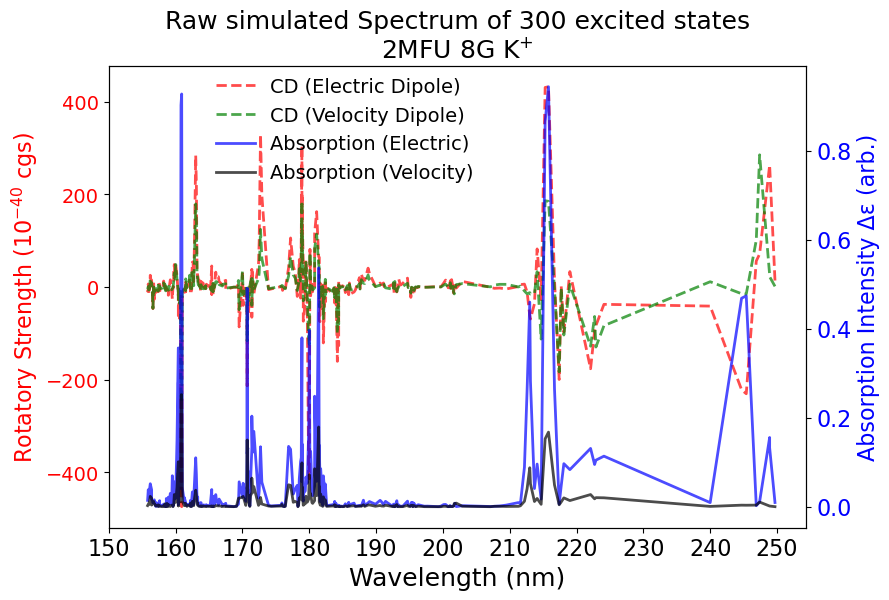

Selected Excited States (Wavelength and R(ELEC)):
     Wavelength(nm)    R(ELEC)
1             249.7   14.15400
10            222.9  -82.98579
25            212.6  -10.63526
50            197.2   -0.00868
100           184.4   12.57853
150           177.2  105.97956
200           165.4   -3.37327
250           160.4    0.20049
300           155.8  -11.00370

Saved to: ../Figures/Raw_TDDFT/Raw_DFT_2MFU_C4_Selected_ExcitedStates.csv


In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from matplotlib import font_manager as fm

# Step 0: Prerequisites settings
Taskname = "Raw_DFT_2MFU_C4"
Data_pathway = "../Raw_DFT/20May2025_2MFU-C4_TDDFT-TDA_CD_proj27.csv"

# Step 1: Read raw data
globals()[f"filepath_{Taskname}"] = f"{Data_pathway}"
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])

# Step 2: Extract columns
globals()[f"wavelength_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"]
globals()[f"absorption_ELEC_{Taskname}"] = globals()[f"df_{Taskname}"]["fosc(ELEC)"]
globals()[f"absorption_VELO_{Taskname}"] = globals()[f"df_{Taskname}"]["fosc(VELO)"]
globals()[f"cd_ELEC_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"]
globals()[f"cd_VELO_{Taskname}"] = globals()[f"df_{Taskname}"]["R(VELO)"]

# Step 3: Plotting
prop = fm.FontProperties()

# Step 3.1: Create figure and base axis (left y-axis for CD)
globals()[f"fig_{Taskname}"], globals()[f"ax1_{Taskname}"] = plt.subplots(figsize=(9, 6))

# Plot CD on the left y-axis
globals()[f"ax1_{Taskname}"].set_xlabel("Wavelength (nm)", fontproperties=prop, size=18)
globals()[f"ax1_{Taskname}"].set_ylabel("Rotatory Strength (10$^{\\mathrm{-40}}$ cgs)", color="red", fontproperties=prop, size=16)
globals()[f"ax1_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"cd_ELEC_{Taskname}"],
                                  color="red", linestyle="dashed", label="CD (Electric Dipole)", linewidth=2, alpha=0.7)
globals()[f"ax1_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"cd_VELO_{Taskname}"],
                                  color="green", linestyle="dashed", label="CD (Velocity Dipole)", linewidth=2, alpha=0.7)
globals()[f"ax1_{Taskname}"].tick_params(axis='y', labelcolor="red", labelsize=14)

# Step 3.2: Create twin axis (right y-axis for absorption)
# Plot Absorption on the right y-axis
globals()[f"ax2_{Taskname}"] = globals()[f"ax1_{Taskname}"].twinx()
globals()[f"ax2_{Taskname}"].set_ylabel("Absorption Intensity Δε (arb.)", color="blue", fontproperties=prop, size=16)
globals()[f"ax2_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"absorption_ELEC_{Taskname}"],
                                  color="blue", label="Absorption (Electric)", linewidth=2, alpha=0.7)
globals()[f"ax2_{Taskname}"].plot(globals()[f"wavelength_{Taskname}"], globals()[f"absorption_VELO_{Taskname}"],
                                  color="black", label="Absorption (Velocity)", linewidth=2, alpha=0.7)
globals()[f"ax2_{Taskname}"].tick_params(axis='y', labelcolor="blue", labelsize=16)

# Step 3.3: X-ticks
plt.xticks(np.arange(150, 251, 10))
globals()[f"ax1_{Taskname}"].tick_params(axis='x', labelcolor="black", labelsize=16)

# Step 4: Legend & Title
globals()[f"fig_{Taskname}"].legend(loc="upper right", fontsize=14, bbox_to_anchor=(0.55, 0.89), frameon=False)
plt.title("Raw simulated Spectrum of 300 excited states\n2MFU 8G K$^{+}$", fontproperties=prop, size=18)
plt.tight_layout
plt.savefig(f"../Figures/Raw_TDDFT/{Taskname}-Raw_TDDFT.png", dpi=300)
plt.show()

# Step 5: Data on excited states of interest
# Step 5.1: Select specific excited states of interest
states_of_interest = [1, 10, 25, 50, 100, 150, 200, 250, 300] # excited state 1-300

# Extract wavelength and R(ELEC) values for those states
selected_data = globals()[f"df_{Taskname}"].iloc[[i - 1 for i in states_of_interest]][["Wavelength(nm)", "R(ELEC)"]]
selected_data.index = states_of_interest  # Use excited state index as DataFrame index

# # Step 5.2: Print out the selected values
print("Selected Excited States (Wavelength and R(ELEC)):")
print(selected_data)

output_folder = f"../Figures/Raw_TDDFT"  # your desired folder
output_filename = f"{Taskname}_Selected_ExcitedStates.csv"
output_path = os.path.join(output_folder, output_filename)

# Create the folder and save data as CSV.
os.makedirs(output_folder, exist_ok=True)
selected_data.to_csv(output_path)

# Confirmation print
print(f"\nSaved to: {output_path}")


## 2. Gaussian / Lorentzian treatement at a fixed width value for 2MFU. 

### (i) Style1: Fixed Gaussian broaden on each individual transition (valid)
### (ii) Style2: Global Gaussian filter (not valid)
### (iii) Style3: Fixed Lorentzian broaden on each individual transition (valid)

### 2.1 Fixed Gaussian Boardening width, with individual contribution of each transition. Redshifted to 325 nm (Style1)

### Valid. Total spectrum can be decomposed to individual contribution of each transition. 

### 2.1.1 2MFU-C1 11G Na.
#### 300 Excited states. 167.2-252.1 nm in Raw data.

[INFO] Redshifted by: 97.9 nm to align max wavelength to 350 nm.
[INFO] Scaled to minimum 202 nm with scale factor: 1.708
[INFO] Exported final Δε spectrum for σ=4 to CSV.
[INFO] Exported final Δε spectrum for σ=5 to CSV.
[INFO] Exported final Δε spectrum for σ=6 to CSV.
[INFO] Exported final Δε spectrum for σ=7 to CSV.
[INFO] Exported final Δε spectrum for σ=8 to CSV.
[INFO] Exported final Δε spectrum for σ=10 to CSV.


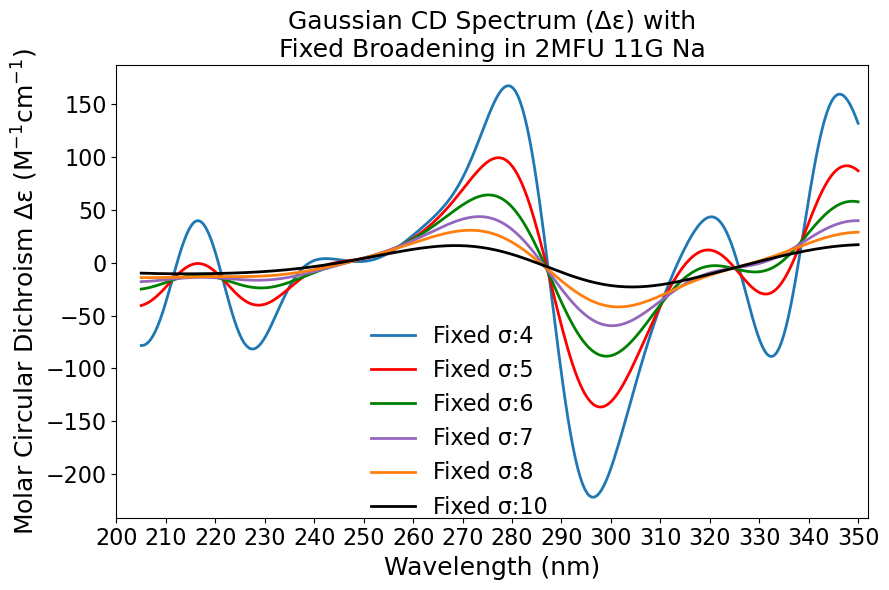

In [8]:
# === Attempt 5 Revised: All Variables as Global ===
# CD Spectrum Construction (Fixed Gaussian Broadening + Norman-style R to DeltaEpsilon Conversion)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
from matplotlib.ticker import MaxNLocator

# === Step 0: Prerequisites settings ===
Taskname = "Style1_FixedGauss_Norman5_2MFU_C3"
globals()[f"filepath_{Taskname}"] = f"../Raw_DFT/11Jun2025_2MFU-C1_TDDFT-TDA_CD_proj24.csv"
os.makedirs("../Delta_Eps", exist_ok=True)

# === Step 1: Read raw CD data (from TDDFT) ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region of interest (130 to 250 nm) ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 255)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Construct wavelength grid (before redshift/scale) ===
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)

# === Step 4: Gaussian broadening (still in R units) ===
globals()[f"sigmas_{Taskname}"] = [4, 5, 6, 7, 8, 10]
for sigma in globals()[f"sigmas_{Taskname}"]:
    spectrum = np.zeros_like(globals()[f"x_grid_{Taskname}"])
    for wl_i, R_i in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
        gauss = R_i * np.exp(-0.5 * ((globals()[f"x_grid_{Taskname}"] - wl_i) / sigma)**2)
        gauss /= sigma * np.sqrt(2 * np.pi)
        spectrum += gauss
    globals()[f"spectrum_sigma_{sigma}_{Taskname}"] = spectrum

# === Step 5: Redshift the grid to max = 320 nm ===
globals()[f"current_max_{Taskname}"] = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - globals()[f"current_max_{Taskname}"]
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]
print(f"[INFO] Redshifted by: {round(globals()[f'redshift_{Taskname}'], 2)} nm to align max wavelength to 350 nm.")

# === Step 6: Scale to make min = 202 nm ===
globals()[f"current_min_{Taskname}"] = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - globals()[f"current_min_{Taskname}"])
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]
print(f"[INFO] Scaled to minimum 202 nm with scale factor: {round(globals()[f'scale_factor_{Taskname}'], 3)}")

# === Step 7: Convert R to Δε (Delta epsilon) ===
for sigma in globals()[f"sigmas_{Taskname}"]:
    conversion_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * sigma) * np.pi
    globals()[f"spectrum_converted_sigma_{sigma}_{Taskname}"] = globals()[f"spectrum_sigma_{sigma}_{Taskname}"] * conversion_factor

# === Step 8: Export each spectrum to CSV ===
for sigma in globals()[f"sigmas_{Taskname}"]:
    export_df = pd.DataFrame({
        "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
        "Delta_epsilon(M^-1 cm^-1)": globals()[f"spectrum_converted_sigma_{sigma}_{Taskname}"]
    })
    export_df.to_csv(f"../Delta_Eps/{Taskname}_FixedGaussian_Sigma{sigma}.csv", index=False)
    print(f"[INFO] Exported final Δε spectrum for σ={sigma} to CSV.")

# === Step 9: Plotting ===
fig, ax = plt.subplots(figsize=(9,6))
colors = ["#1f77b4", "red", "green", "#9467bd", "#ff7f0e", "black"]
labels = [f"Fixed σ:{sigma}" for sigma in globals()[f"sigmas_{Taskname}"]]

for sigma, color, label in zip(globals()[f"sigmas_{Taskname}"], colors, labels):
    ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"spectrum_converted_sigma_{sigma}_{Taskname}"], color=color, label=label, linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontsize=18)
ax.set_ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 352, 10), fontsize=16)
plt.yticks(fontsize=16) 
ax.set_xlim(200, 352)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.60, 0.47))
plt.title(f"Gaussian CD Spectrum (Δε) with\nFixed Broadening in 2MFU 11G Na", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Fixed_Gaussian/{Taskname}-Fixed_Gaussian_Comparison_Depsilon.png", dpi=300)
plt.show()


[INFO] Exported Lorentzian Δε for γ=4
[INFO] Exported Lorentzian Δε for γ=5
[INFO] Exported Lorentzian Δε for γ=6
[INFO] Exported Lorentzian Δε for γ=7
[INFO] Exported Lorentzian Δε for γ=8
[INFO] Exported Lorentzian Δε for γ=10


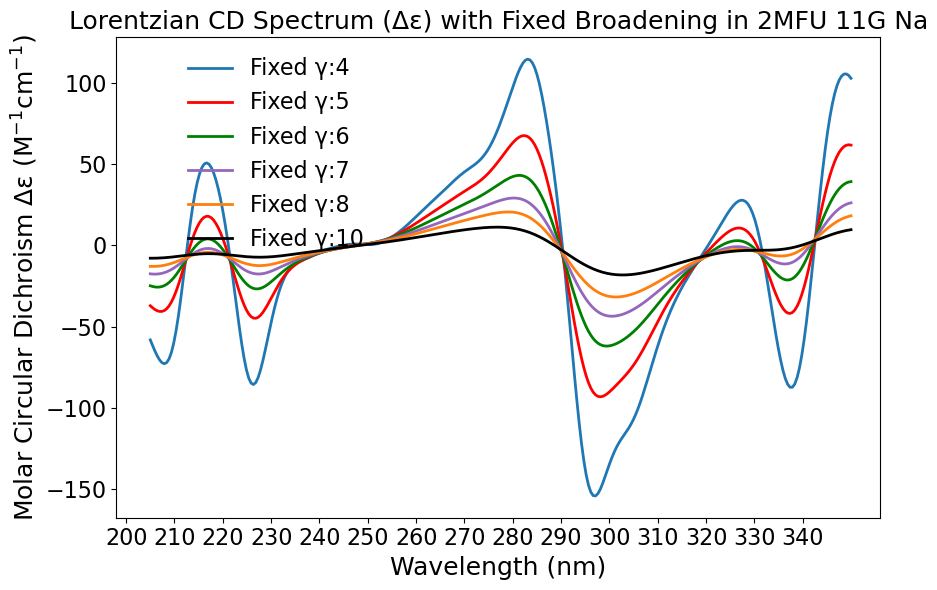

In [9]:
# === Attempt 8: Norman-style CD Spectrum with Lorentzian broadening ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# === Step 0: Prerequisites settings ===
Taskname = "Style2_FixedLorentz_Norman8_2MFU_C1"
globals()[f"filepath_{Taskname}"] = f"../Raw_DFT/11Jun2025_2MFU-C1_TDDFT-TDA_CD_proj24.csv"
os.makedirs("../Delta_Eps", exist_ok=True)

# === Step 1: Read raw CD data ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region of interest ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 250)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Construct wavelength grid ===
globals()[f"gamma_values_{Taskname}"] = [4, 5, 6, 7, 8, 10]
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)

# === Step 4: Lorentzian broadening (still in R units) ===
for gamma in globals()[f"gamma_values_{Taskname}"]:
    spec = np.zeros_like(globals()[f"x_grid_{Taskname}"])
    for wl_i, R_i in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
        lorentz = R_i * (gamma / np.pi) / ((globals()[f"x_grid_{Taskname}"] - wl_i)**2 + gamma**2)
        spec += lorentz
    globals()[f"spectrum_lorentz_gamma{gamma}_{Taskname}"] = spec

# === Step 5: Redshift → max → 320 nm ===
current_max = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]

# === Step 6: Rescale → min → 202 nm ===
current_min = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]

# === Step 7: Convert R to Δε (Norman-style for Lorentzian, no π compensation needed) ===
for gamma in globals()[f"gamma_values_{Taskname}"]:
    conv_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * gamma) * np.pi
    globals()[f"deltaeps_lorentz_gamma{gamma}_{Taskname}"] = globals()[f"spectrum_lorentz_gamma{gamma}_{Taskname}"] * conv_factor

# === Step 8: Export CSV ===
for gamma in globals()[f"gamma_values_{Taskname}"]:
    export_df = pd.DataFrame({
        "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
        "Delta_epsilon(M^-1 cm^-1)": globals()[f"deltaeps_lorentz_gamma{gamma}_{Taskname}"]
    })
    export_df.to_csv(f"../Delta_Eps/{Taskname}_FixedLorentzian_Gamma{gamma}.csv", index=False)
    print(f"[INFO] Exported Lorentzian Δε for γ={gamma}")

# === Step 9: Plot ===
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,6))
colors = ["#1f77b4", "red", "green", "#9467bd", "#ff7f0e", "black"]
labels = [f"Fixed γ:{gamma}" for gamma in globals()[f"gamma_values_{Taskname}"]]

for gamma, color, label in zip(globals()[f"gamma_values_{Taskname}"], colors, labels):
    ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"deltaeps_lorentz_gamma{gamma}_{Taskname}"], color=color, label=label, linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontsize=18)
ax.set_ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 341, 10), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(198, 356)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.35, 1.00))
plt.title(f"Lorentzian CD Spectrum (Δε) with Fixed Broadening in 2MFU 11G Na", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Fixed_Lorentzian/{Taskname}-Fixed_Lorentzian_Comparison_Depsilon.png", dpi=300)
plt.show()


[INFO] Exported Voigt Δε for width=4
[INFO] Exported Voigt Δε for width=5
[INFO] Exported Voigt Δε for width=6
[INFO] Exported Voigt Δε for width=7
[INFO] Exported Voigt Δε for width=8
[INFO] Exported Voigt Δε for width=10


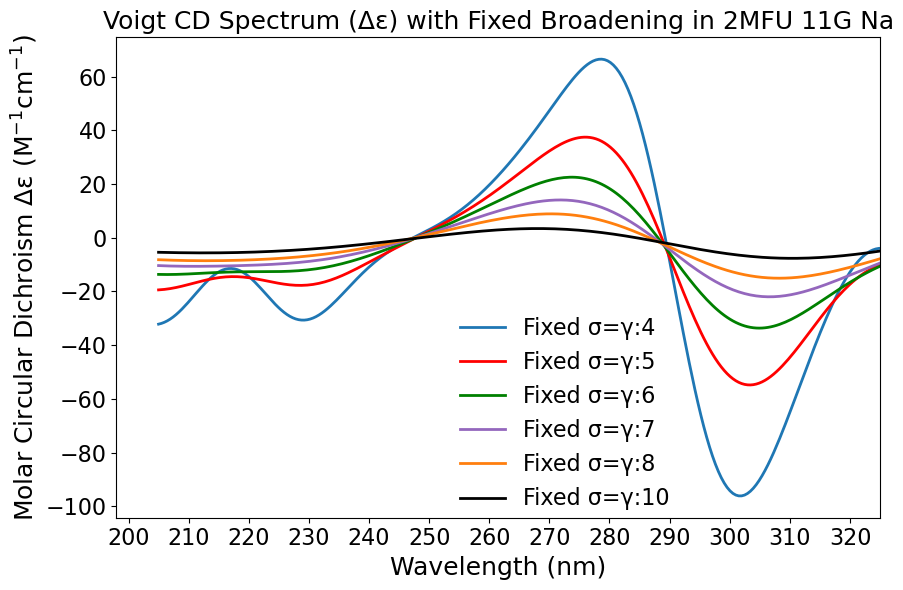

In [10]:
# === Attempt 9: Norman-style CD Spectrum with Voigt broadening (σ=γ) ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.special import wofz  # Voigt profile

# === Step 0: Prerequisites settings ===
Taskname = "Style3_FixedVoigt_Norman9_2MFU_C1"
globals()[f"filepath_{Taskname}"] = f"../Raw_DFT/11Jun2025_2MFU-C1_TDDFT-TDA_CD_proj24.csv"
os.makedirs("../Delta_Eps", exist_ok=True)

# === Step 1: Read raw CD data ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region of interest ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 250)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Construct wavelength grid ===
globals()[f"voigt_widths_{Taskname}"] = [4, 5, 6, 7, 8, 10]
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)

# === Step 4: Voigt broadening (still in R units) ===
for width in globals()[f"voigt_widths_{Taskname}"]:
    spec = np.zeros_like(globals()[f"x_grid_{Taskname}"])
    sigma = width
    gamma = width
    for wl_i, R_i in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
        z = ((globals()[f"x_grid_{Taskname}"] - wl_i) + 1j * gamma) / (sigma * np.sqrt(2))
        voigt = np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi))  # normalized Voigt
        spec += R_i * voigt
    globals()[f"spectrum_voigt_width{width}_{Taskname}"] = spec

# === Step 5: Redshift → max = 320 nm ===
current_max = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]

# === Step 6: Rescale → min = 202 nm ===
current_min = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]

# === Step 7: Convert R → Δε using Norman-style ===
for width in globals()[f"voigt_widths_{Taskname}"]:
    conv_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * width) * np.pi
    globals()[f"deltaeps_voigt_width{width}_{Taskname}"] = globals()[f"spectrum_voigt_width{width}_{Taskname}"] * conv_factor

# === Step 8: Export CSVs ===
for width in globals()[f"voigt_widths_{Taskname}"]:
    export_df = pd.DataFrame({
        "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
        "Delta_epsilon(M^-1 cm^-1)": globals()[f"deltaeps_voigt_width{width}_{Taskname}"]
    })
    export_df.to_csv(f"../Delta_Eps/{Taskname}_FixedVoigt_Width{width}.csv", index=False)
    print(f"[INFO] Exported Voigt Δε for width={width}")

# === Step 9: Plotting ===
fig, ax = plt.subplots(figsize=(9,6))
colors = ["#1f77b4", "red", "green", "#9467bd", "#ff7f0e", "black"]
labels = [f"Fixed σ=γ:{w}" for w in globals()[f"voigt_widths_{Taskname}"]]

for width, color, label in zip(globals()[f"voigt_widths_{Taskname}"], colors, labels):
    ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"deltaeps_voigt_width{width}_{Taskname}"], color=color, label=label, linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontsize=18)
ax.set_ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 341, 10), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(198, 325)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.75, 0.46))
plt.title(f"Voigt CD Spectrum (Δε) with Fixed Broadening in 2MFU 11G Na", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Fixed_Voigt/{Taskname}-Fixed_Voigt_Comparison_Depsilon.png", dpi=300)
plt.show()

### 2.1.2 2MFU-C2 8G Na.
#### 300 Excited states. 155.3-252.0 nm in Raw data.

[INFO] Redshifted by: 98.0 nm to align max wavelength to 320 nm.
[INFO] Scaled to minimum 202 nm with scale factor: 1.499
[INFO] Exported final Δε spectrum for σ=4 to CSV.
[INFO] Exported final Δε spectrum for σ=5 to CSV.
[INFO] Exported final Δε spectrum for σ=6 to CSV.
[INFO] Exported final Δε spectrum for σ=7 to CSV.
[INFO] Exported final Δε spectrum for σ=8 to CSV.
[INFO] Exported final Δε spectrum for σ=10 to CSV.


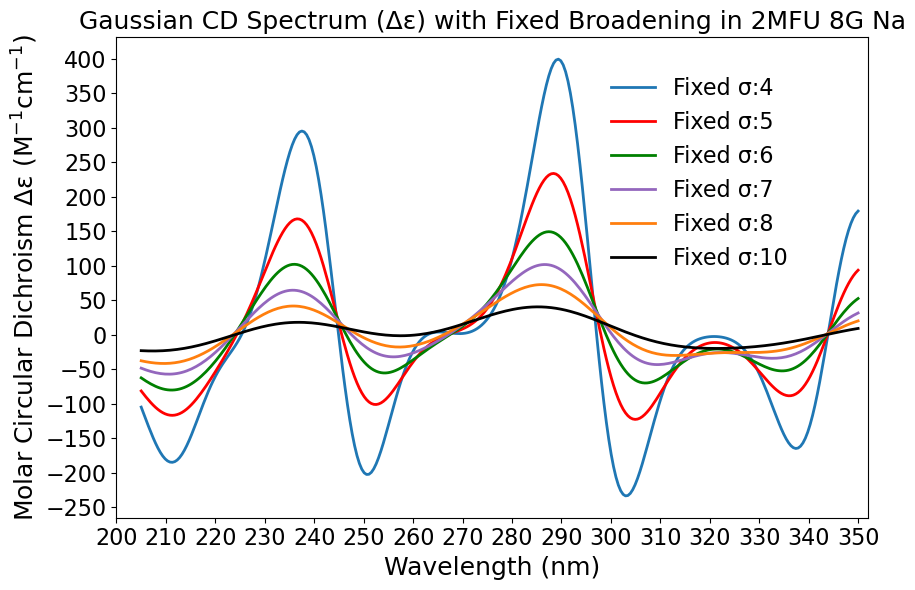

In [33]:
# === Attempt 5 Revised: All Variables as Global ===
# CD Spectrum Construction (Fixed Gaussian Broadening + Norman-style R to DeltaEpsilon Conversion)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
from matplotlib.ticker import MaxNLocator

# === Step 0: Prerequisites settings ===
Taskname = "Style1_FixedGauss_Norman5_2MFU_C2"
globals()[f"filepath_{Taskname}"] = f"../Raw_DFT/20May2025_2MFU-C2_TDDFT-TDA_CD_proj25.csv"
os.makedirs("../Delta_Eps", exist_ok=True)

# === Step 1: Read raw CD data (from TDDFT) ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region of interest (130 to 250 nm) ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 255)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Construct wavelength grid (before redshift/scale) ===
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)

# === Step 4: Gaussian broadening (still in R units) ===
globals()[f"sigmas_{Taskname}"] = [4, 5, 6, 7, 8, 10]
for sigma in globals()[f"sigmas_{Taskname}"]:
    spectrum = np.zeros_like(globals()[f"x_grid_{Taskname}"])
    for wl_i, R_i in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
        gauss = R_i * np.exp(-0.5 * ((globals()[f"x_grid_{Taskname}"] - wl_i) / sigma)**2)
        gauss /= sigma * np.sqrt(2 * np.pi)
        spectrum += gauss
    globals()[f"spectrum_sigma_{sigma}_{Taskname}"] = spectrum

# === Step 5: Redshift the grid to max = 320 nm ===
globals()[f"current_max_{Taskname}"] = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350- globals()[f"current_max_{Taskname}"]
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]
print(f"[INFO] Redshifted by: {round(globals()[f'redshift_{Taskname}'], 2)} nm to align max wavelength to 320 nm.")

# === Step 6: Scale to make min = 202 nm ===
globals()[f"current_min_{Taskname}"] = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350- 205) / (350- globals()[f"current_min_{Taskname}"])
globals()[f"x_scaled_{Taskname}"] = 350- (350- globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]
print(f"[INFO] Scaled to minimum 202 nm with scale factor: {round(globals()[f'scale_factor_{Taskname}'], 3)}")

# === Step 7: Convert R to Δε (Delta epsilon) ===
for sigma in globals()[f"sigmas_{Taskname}"]:
    conversion_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * sigma) * np.pi
    globals()[f"spectrum_converted_sigma_{sigma}_{Taskname}"] = globals()[f"spectrum_sigma_{sigma}_{Taskname}"] * conversion_factor

# === Step 8: Export each spectrum to CSV ===
for sigma in globals()[f"sigmas_{Taskname}"]:
    export_df = pd.DataFrame({
        "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
        "Delta_epsilon(M^-1 cm^-1)": globals()[f"spectrum_converted_sigma_{sigma}_{Taskname}"]
    })
    export_df.to_csv(f"../Delta_Eps/{Taskname}_FixedGaussian_Sigma{sigma}.csv", index=False)
    print(f"[INFO] Exported final Δε spectrum for σ={sigma} to CSV.")

# === Step 9: Plotting ===
fig, ax = plt.subplots(figsize=(9,6))
colors = ["#1f77b4", "red", "green", "#9467bd", "#ff7f0e", "black"]
labels = [f"Fixed σ:{sigma}" for sigma in globals()[f"sigmas_{Taskname}"]]

for sigma, color, label in zip(globals()[f"sigmas_{Taskname}"], colors, labels):
    ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"spectrum_converted_sigma_{sigma}_{Taskname}"], color=color, label=label, linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontsize=18)
ax.set_ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 352, 10), fontsize=16)
plt.yticks(np.linspace(-250, 400, 14), fontsize=16)  # 11 bins
ax.set_xlim(200, 352)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.92, 0.96))
plt.title(f"Gaussian CD Spectrum (Δε) with Fixed Broadening in 2MFU 8G Na", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Fixed_Gaussian/{Taskname}-Fixed_Gaussian_Comparison_Depsilon.png", dpi=300)
plt.show()


[INFO] Exported Lorentzian Δε for γ=4
[INFO] Exported Lorentzian Δε for γ=5
[INFO] Exported Lorentzian Δε for γ=6
[INFO] Exported Lorentzian Δε for γ=7
[INFO] Exported Lorentzian Δε for γ=8
[INFO] Exported Lorentzian Δε for γ=10


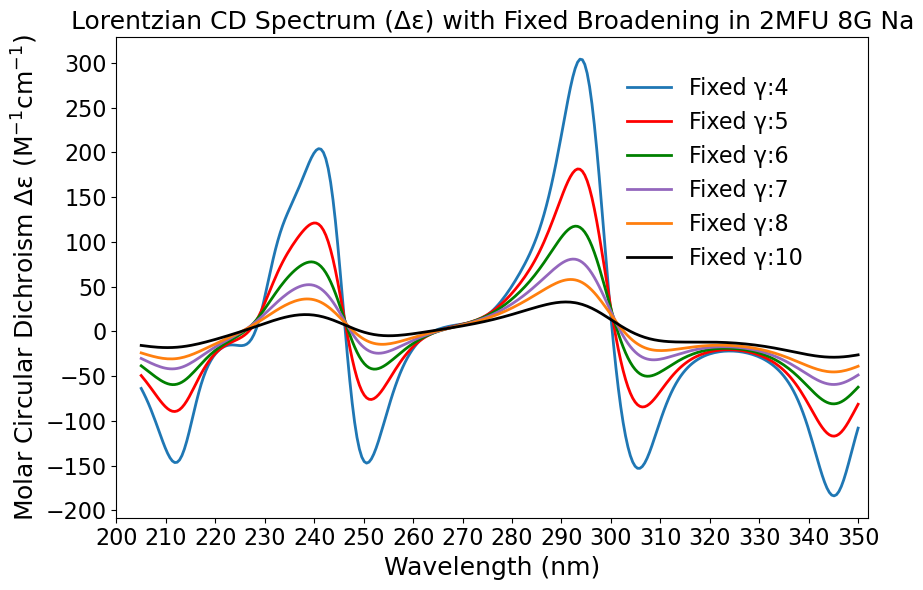

In [37]:
# === Attempt 8: Norman-style CD Spectrum with Lorentzian broadening ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# === Step 0: Prerequisites settings ===
Taskname = "Style2_FixedLorentz_Norman8_2MFU_C2"
globals()[f"filepath_{Taskname}"] = f"../Raw_DFT/20May2025_2MFU-C2_TDDFT-TDA_CD_proj25.csv"
os.makedirs("../Delta_Eps", exist_ok=True)

# === Step 1: Read raw CD data ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region of interest ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 250)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Construct wavelength grid ===
globals()[f"gamma_values_{Taskname}"] = [4, 5, 6, 7, 8, 10]
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)

# === Step 4: Lorentzian broadening (still in R units) ===
for gamma in globals()[f"gamma_values_{Taskname}"]:
    spec = np.zeros_like(globals()[f"x_grid_{Taskname}"])
    for wl_i, R_i in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
        lorentz = R_i * (gamma / np.pi) / ((globals()[f"x_grid_{Taskname}"] - wl_i)**2 + gamma**2)
        spec += lorentz
    globals()[f"spectrum_lorentz_gamma{gamma}_{Taskname}"] = spec

# === Step 5: Redshift → max → 320 nm ===
current_max = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]

# === Step 6: Rescale → min → 202 nm ===
current_min = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]

# === Step 7: Convert R to Δε (Norman-style for Lorentzian, no π compensation needed) ===
for gamma in globals()[f"gamma_values_{Taskname}"]:
    conv_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * gamma) * np.pi
    globals()[f"deltaeps_lorentz_gamma{gamma}_{Taskname}"] = globals()[f"spectrum_lorentz_gamma{gamma}_{Taskname}"] * conv_factor

# === Step 8: Export CSV ===
for gamma in globals()[f"gamma_values_{Taskname}"]:
    export_df = pd.DataFrame({
        "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
        "Delta_epsilon(M^-1 cm^-1)": globals()[f"deltaeps_lorentz_gamma{gamma}_{Taskname}"]
    })
    export_df.to_csv(f"../Delta_Eps/{Taskname}_FixedLorentzian_Gamma{gamma}.csv", index=False)
    print(f"[INFO] Exported Lorentzian Δε for γ={gamma}")

# === Step 9: Plot ===
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,6))
colors = ["#1f77b4", "red", "green", "#9467bd", "#ff7f0e", "black"]
labels = [f"Fixed γ:{gamma}" for gamma in globals()[f"gamma_values_{Taskname}"]]

for gamma, color, label in zip(globals()[f"gamma_values_{Taskname}"], colors, labels):
    ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"deltaeps_lorentz_gamma{gamma}_{Taskname}"], color=color, label=label, linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontsize=18)
ax.set_ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 352, 10), fontsize=16)
plt.yticks(np.linspace(-200, 300, 11), fontsize=16)  # 11 bins
ax.set_xlim(200, 352)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.94, 0.96))
plt.title(f"Lorentzian CD Spectrum (Δε) with Fixed Broadening in 2MFU 8G Na", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Fixed_Lorentzian/{Taskname}-Fixed_Lorentzian_Comparison_Depsilon.png", dpi=300)
plt.show()

[INFO] Exported Voigt Δε for width=4
[INFO] Exported Voigt Δε for width=5
[INFO] Exported Voigt Δε for width=6
[INFO] Exported Voigt Δε for width=7
[INFO] Exported Voigt Δε for width=8
[INFO] Exported Voigt Δε for width=10


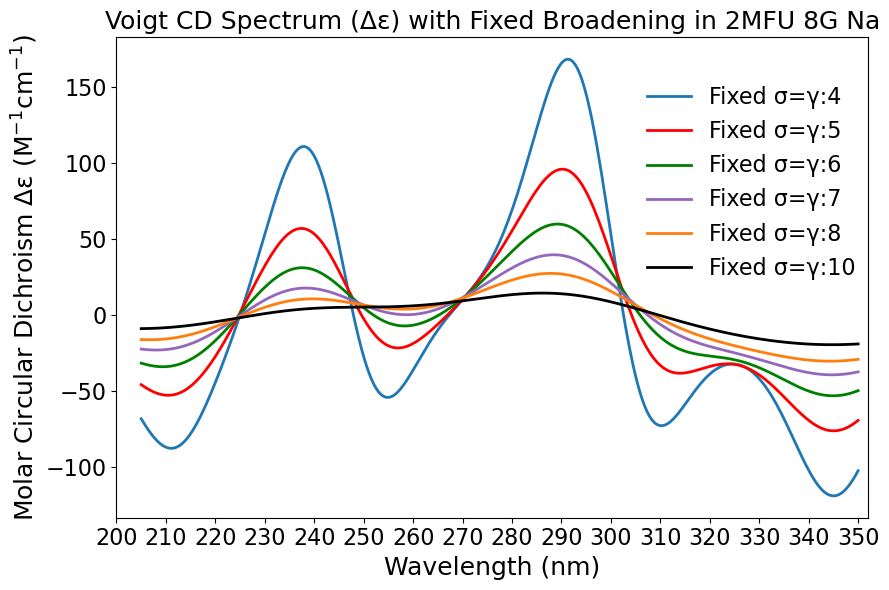

In [40]:
# === Attempt 9: Norman-style CD Spectrum with Voigt broadening (σ=γ) ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.special import wofz  # Voigt profile

# === Step 0: Prerequisites settings ===
Taskname = "Style3_FixedVoigt_Norman9_2MFU_C2"
globals()[f"filepath_{Taskname}"] = f"../Raw_DFT/20May2025_2MFU-C2_TDDFT-TDA_CD_proj25.csv"
os.makedirs("../Delta_Eps", exist_ok=True)

# === Step 1: Read raw CD data ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region of interest ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 250)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Construct wavelength grid ===
globals()[f"voigt_widths_{Taskname}"] = [4, 5, 6, 7, 8, 10]
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)

# === Step 4: Voigt broadening (still in R units) ===
for width in globals()[f"voigt_widths_{Taskname}"]:
    spec = np.zeros_like(globals()[f"x_grid_{Taskname}"])
    sigma = width
    gamma = width
    for wl_i, R_i in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
        z = ((globals()[f"x_grid_{Taskname}"] - wl_i) + 1j * gamma) / (sigma * np.sqrt(2))
        voigt = np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi))  # normalized Voigt
        spec += R_i * voigt
    globals()[f"spectrum_voigt_width{width}_{Taskname}"] = spec

# === Step 5: Redshift → max = 320 nm ===
current_max = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]

# === Step 6: Rescale → min = 202 nm ===
current_min = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]

# === Step 7: Convert R → Δε using Norman-style ===
for width in globals()[f"voigt_widths_{Taskname}"]:
    conv_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * width) * np.pi
    globals()[f"deltaeps_voigt_width{width}_{Taskname}"] = globals()[f"spectrum_voigt_width{width}_{Taskname}"] * conv_factor

# === Step 8: Export CSVs ===
for width in globals()[f"voigt_widths_{Taskname}"]:
    export_df = pd.DataFrame({
        "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
        "Delta_epsilon(M^-1 cm^-1)": globals()[f"deltaeps_voigt_width{width}_{Taskname}"]
    })
    export_df.to_csv(f"../Delta_Eps/{Taskname}_FixedVoigt_Width{width}.csv", index=False)
    print(f"[INFO] Exported Voigt Δε for width={width}")

# === Step 9: Plotting ===
fig, ax = plt.subplots(figsize=(9,6))
colors = ["#1f77b4", "red", "green", "#9467bd", "#ff7f0e", "black"]
labels = [f"Fixed σ=γ:{w}" for w in globals()[f"voigt_widths_{Taskname}"]]

for width, color, label in zip(globals()[f"voigt_widths_{Taskname}"], colors, labels):
    ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"deltaeps_voigt_width{width}_{Taskname}"], color=color, label=label, linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontsize=18)
ax.set_ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 352, 10), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(200, 352)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(1.01, 0.94))
plt.title(f"Voigt CD Spectrum (Δε) with Fixed Broadening in 2MFU 8G Na", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Fixed_Voigt/{Taskname}-Fixed_Voigt_Comparison_Depsilon.png", dpi=300)
plt.show()

### 2.1.3 2MFU-C3 11G K.
#### 300 Excited states. 167.1-249.1 nm in Raw data.

[INFO] Redshifted by: 100.9 nm to align max wavelength to 350 nm.
[INFO] Scaled to minimum 202 nm with scale factor: 1.768
[INFO] Exported final Δε spectrum for σ=4 to CSV.
[INFO] Exported final Δε spectrum for σ=5 to CSV.
[INFO] Exported final Δε spectrum for σ=6 to CSV.
[INFO] Exported final Δε spectrum for σ=7 to CSV.
[INFO] Exported final Δε spectrum for σ=8 to CSV.
[INFO] Exported final Δε spectrum for σ=10 to CSV.


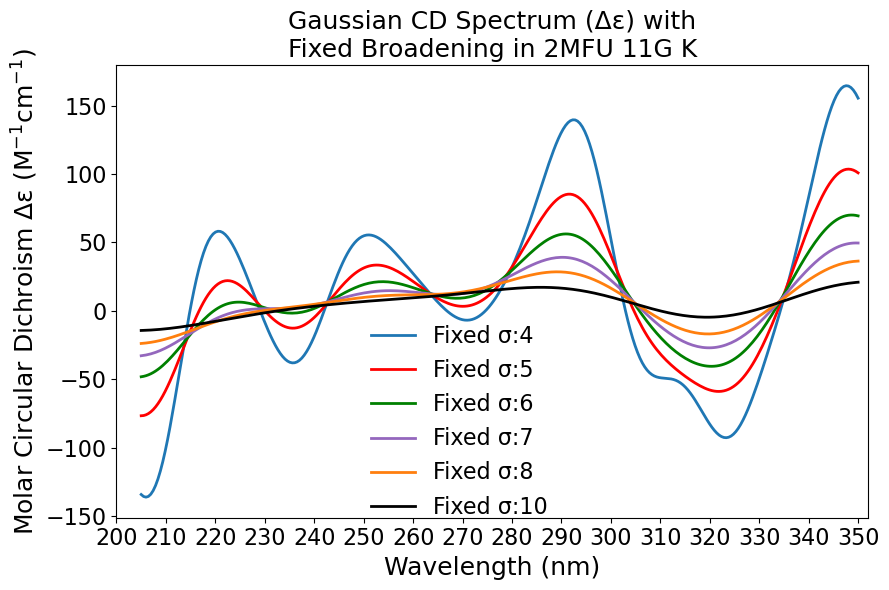

In [171]:
# === Attempt 5 Revised: All Variables as Global ===
# CD Spectrum Construction (Fixed Gaussian Broadening + Norman-style R to DeltaEpsilon Conversion)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
from matplotlib.ticker import MaxNLocator

# === Step 0: Prerequisites settings ===
Taskname = "Style1_FixedGauss_Norman5_2MFU_C3"
globals()[f"filepath_{Taskname}"] = f"../Raw_DFT/20May2025_2MFU-C3_TDDFT-TDA_CD_proj26.csv"
os.makedirs("../Delta_Eps", exist_ok=True)

# === Step 1: Read raw CD data (from TDDFT) ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region of interest (130 to 250 nm) ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 255)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Construct wavelength grid (before redshift/scale) ===
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)

# === Step 4: Gaussian broadening (still in R units) ===
globals()[f"sigmas_{Taskname}"] = [4, 5, 6, 7, 8, 10]
for sigma in globals()[f"sigmas_{Taskname}"]:
    spectrum = np.zeros_like(globals()[f"x_grid_{Taskname}"])
    for wl_i, R_i in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
        gauss = R_i * np.exp(-0.5 * ((globals()[f"x_grid_{Taskname}"] - wl_i) / sigma)**2)
        gauss /= sigma * np.sqrt(2 * np.pi)
        spectrum += gauss
    globals()[f"spectrum_sigma_{sigma}_{Taskname}"] = spectrum

# === Step 5: Redshift the grid to max = 320 nm ===
globals()[f"current_max_{Taskname}"] = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - globals()[f"current_max_{Taskname}"]
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]
print(f"[INFO] Redshifted by: {round(globals()[f'redshift_{Taskname}'], 2)} nm to align max wavelength to 350 nm.")

# === Step 6: Scale to make min = 202 nm ===
globals()[f"current_min_{Taskname}"] = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - globals()[f"current_min_{Taskname}"])
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]
print(f"[INFO] Scaled to minimum 202 nm with scale factor: {round(globals()[f'scale_factor_{Taskname}'], 3)}")

# === Step 7: Convert R to Δε (Delta epsilon) ===
for sigma in globals()[f"sigmas_{Taskname}"]:
    conversion_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * sigma) * np.pi
    globals()[f"spectrum_converted_sigma_{sigma}_{Taskname}"] = globals()[f"spectrum_sigma_{sigma}_{Taskname}"] * conversion_factor

# === Step 8: Export each spectrum to CSV ===
for sigma in globals()[f"sigmas_{Taskname}"]:
    export_df = pd.DataFrame({
        "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
        "Delta_epsilon(M^-1 cm^-1)": globals()[f"spectrum_converted_sigma_{sigma}_{Taskname}"]
    })
    export_df.to_csv(f"../Delta_Eps/{Taskname}_FixedGaussian_Sigma{sigma}.csv", index=False)
    print(f"[INFO] Exported final Δε spectrum for σ={sigma} to CSV.")

# === Step 9: Plotting ===
fig, ax = plt.subplots(figsize=(9,6))
colors = ["#1f77b4", "red", "green", "#9467bd", "#ff7f0e", "black"]
labels = [f"Fixed σ:{sigma}" for sigma in globals()[f"sigmas_{Taskname}"]]

for sigma, color, label in zip(globals()[f"sigmas_{Taskname}"], colors, labels):
    ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"spectrum_converted_sigma_{sigma}_{Taskname}"], color=color, label=label, linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontsize=18)
ax.set_ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 352, 10), fontsize=16)
plt.yticks(fontsize=16) 
ax.set_xlim(200, 352)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.60, 0.47))
plt.title(f"Gaussian CD Spectrum (Δε) with\nFixed Broadening in 2MFU 11G K", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Fixed_Gaussian/{Taskname}-Fixed_Gaussian_Comparison_Depsilon.png", dpi=300)
plt.show()

[INFO] Exported Lorentzian Δε for γ=4
[INFO] Exported Lorentzian Δε for γ=5
[INFO] Exported Lorentzian Δε for γ=6
[INFO] Exported Lorentzian Δε for γ=7
[INFO] Exported Lorentzian Δε for γ=8
[INFO] Exported Lorentzian Δε for γ=10


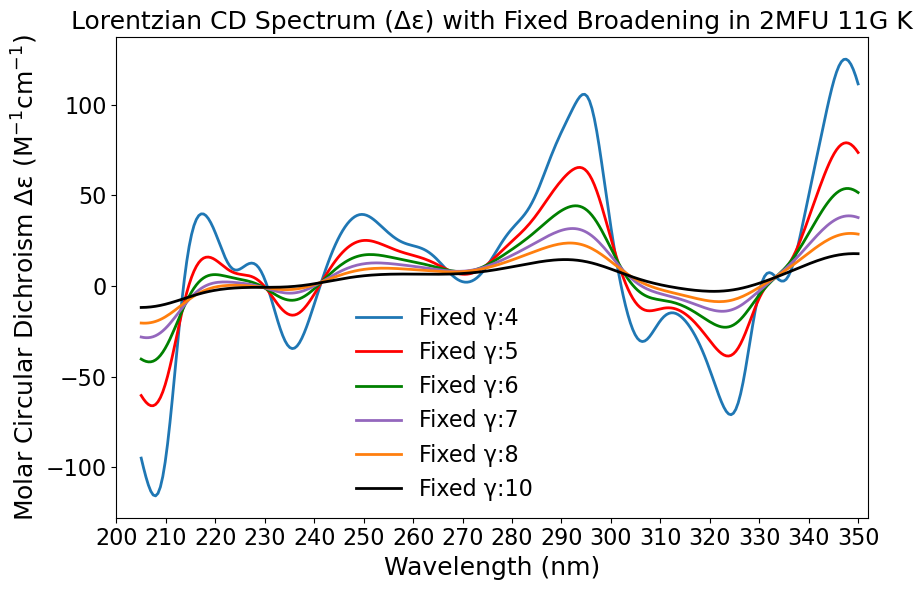

In [89]:
# === Attempt 8: Norman-style CD Spectrum with Lorentzian broadening ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# === Step 0: Prerequisites settings ===
Taskname = "Style2_FixedLorentz_Norman8_2MFU_C3"
globals()[f"filepath_{Taskname}"] = f"../Raw_DFT/20May2025_2MFU-C3_TDDFT-TDA_CD_proj26.csv"
os.makedirs("../Delta_Eps", exist_ok=True)

# === Step 1: Read raw CD data ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region of interest ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 250)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Construct wavelength grid ===
globals()[f"gamma_values_{Taskname}"] = [4, 5, 6, 7, 8, 10]
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)

# === Step 4: Lorentzian broadening (still in R units) ===
for gamma in globals()[f"gamma_values_{Taskname}"]:
    spec = np.zeros_like(globals()[f"x_grid_{Taskname}"])
    for wl_i, R_i in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
        lorentz = R_i * (gamma / np.pi) / ((globals()[f"x_grid_{Taskname}"] - wl_i)**2 + gamma**2)
        spec += lorentz
    globals()[f"spectrum_lorentz_gamma{gamma}_{Taskname}"] = spec

# === Step 5: Redshift → max → 320 nm ===
current_max = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]

# === Step 6: Rescale → min → 202 nm ===
current_min = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]

# === Step 7: Convert R to Δε (Norman-style for Lorentzian, no π compensation needed) ===
for gamma in globals()[f"gamma_values_{Taskname}"]:
    conv_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * gamma) * np.pi
    globals()[f"deltaeps_lorentz_gamma{gamma}_{Taskname}"] = globals()[f"spectrum_lorentz_gamma{gamma}_{Taskname}"] * conv_factor

# === Step 8: Export CSV ===
for gamma in globals()[f"gamma_values_{Taskname}"]:
    export_df = pd.DataFrame({
        "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
        "Delta_epsilon(M^-1 cm^-1)": globals()[f"deltaeps_lorentz_gamma{gamma}_{Taskname}"]
    })
    export_df.to_csv(f"../Delta_Eps/{Taskname}_FixedLorentzian_Gamma{gamma}.csv", index=False)
    print(f"[INFO] Exported Lorentzian Δε for γ={gamma}")

# === Step 9: Plot ===
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,6))
colors = ["#1f77b4", "red", "green", "#9467bd", "#ff7f0e", "black"]
labels = [f"Fixed γ:{gamma}" for gamma in globals()[f"gamma_values_{Taskname}"]]

for gamma, color, label in zip(globals()[f"gamma_values_{Taskname}"], colors, labels):
    ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"deltaeps_lorentz_gamma{gamma}_{Taskname}"], color=color, label=label, linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontsize=18)
ax.set_ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 352, 10), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(200, 352)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.58, 0.48))
plt.title(f"Lorentzian CD Spectrum (Δε) with Fixed Broadening in 2MFU 11G K", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Fixed_Lorentzian/{Taskname}-Fixed_Lorentzian_Comparison_Depsilon.png", dpi=300)
plt.show()

[INFO] Exported Voigt Δε for width=4
[INFO] Exported Voigt Δε for width=5
[INFO] Exported Voigt Δε for width=6
[INFO] Exported Voigt Δε for width=7
[INFO] Exported Voigt Δε for width=8
[INFO] Exported Voigt Δε for width=10


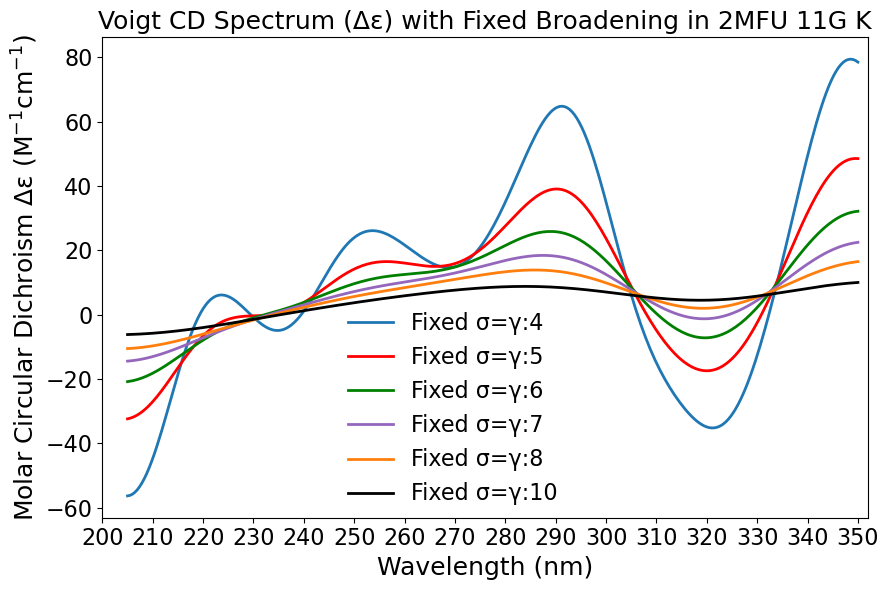

In [90]:
# === Attempt 9: Norman-style CD Spectrum with Voigt broadening (σ=γ) ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.special import wofz  # Voigt profile

# === Step 0: Prerequisites settings ===
Taskname = "Style3_FixedVoigt_Norman9_2MFU_C3"
globals()[f"filepath_{Taskname}"] = f"../Raw_DFT/20May2025_2MFU-C3_TDDFT-TDA_CD_proj26.csv"
os.makedirs("../Delta_Eps", exist_ok=True)

# === Step 1: Read raw CD data ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region of interest ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 255)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Construct wavelength grid ===
globals()[f"voigt_widths_{Taskname}"] = [4, 5, 6, 7, 8, 10]
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)

# === Step 4: Voigt broadening (still in R units) ===
for width in globals()[f"voigt_widths_{Taskname}"]:
    spec = np.zeros_like(globals()[f"x_grid_{Taskname}"])
    sigma = width
    gamma = width
    for wl_i, R_i in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
        z = ((globals()[f"x_grid_{Taskname}"] - wl_i) + 1j * gamma) / (sigma * np.sqrt(2))
        voigt = np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi))  # normalized Voigt
        spec += R_i * voigt
    globals()[f"spectrum_voigt_width{width}_{Taskname}"] = spec

# === Step 5: Redshift → max = 320 nm ===
current_max = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]

# === Step 6: Rescale → min = 202 nm ===
current_min = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]

# === Step 7: Convert R → Δε using Norman-style ===
for width in globals()[f"voigt_widths_{Taskname}"]:
    conv_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * width) * np.pi
    globals()[f"deltaeps_voigt_width{width}_{Taskname}"] = globals()[f"spectrum_voigt_width{width}_{Taskname}"] * conv_factor

# === Step 8: Export CSVs ===
for width in globals()[f"voigt_widths_{Taskname}"]:
    export_df = pd.DataFrame({
        "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
        "Delta_epsilon(M^-1 cm^-1)": globals()[f"deltaeps_voigt_width{width}_{Taskname}"]
    })
    export_df.to_csv(f"../Delta_Eps/{Taskname}_FixedVoigt_Width{width}.csv", index=False)
    print(f"[INFO] Exported Voigt Δε for width={width}")

# === Step 9: Plotting ===
fig, ax = plt.subplots(figsize=(9,6))
colors = ["#1f77b4", "red", "green", "#9467bd", "#ff7f0e", "black"]
labels = [f"Fixed σ=γ:{w}" for w in globals()[f"voigt_widths_{Taskname}"]]

for width, color, label in zip(globals()[f"voigt_widths_{Taskname}"], colors, labels):
    ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"deltaeps_voigt_width{width}_{Taskname}"], color=color, label=label, linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontsize=18)
ax.set_ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 352, 10), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(200, 352)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.62, 0.47))
plt.title(f"Voigt CD Spectrum (Δε) with Fixed Broadening in 2MFU 11G K", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Fixed_Voigt/{Taskname}-Fixed_Voigt_Comparison_Depsilon.png", dpi=300)
plt.show()

### 2.1.4 2MFU-C4 8G K.
#### 300 Excited states. 155.8-249.7 nm in Raw data.

[INFO] Redshifted by: 100.3 nm to align max wavelength to 320 nm.
[INFO] Scaled to minimum 202 nm with scale factor: 1.544
[INFO] Exported final Δε spectrum for σ=4 to CSV.
[INFO] Exported final Δε spectrum for σ=5 to CSV.
[INFO] Exported final Δε spectrum for σ=6 to CSV.
[INFO] Exported final Δε spectrum for σ=7 to CSV.
[INFO] Exported final Δε spectrum for σ=8 to CSV.
[INFO] Exported final Δε spectrum for σ=10 to CSV.


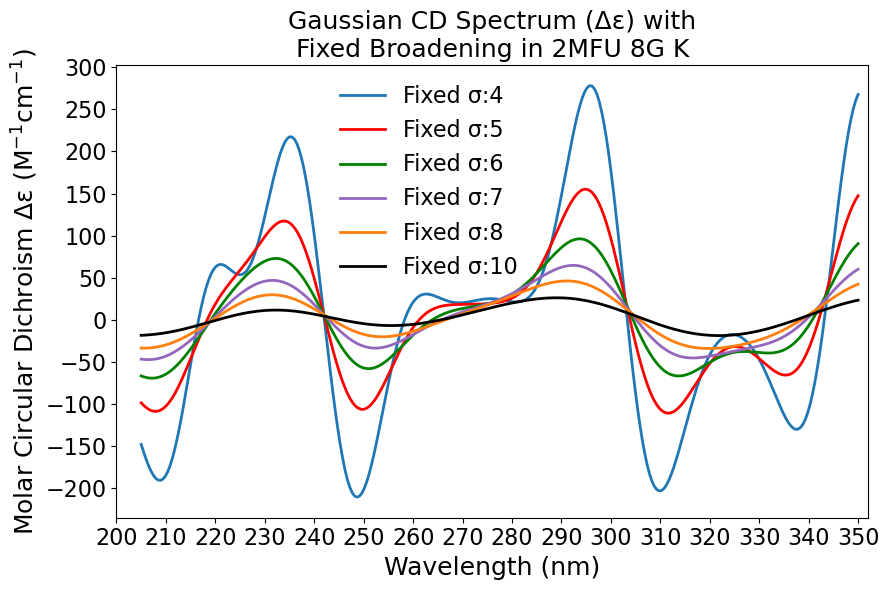

In [174]:
# === Attempt 5 Revised: All Variables as Global ===
# CD Spectrum Construction (Fixed Gaussian Broadening + Norman-style R to DeltaEpsilon Conversion)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
from matplotlib.ticker import MaxNLocator

# === Step 0: Prerequisites settings ===
Taskname = "Style1_FixedGauss_Norman5_2MFU_C4"
globals()[f"filepath_{Taskname}"] = f"../Raw_DFT/20May2025_2MFU-C4_TDDFT-TDA_CD_proj27.csv"
os.makedirs("../Delta_Eps", exist_ok=True)

# === Step 1: Read raw CD data (from TDDFT) ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region of interest (130 to 250 nm) ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 255)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Construct wavelength grid (before redshift/scale) ===
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)

# === Step 4: Gaussian broadening (still in R units) ===
globals()[f"sigmas_{Taskname}"] = [4, 5, 6, 7, 8, 10]
for sigma in globals()[f"sigmas_{Taskname}"]:
    spectrum = np.zeros_like(globals()[f"x_grid_{Taskname}"])
    for wl_i, R_i in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
        gauss = R_i * np.exp(-0.5 * ((globals()[f"x_grid_{Taskname}"] - wl_i) / sigma)**2)
        gauss /= sigma * np.sqrt(2 * np.pi)
        spectrum += gauss
    globals()[f"spectrum_sigma_{sigma}_{Taskname}"] = spectrum

# === Step 5: Redshift the grid to max = 320 nm ===
globals()[f"current_max_{Taskname}"] = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - globals()[f"current_max_{Taskname}"]
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]
print(f"[INFO] Redshifted by: {round(globals()[f'redshift_{Taskname}'], 2)} nm to align max wavelength to 320 nm.")

# === Step 6: Scale to make min = 202 nm ===
globals()[f"current_min_{Taskname}"] = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - globals()[f"current_min_{Taskname}"])
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]
print(f"[INFO] Scaled to minimum 202 nm with scale factor: {round(globals()[f'scale_factor_{Taskname}'], 3)}")

# === Step 7: Convert R to Δε (Delta epsilon) ===
for sigma in globals()[f"sigmas_{Taskname}"]:
    conversion_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * sigma) * np.pi
    globals()[f"spectrum_converted_sigma_{sigma}_{Taskname}"] = globals()[f"spectrum_sigma_{sigma}_{Taskname}"] * conversion_factor

# === Step 8: Export each spectrum to CSV ===
for sigma in globals()[f"sigmas_{Taskname}"]:
    export_df = pd.DataFrame({
        "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
        "Delta_epsilon(M^-1 cm^-1)": globals()[f"spectrum_converted_sigma_{sigma}_{Taskname}"]
    })
    export_df.to_csv(f"../Delta_Eps/{Taskname}_FixedGaussian_Sigma{sigma}.csv", index=False)
    print(f"[INFO] Exported final Δε spectrum for σ={sigma} to CSV.")

# === Step 9: Plotting ===
fig, ax = plt.subplots(figsize=(9,6))
colors = ["#1f77b4", "red", "green", "#9467bd", "#ff7f0e", "black"]
labels = [f"Fixed σ:{sigma}" for sigma in globals()[f"sigmas_{Taskname}"]]

for sigma, color, label in zip(globals()[f"sigmas_{Taskname}"], colors, labels):
    ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"spectrum_converted_sigma_{sigma}_{Taskname}"], color=color, label=label, linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontsize=18)
ax.set_ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 352, 10), fontsize=16)
plt.yticks(np.arange(-200, 302, 50), fontsize=16) 
ax.set_xlim(200, 352)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.56, 1.00))
plt.title(f"Gaussian CD Spectrum (Δε) with\nFixed Broadening in 2MFU 8G K", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Fixed_Gaussian/{Taskname}-Fixed_Gaussian_Comparison_Depsilon.png", dpi=300)
plt.show()

[INFO] Exported Lorentzian Δε for γ=4
[INFO] Exported Lorentzian Δε for γ=5
[INFO] Exported Lorentzian Δε for γ=6
[INFO] Exported Lorentzian Δε for γ=7
[INFO] Exported Lorentzian Δε for γ=8
[INFO] Exported Lorentzian Δε for γ=10


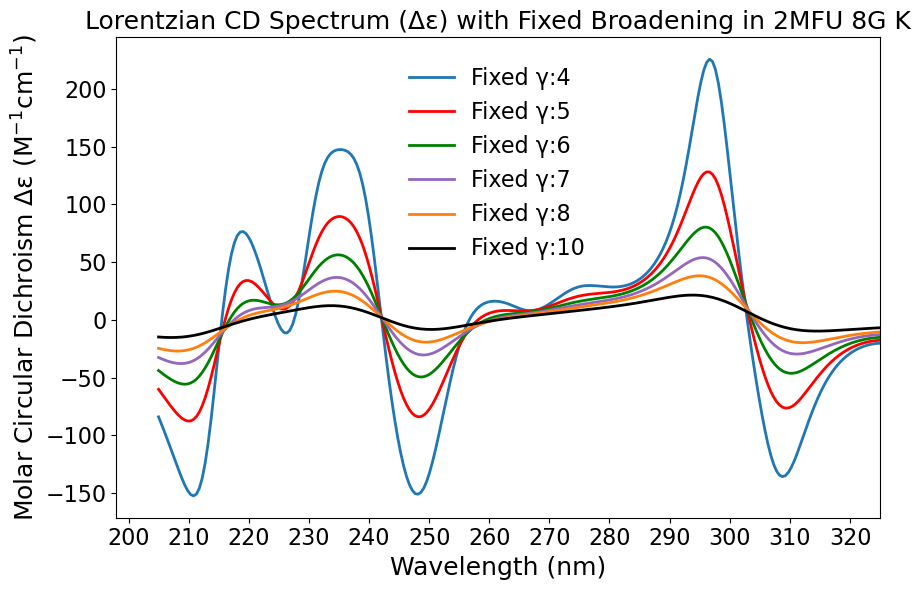

In [68]:
# === Attempt 8: Norman-style CD Spectrum with Lorentzian broadening ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# === Step 0: Prerequisites settings ===
Taskname = "Style2_FixedLorentz_Norman8_2MFU_C4"
globals()[f"filepath_{Taskname}"] = f"../Raw_DFT/20May2025_2MFU-C4_TDDFT-TDA_CD_proj27.csv"
os.makedirs("../Delta_Eps", exist_ok=True)

# === Step 1: Read raw CD data ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region of interest ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 250)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Construct wavelength grid ===
globals()[f"gamma_values_{Taskname}"] = [4, 5, 6, 7, 8, 10]
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)

# === Step 4: Lorentzian broadening (still in R units) ===
for gamma in globals()[f"gamma_values_{Taskname}"]:
    spec = np.zeros_like(globals()[f"x_grid_{Taskname}"])
    for wl_i, R_i in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
        lorentz = R_i * (gamma / np.pi) / ((globals()[f"x_grid_{Taskname}"] - wl_i)**2 + gamma**2)
        spec += lorentz
    globals()[f"spectrum_lorentz_gamma{gamma}_{Taskname}"] = spec

# === Step 5: Redshift → max → 320 nm ===
current_max = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]

# === Step 6: Rescale → min → 202 nm ===
current_min = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]

# === Step 7: Convert R to Δε (Norman-style for Lorentzian, no π compensation needed) ===
for gamma in globals()[f"gamma_values_{Taskname}"]:
    conv_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * gamma) * np.pi
    globals()[f"deltaeps_lorentz_gamma{gamma}_{Taskname}"] = globals()[f"spectrum_lorentz_gamma{gamma}_{Taskname}"] * conv_factor

# === Step 8: Export CSV ===
for gamma in globals()[f"gamma_values_{Taskname}"]:
    export_df = pd.DataFrame({
        "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
        "Delta_epsilon(M^-1 cm^-1)": globals()[f"deltaeps_lorentz_gamma{gamma}_{Taskname}"]
    })
    export_df.to_csv(f"../Delta_Eps/{Taskname}_FixedLorentzian_Gamma{gamma}.csv", index=False)
    print(f"[INFO] Exported Lorentzian Δε for γ={gamma}")

# === Step 9: Plot ===
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,6))
colors = ["#1f77b4", "red", "green", "#9467bd", "#ff7f0e", "black"]
labels = [f"Fixed γ:{gamma}" for gamma in globals()[f"gamma_values_{Taskname}"]]

for gamma, color, label in zip(globals()[f"gamma_values_{Taskname}"], colors, labels):
    ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"deltaeps_lorentz_gamma{gamma}_{Taskname}"], color=color, label=label, linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontsize=18)
ax.set_ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 341, 10), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(198, 325)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.64, 0.98))
plt.title(f"Lorentzian CD Spectrum (Δε) with Fixed Broadening in 2MFU 8G K", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Fixed_Lorentzian/{Taskname}-Fixed_Lorentzian_Comparison_Depsilon.png", dpi=300)
plt.show()

[INFO] Exported Voigt Δε for width=4
[INFO] Exported Voigt Δε for width=5
[INFO] Exported Voigt Δε for width=6
[INFO] Exported Voigt Δε for width=7
[INFO] Exported Voigt Δε for width=8
[INFO] Exported Voigt Δε for width=10


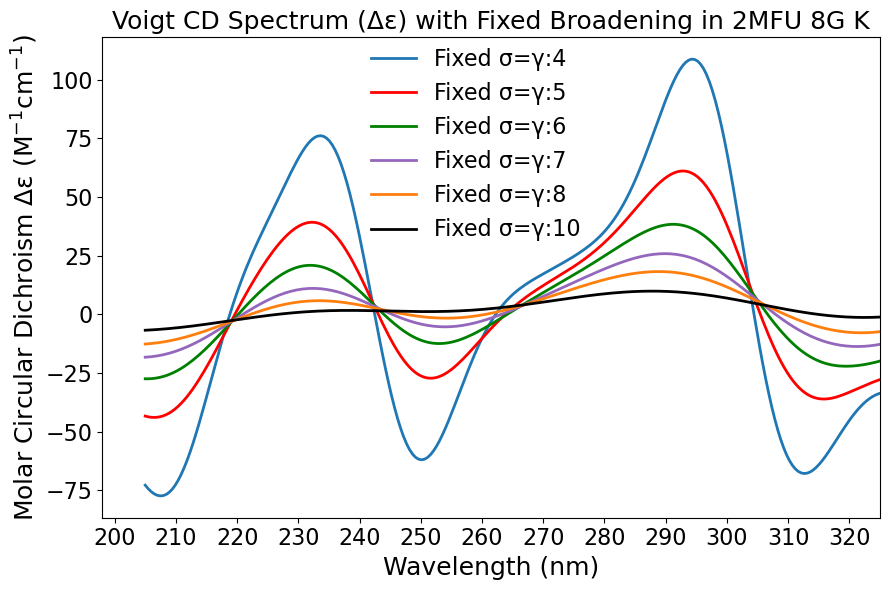

In [71]:
# === Attempt 9: Norman-style CD Spectrum with Voigt broadening (σ=γ) ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.special import wofz  # Voigt profile

# === Step 0: Prerequisites settings ===
Taskname = "Style3_FixedVoigt_Norman9_2MFU_C4"
globals()[f"filepath_{Taskname}"] = f"../Raw_DFT/20May2025_2MFU-C4_TDDFT-TDA_CD_proj27.csv"
os.makedirs("../Delta_Eps", exist_ok=True)

# === Step 1: Read raw CD data ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region of interest ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 250)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Construct wavelength grid ===
globals()[f"voigt_widths_{Taskname}"] = [4, 5, 6, 7, 8, 10]
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)

# === Step 4: Voigt broadening (still in R units) ===
for width in globals()[f"voigt_widths_{Taskname}"]:
    spec = np.zeros_like(globals()[f"x_grid_{Taskname}"])
    sigma = width
    gamma = width
    for wl_i, R_i in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
        z = ((globals()[f"x_grid_{Taskname}"] - wl_i) + 1j * gamma) / (sigma * np.sqrt(2))
        voigt = np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi))  # normalized Voigt
        spec += R_i * voigt
    globals()[f"spectrum_voigt_width{width}_{Taskname}"] = spec

# === Step 5: Redshift → max = 320 nm ===
current_max = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]

# === Step 6: Rescale → min = 202 nm ===
current_min = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]

# === Step 7: Convert R → Δε using Norman-style ===
for width in globals()[f"voigt_widths_{Taskname}"]:
    conv_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * width) * np.pi
    globals()[f"deltaeps_voigt_width{width}_{Taskname}"] = globals()[f"spectrum_voigt_width{width}_{Taskname}"] * conv_factor

# === Step 8: Export CSVs ===
for width in globals()[f"voigt_widths_{Taskname}"]:
    export_df = pd.DataFrame({
        "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
        "Delta_epsilon(M^-1 cm^-1)": globals()[f"deltaeps_voigt_width{width}_{Taskname}"]
    })
    export_df.to_csv(f"../Delta_Eps/{Taskname}_FixedVoigt_Width{width}.csv", index=False)
    print(f"[INFO] Exported Voigt Δε for width={width}")

# === Step 9: Plotting ===
fig, ax = plt.subplots(figsize=(9,6))
colors = ["#1f77b4", "red", "green", "#9467bd", "#ff7f0e", "black"]
labels = [f"Fixed σ=γ:{w}" for w in globals()[f"voigt_widths_{Taskname}"]]

for width, color, label in zip(globals()[f"voigt_widths_{Taskname}"], colors, labels):
    ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"deltaeps_voigt_width{width}_{Taskname}"], color=color, label=label, linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontsize=18)
ax.set_ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 341, 10), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(198, 325)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.64, 1.02))
plt.title(f"Voigt CD Spectrum (Δε) with Fixed Broadening in 2MFU 8G K", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Fixed_Voigt/{Taskname}-Fixed_Voigt_Comparison_Depsilon.png", dpi=300)
plt.show()

### 2.2 Global Gaussian filter at width 10. Redshifted to 325 nm (Style2)
#### ## Not a valid attempt. Violates the principle of independent contributions of each excited state in spectroscopy.

### 2.2.1 2MFU 11G-3K.
### 300 Excited states. 155.3-252.0 nm in Raw data.

[INFO] Redshifted by: 84.1 nm to align max wavelength to 325 nm.


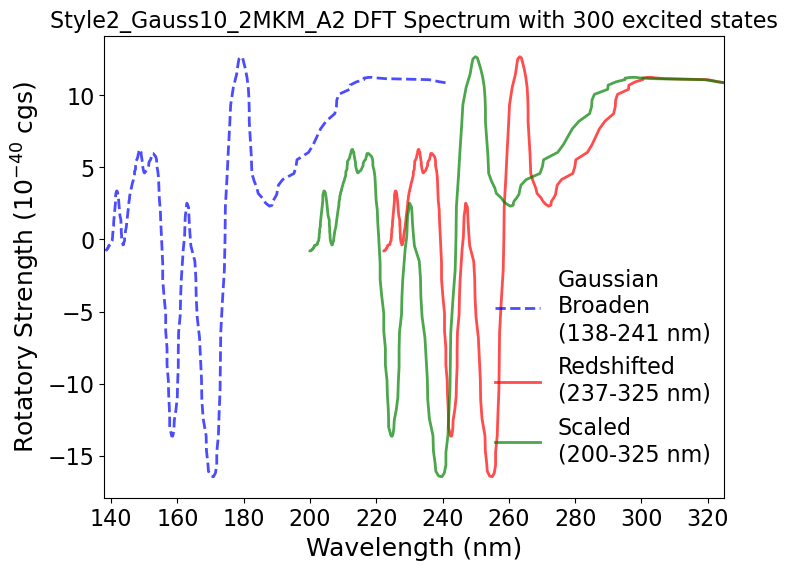


Dominant DFT Symbols by Interval:
Wavelength Range Primary State Secondary State  Mean  Std Dev
            <205             0               -  1.00     1.51
         205-215             0               +  3.21     2.17
         215-225             +              -- -0.18     7.00
         225-235            --               0 -3.61     5.18
         240-255             +              ++  2.98     9.32
         255-265             0             N/A  2.83     0.47
         265-275             +               0  5.06     0.67
         275-285             +             N/A  7.90     0.90
         285-300            ++               + 10.76     0.53
            >320            ++             N/A 10.91     0.05


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from collections import Counter

# Step 0: Prerequisites settings
# Taskname and Input .csv data file.
# Change everytime!
Taskname = "Style2_Gauss10_2MFU_C3" 
Data_pathway = "../Raw_DFT/20May2025_2MFU-C3_TDDFT-TDA_CD_proj26.csv"

# Step 1: Read raw data
globals()[f"filepath_{Taskname}"] = f"{Data_pathway}"
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])

# Step 2: Extract wavelength and CD rotatory strength (electric dipole)
globals()[f"wavelength_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"cd_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# Step 3: Apply Gaussian Filter
globals()[f"sigma_{Taskname}"] = 10
globals()[f"cd_gauss_{Taskname}"] = gaussian_filter1d(globals()[f"cd_raw_{Taskname}"], globals()[f"sigma_{Taskname}"])

# Step 4: Select region.
# Using wider range, 130 - 250 nm to cover full range.
# May change in future
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_{Taskname}"] >= 130) & (globals()[f"wavelength_{Taskname}"] <= 250)
globals()[f"wavelength_selected_{Taskname}"] = globals()[f"wavelength_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"cd_selected_{Taskname}"] = globals()[f"cd_gauss_{Taskname}"][globals()[f"mask_{Taskname}"]]

# Step 5: Redshift to align max wavelength to 325 nm
globals()[f"max_wl_{Taskname}"] = globals()[f"wavelength_selected_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - globals()[f"max_wl_{Taskname}"]
globals()[f"wavelength_redshifted_{Taskname}"] = globals()[f"wavelength_selected_{Taskname}"] + globals()[f"redshift_{Taskname}"]
print(f"[INFO] Redshifted by: {round(globals()[f'redshift_{Taskname}'], 2)} nm to align max wavelength to 325 nm.")

# Step 6: Scale so that min wavelength becomes 200 nm
globals()[f"min_wl_{Taskname}"] = globals()[f"wavelength_redshifted_{Taskname}"].min()
globals()[f"scalefactor_{Taskname}"] = (350 - 205) / (350 - globals()[f"min_wl_{Taskname}"])
globals()[f"wavelength_scaled_{Taskname}"] = 350 - (350 - globals()[f"wavelength_redshifted_{Taskname}"]) * globals()[f"scalefactor_{Taskname}"]

# Step 7: Plotting
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(globals()[f"wavelength_selected_{Taskname}"], globals()[f"cd_selected_{Taskname}"], color="blue", linestyle="dashed", label="Gaussian\nBroaden\n(155.3-252.0 nm)", linewidth=2, alpha=0.7)
ax.plot(globals()[f"wavelength_redshifted_{Taskname}"], globals()[f"cd_selected_{Taskname}"], color="red", label="Redshifted\n(237-325 nm)", linewidth=2, alpha=0.7)
ax.plot(globals()[f"wavelength_scaled_{Taskname}"], globals()[f"cd_selected_{Taskname}"], color="green", label="Scaled\n(200-325 nm)", linewidth=2, alpha=0.7)
ax.set_xlabel("Wavelength (nm)", size=18)
ax.set_ylabel("Rotatory Strength (10$^{\\mathrm{-40}}$ cgs)", color="black", size=18)
ax.tick_params(axis='y', labelcolor="black")
plt.xticks(np.arange(150, 356, 20), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(150, 356)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(1.01, 0.54))
plt.title(f"{Taskname} DFT Spectrum with 300 excited states", size=16)
plt.tight_layout
plt.savefig(f"../Figures/{Taskname}-DFT_Spectrum.png", dpi=600)
plt.show()

# Step 8: Symbolic classification
intervals = {
    "<205": lambda x: x < 205,
    "205-215": lambda x: (x >= 205) & (x < 215),
    "215-225": lambda x: (x >= 215) & (x < 225),
    "225-235": lambda x: (x >= 225) & (x < 235),
    "240-255": lambda x: (x >= 240) & (x < 255),
    "255-265": lambda x: (x >= 255) & (x < 265),
    "265-275": lambda x: (x >= 265) & (x < 275),
    "275-285": lambda x: (x >= 275) & (x < 285),
    "285-300": lambda x: (x >= 285) & (x < 300),
    ">320": lambda x: x > 320
}

def classify_symbol(y):
    if y >= 10:
        return "++"
    elif y <= -5:
        return "--"
    elif 5 < y < 10:
        return "+"
    elif -5 < y <= 0:
        return "-"
    elif 0 < y < 5:
        return "0"
    else:
        return "0"

summary_stats = []
for label, condition in intervals.items():
    mask_interval = condition(globals()[f"wavelength_scaled_{Taskname}"])
    y_vals = globals()[f"cd_selected_{Taskname}"][mask_interval] if np.sum(mask_interval) > 0 else []
    if len(y_vals) == 0:
        summary_stats.append([label, "N/A", "N/A", "N/A", "N/A"])
    else:
        symbols = [classify_symbol(y) for y in y_vals]
        counts = Counter(symbols).most_common(2)
        primary = counts[0][0] if len(counts) > 0 else "N/A"
        secondary = counts[1][0] if len(counts) > 1 else "N/A"
        mean_val = np.mean(y_vals)
        std_val = np.std(y_vals)
        summary_stats.append([label, primary, secondary, round(mean_val, 2), round(std_val, 2)])

globals()[f"df_summary_{Taskname}"] = pd.DataFrame(summary_stats, columns=["Wavelength Range", "Primary State", "Secondary State", "Mean", "Std Dev"])
print("\nDominant DFT Symbols by Interval:")
print(globals()[f"df_summary_{Taskname}"].to_string(index=False))

### 2.2.2 2MKM-A1 Triplex 6G. (Including G10)

[INFO] Redshifted by: 83.1 nm to align max wavelength to 325 nm.


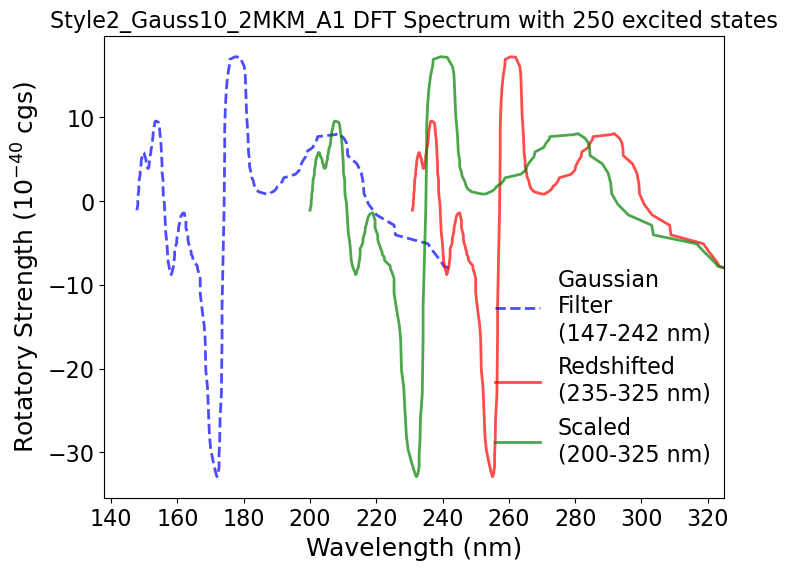


Dominant DFT Symbols by Interval:
Wavelength Range Primary State Secondary State   Mean  Std Dev
            <205             +               0   4.78     2.81
         205-215             +              --   1.40     6.84
         215-225             -              --  -4.50     2.20
         225-235            --               - -20.65     9.22
         240-255             0              ++   4.95     5.38
         255-265             0             N/A   2.13     0.64
         265-275             +               0   5.78     1.33
         275-285             +             N/A   7.24     0.90
         285-300             0               -   1.46     2.09
            >320            --             N/A  -7.48     0.46


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from collections import Counter

# Step 0: Prerequisites settings
# Taskname and Input .csv data file.
# Change everytime!
Taskname = "Style2_Gauss10_2MKM_A1" 
Data_pathway = "../Raw_DFT/28Mar2025_2MKM-A1_TDDFT-TDA_CD_proj1.csv"

# Step 1: Read raw data
globals()[f"filepath_{Taskname}"] = f"{Data_pathway}"
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])

# Step 2: Extract wavelength and CD rotatory strength (electric dipole)
globals()[f"wavelength_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"cd_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# Step 3: Apply Gaussian Filter
globals()[f"sigma_{Taskname}"] = 10
globals()[f"cd_gauss_{Taskname}"] = gaussian_filter1d(globals()[f"cd_raw_{Taskname}"], globals()[f"sigma_{Taskname}"])

# Step 4: Select region.
# Using wider range, 130 - 250 nm to cover full range.
# May change in future
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_{Taskname}"] >= 130) & (globals()[f"wavelength_{Taskname}"] <= 250)
globals()[f"wavelength_selected_{Taskname}"] = globals()[f"wavelength_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"cd_selected_{Taskname}"] = globals()[f"cd_gauss_{Taskname}"][globals()[f"mask_{Taskname}"]]

# Step 5: Redshift to align max wavelength to 325 nm
globals()[f"max_wl_{Taskname}"] = globals()[f"wavelength_selected_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 325 - globals()[f"max_wl_{Taskname}"]
globals()[f"wavelength_redshifted_{Taskname}"] = globals()[f"wavelength_selected_{Taskname}"] + globals()[f"redshift_{Taskname}"]
print(f"[INFO] Redshifted by: {round(globals()[f'redshift_{Taskname}'], 2)} nm to align max wavelength to 325 nm.")

# Step 6: Scale so that min wavelength becomes 200 nm
globals()[f"min_wl_{Taskname}"] = globals()[f"wavelength_redshifted_{Taskname}"].min()
globals()[f"scalefactor_{Taskname}"] = (325 - 205) / (325 - globals()[f"min_wl_{Taskname}"])
globals()[f"wavelength_scaled_{Taskname}"] = 325 - (325 - globals()[f"wavelength_redshifted_{Taskname}"]) * globals()[f"scalefactor_{Taskname}"]

# Step 7: Plotting
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(globals()[f"wavelength_selected_{Taskname}"], globals()[f"cd_selected_{Taskname}"], color="blue", linestyle="dashed", label="Gaussian\nFilter\n(147-242 nm)", linewidth=2, alpha=0.7)
ax.plot(globals()[f"wavelength_redshifted_{Taskname}"], globals()[f"cd_selected_{Taskname}"], color="red", label="Redshifted\n(235-325 nm)", linewidth=2, alpha=0.7)
ax.plot(globals()[f"wavelength_scaled_{Taskname}"], globals()[f"cd_selected_{Taskname}"], color="green", label="Scaled\n(200-325 nm)", linewidth=2, alpha=0.7)
ax.set_xlabel("Wavelength (nm)", size=18)
ax.set_ylabel("Rotatory Strength (10$^{\\mathrm{-40}}$ cgs)", color="black", size=18)
ax.tick_params(axis='y', labelcolor="black")
plt.xticks(np.arange(140, 341, 20), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(138, 325)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(1.01, 0.54))
plt.title(f"{Taskname} DFT Spectrum with 250 excited states", size=16)
plt.tight_layout
plt.savefig(f"../Figures/{Taskname}-DFT_Spectrum.png", dpi=600)
plt.show()

# Step 8: Symbolic classification
intervals = {
    "<205": lambda x: x < 205,
    "205-215": lambda x: (x >= 205) & (x < 215),
    "215-225": lambda x: (x >= 215) & (x < 225),
    "225-235": lambda x: (x >= 225) & (x < 235),
    "240-255": lambda x: (x >= 240) & (x < 255),
    "255-265": lambda x: (x >= 255) & (x < 265),
    "265-275": lambda x: (x >= 265) & (x < 275),
    "275-285": lambda x: (x >= 275) & (x < 285),
    "285-300": lambda x: (x >= 285) & (x < 300),
    ">320": lambda x: x > 320
}

def classify_symbol(y):
    if y >= 10:
        return "++"
    elif y <= -5:
        return "--"
    elif 5 < y < 10:
        return "+"
    elif -5 < y <= 0:
        return "-"
    elif 0 < y < 5:
        return "0"
    else:
        return "0"

summary_stats = []
for label, condition in intervals.items():
    mask_interval = condition(globals()[f"wavelength_scaled_{Taskname}"])
    y_vals = globals()[f"cd_selected_{Taskname}"][mask_interval] if np.sum(mask_interval) > 0 else []
    if len(y_vals) == 0:
        summary_stats.append([label, "N/A", "N/A", "N/A", "N/A"])
    else:
        symbols = [classify_symbol(y) for y in y_vals]
        counts = Counter(symbols).most_common(2)
        primary = counts[0][0] if len(counts) > 0 else "N/A"
        secondary = counts[1][0] if len(counts) > 1 else "N/A"
        mean_val = np.mean(y_vals)
        std_val = np.std(y_vals)
        summary_stats.append([label, primary, secondary, round(mean_val, 2), round(std_val, 2)])

globals()[f"df_summary_{Taskname}"] = pd.DataFrame(summary_stats, columns=["Wavelength Range", "Primary State", "Secondary State", "Mean", "Std Dev"])
print("\nDominant DFT Symbols by Interval:")
print(globals()[f"df_summary_{Taskname}"].to_string(index=False))

### 2.2.3 2MKM-B4 Hairpin-2 G4. (Excluding G10-G11)

[INFO] Redshifted by: 83.7 nm to align max wavelength to 325 nm.


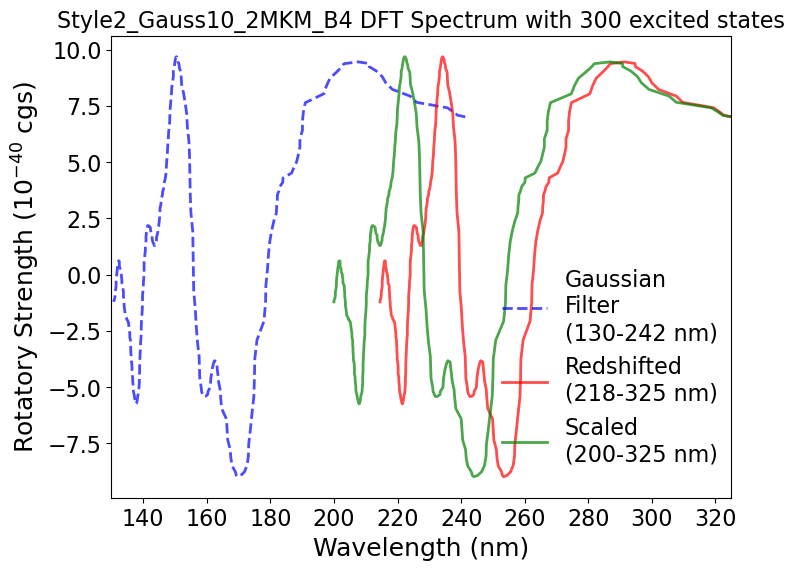


Dominant DFT Symbols by Interval:
Wavelength Range Primary State Secondary State  Mean  Std Dev
            <205             -               0 -2.35     2.05
         205-215             -               0 -1.80     2.86
         215-225             +               0  6.08     2.92
         225-235             -              -- -1.11     4.45
         240-255            --               - -5.84     3.11
         255-265             0             N/A  3.36     0.97
         265-275             +             N/A  6.46     0.99
         275-285             +             N/A  8.95     0.35
         285-300             +             N/A  9.01     0.43
            >320             +             N/A  7.10     0.09


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from collections import Counter

# Step 0: Prerequisites settings
# Taskname and Input .csv data file.
# Change everytime!
Taskname = "Style2_Gauss10_2MKM_B4" 
Data_pathway = "../Raw_DFT/28Mar2025_2MKM-B4_TDDFT-TDA_CD_proj12.csv"

# Step 1: Read raw data
globals()[f"filepath_{Taskname}"] = f"{Data_pathway}"
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])

# Step 2: Extract wavelength and CD rotatory strength (electric dipole)
globals()[f"wavelength_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"cd_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# Step 3: Apply Gaussian Filter
globals()[f"sigma_{Taskname}"] = 10
globals()[f"cd_gauss_{Taskname}"] = gaussian_filter1d(globals()[f"cd_raw_{Taskname}"], globals()[f"sigma_{Taskname}"])

# Step 4: Select region.
# Using wider range, 130 - 250 nm to cover full range.
# May change in future
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_{Taskname}"] >= 130) & (globals()[f"wavelength_{Taskname}"] <= 250)
globals()[f"wavelength_selected_{Taskname}"] = globals()[f"wavelength_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"cd_selected_{Taskname}"] = globals()[f"cd_gauss_{Taskname}"][globals()[f"mask_{Taskname}"]]

# Step 5: Redshift to align max wavelength to 325 nm
globals()[f"max_wl_{Taskname}"] = globals()[f"wavelength_selected_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 325 - globals()[f"max_wl_{Taskname}"]
globals()[f"wavelength_redshifted_{Taskname}"] = globals()[f"wavelength_selected_{Taskname}"] + globals()[f"redshift_{Taskname}"]
print(f"[INFO] Redshifted by: {round(globals()[f'redshift_{Taskname}'], 2)} nm to align max wavelength to 325 nm.")

# Step 6: Scale so that min wavelength becomes 200 nm
globals()[f"min_wl_{Taskname}"] = globals()[f"wavelength_redshifted_{Taskname}"].min()
globals()[f"scalefactor_{Taskname}"] = (325 - 205) / (325 - globals()[f"min_wl_{Taskname}"])
globals()[f"wavelength_scaled_{Taskname}"] = 325 - (325 - globals()[f"wavelength_redshifted_{Taskname}"]) * globals()[f"scalefactor_{Taskname}"]

# Step 7: Plotting
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(globals()[f"wavelength_selected_{Taskname}"], globals()[f"cd_selected_{Taskname}"], color="blue", linestyle="dashed", label="Gaussian\nFilter\n(130-242 nm)", linewidth=2, alpha=0.7)
ax.plot(globals()[f"wavelength_redshifted_{Taskname}"], globals()[f"cd_selected_{Taskname}"], color="red", label="Redshifted\n(218-325 nm)", linewidth=2, alpha=0.7)
ax.plot(globals()[f"wavelength_scaled_{Taskname}"], globals()[f"cd_selected_{Taskname}"], color="green", label="Scaled\n(200-325 nm)", linewidth=2, alpha=0.7)
ax.set_xlabel("Wavelength (nm)", size=18)
ax.set_ylabel("Rotatory Strength (10$^{\\mathrm{-40}}$ cgs)", color="black", size=18)
ax.tick_params(axis='y', labelcolor="black")
plt.xticks(np.arange(140, 341, 20), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(130, 325) # Starting from 130
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(1.01, 0.54))
plt.title(f"{Taskname} DFT Spectrum with 300 excited states", size=16)
plt.tight_layout
plt.savefig(f"../Figures/{Taskname}-DFT_Spectrum.png", dpi=600)
plt.show()

# Step 8: Symbolic classification
intervals = {
    "<205": lambda x: x < 205,
    "205-215": lambda x: (x >= 205) & (x < 215),
    "215-225": lambda x: (x >= 215) & (x < 225),
    "225-235": lambda x: (x >= 225) & (x < 235),
    "240-255": lambda x: (x >= 240) & (x < 255),
    "255-265": lambda x: (x >= 255) & (x < 265),
    "265-275": lambda x: (x >= 265) & (x < 275),
    "275-285": lambda x: (x >= 275) & (x < 285),
    "285-300": lambda x: (x >= 285) & (x < 300),
    ">320": lambda x: x > 320
}

def classify_symbol(y):
    if y >= 10:
        return "++"
    elif y <= -5:
        return "--"
    elif 5 < y < 10:
        return "+"
    elif -5 < y <= 0:
        return "-"
    elif 0 < y < 5:
        return "0"
    else:
        return "0"

summary_stats = []
for label, condition in intervals.items():
    mask_interval = condition(globals()[f"wavelength_scaled_{Taskname}"])
    y_vals = globals()[f"cd_selected_{Taskname}"][mask_interval] if np.sum(mask_interval) > 0 else []
    if len(y_vals) == 0:
        summary_stats.append([label, "N/A", "N/A", "N/A", "N/A"])
    else:
        symbols = [classify_symbol(y) for y in y_vals]
        counts = Counter(symbols).most_common(2)
        primary = counts[0][0] if len(counts) > 0 else "N/A"
        secondary = counts[1][0] if len(counts) > 1 else "N/A"
        mean_val = np.mean(y_vals)
        std_val = np.std(y_vals)
        summary_stats.append([label, primary, secondary, round(mean_val, 2), round(std_val, 2)])

globals()[f"df_summary_{Taskname}"] = pd.DataFrame(summary_stats, columns=["Wavelength Range", "Primary State", "Secondary State", "Mean", "Std Dev"])
print("\nDominant DFT Symbols by Interval:")
print(globals()[f"df_summary_{Taskname}"].to_string(index=False))

### 2.2.4 2MKM-B6 Cryptand-2 G6. 

[INFO] Redshifted by: 80.8 nm to align max wavelength to 325 nm.


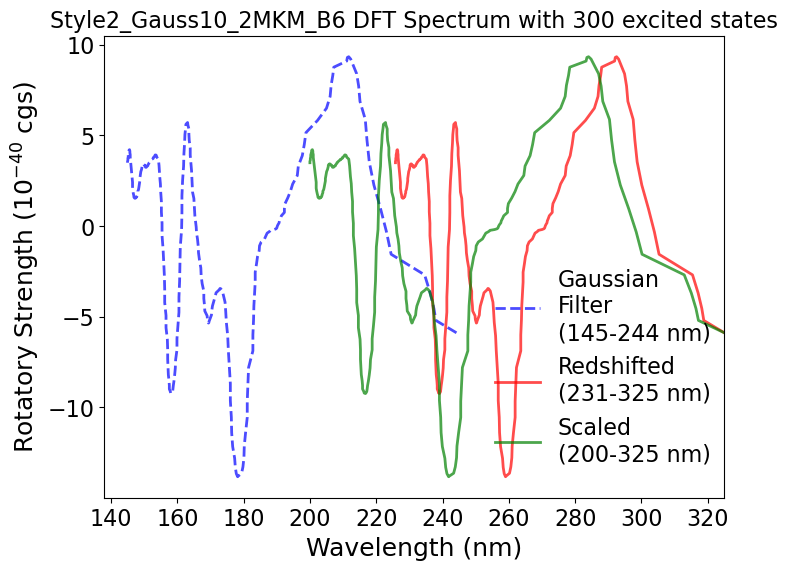


Dominant DFT Symbols by Interval:
Wavelength Range Primary State Secondary State  Mean  Std Dev
            <205             0             N/A  2.95     0.84
         205-215             0               -  2.50     2.26
         215-225            --               0 -2.12     5.77
         225-235             -              -- -2.87     2.21
         240-255            --               - -6.35     5.22
         255-265             0               -  0.87     1.05
         265-275             +               0  4.83     0.73
         275-285             +             N/A  8.37     0.97
         285-300             +               0  4.89     3.04
            >320            --             N/A -5.78     0.11


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from collections import Counter

# Step 0: Prerequisites settings
# Taskname and Input .csv data file.
# Change everytime!
Taskname = "Style2_Gauss10_2MKM_B6" 
Data_pathway = "../Raw_DFT/28Mar2025_2MKM-B6_TDDFT-TDA_CD_proj14.csv"

# Step 1: Read raw data
globals()[f"filepath_{Taskname}"] = f"{Data_pathway}"
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])

# Step 2: Extract wavelength and CD rotatory strength (electric dipole)
globals()[f"wavelength_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"cd_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# Step 3: Apply Gaussian Filter
globals()[f"sigma_{Taskname}"] = 10
globals()[f"cd_gauss_{Taskname}"] = gaussian_filter1d(globals()[f"cd_raw_{Taskname}"], globals()[f"sigma_{Taskname}"])

# Step 4: Select region.
# Using wider range, 130 - 250 nm to cover full range.
# May change in future
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_{Taskname}"] >= 130) & (globals()[f"wavelength_{Taskname}"] <= 250)
globals()[f"wavelength_selected_{Taskname}"] = globals()[f"wavelength_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"cd_selected_{Taskname}"] = globals()[f"cd_gauss_{Taskname}"][globals()[f"mask_{Taskname}"]]

# Step 5: Redshift to align max wavelength to 325 nm
globals()[f"max_wl_{Taskname}"] = globals()[f"wavelength_selected_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 325 - globals()[f"max_wl_{Taskname}"]
globals()[f"wavelength_redshifted_{Taskname}"] = globals()[f"wavelength_selected_{Taskname}"] + globals()[f"redshift_{Taskname}"]
print(f"[INFO] Redshifted by: {round(globals()[f'redshift_{Taskname}'], 2)} nm to align max wavelength to 325 nm.")

# Step 6: Scale so that min wavelength becomes 200 nm
globals()[f"min_wl_{Taskname}"] = globals()[f"wavelength_redshifted_{Taskname}"].min()
globals()[f"scalefactor_{Taskname}"] = (325 - 205) / (325 - globals()[f"min_wl_{Taskname}"])
globals()[f"wavelength_scaled_{Taskname}"] = 325 - (325 - globals()[f"wavelength_redshifted_{Taskname}"]) * globals()[f"scalefactor_{Taskname}"]

# Step 7: Plotting
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(globals()[f"wavelength_selected_{Taskname}"], globals()[f"cd_selected_{Taskname}"], color="blue", linestyle="dashed", label="Gaussian\nFilter\n(145-244 nm)", linewidth=2, alpha=0.7)
ax.plot(globals()[f"wavelength_redshifted_{Taskname}"], globals()[f"cd_selected_{Taskname}"], color="red", label="Redshifted\n(231-325 nm)", linewidth=2, alpha=0.7)
ax.plot(globals()[f"wavelength_scaled_{Taskname}"], globals()[f"cd_selected_{Taskname}"], color="green", label="Scaled\n(200-325 nm)", linewidth=2, alpha=0.7)
ax.set_xlabel("Wavelength (nm)", size=18)
ax.set_ylabel("Rotatory Strength (10$^{\\mathrm{-40}}$ cgs)", color="black", size=18)
ax.tick_params(axis='y', labelcolor="black")
plt.xticks(np.arange(140, 341, 20), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(138, 325)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(1.01, 0.54))
plt.title(f"{Taskname} DFT Spectrum with 300 excited states", size=16)
plt.tight_layout
plt.savefig(f"../Figures/{Taskname}-DFT_Spectrum.png", dpi=600)
plt.show()

# Step 8: Symbolic classification
intervals = {
    "<205": lambda x: x < 205,
    "205-215": lambda x: (x >= 205) & (x < 215),
    "215-225": lambda x: (x >= 215) & (x < 225),
    "225-235": lambda x: (x >= 225) & (x < 235),
    "240-255": lambda x: (x >= 240) & (x < 255),
    "255-265": lambda x: (x >= 255) & (x < 265),
    "265-275": lambda x: (x >= 265) & (x < 275),
    "275-285": lambda x: (x >= 275) & (x < 285),
    "285-300": lambda x: (x >= 285) & (x < 300),
    ">320": lambda x: x > 320
}

def classify_symbol(y):
    if y >= 10:
        return "++"
    elif y <= -5:
        return "--"
    elif 5 < y < 10:
        return "+"
    elif -5 < y <= 0:
        return "-"
    elif 0 < y < 5:
        return "0"
    else:
        return "0"

summary_stats = []
for label, condition in intervals.items():
    mask_interval = condition(globals()[f"wavelength_scaled_{Taskname}"])
    y_vals = globals()[f"cd_selected_{Taskname}"][mask_interval] if np.sum(mask_interval) > 0 else []
    if len(y_vals) == 0:
        summary_stats.append([label, "N/A", "N/A", "N/A", "N/A"])
    else:
        symbols = [classify_symbol(y) for y in y_vals]
        counts = Counter(symbols).most_common(2)
        primary = counts[0][0] if len(counts) > 0 else "N/A"
        secondary = counts[1][0] if len(counts) > 1 else "N/A"
        mean_val = np.mean(y_vals)
        std_val = np.std(y_vals)
        summary_stats.append([label, primary, secondary, round(mean_val, 2), round(std_val, 2)])

globals()[f"df_summary_{Taskname}"] = pd.DataFrame(summary_stats, columns=["Wavelength Range", "Primary State", "Secondary State", "Mean", "Std Dev"])
print("\nDominant DFT Symbols by Interval:")
print(globals()[f"df_summary_{Taskname}"].to_string(index=False))

## 3. Dynamics value Gaussian broaden for 2MFU projects

### 3.1 Dynamic Gaussian broaden width (320 nm) to (202 nm). (Style4)

### 3.1.1 2MFU-C1 11G Na+ (Including G8,G13,G21)

       Method  Peak_λ(nm)     Peak_Δε
0    Gaussian  278.227425  157.212062
1  Lorentzian  280.167224  108.384193
2       Voigt  274.347826   61.546668


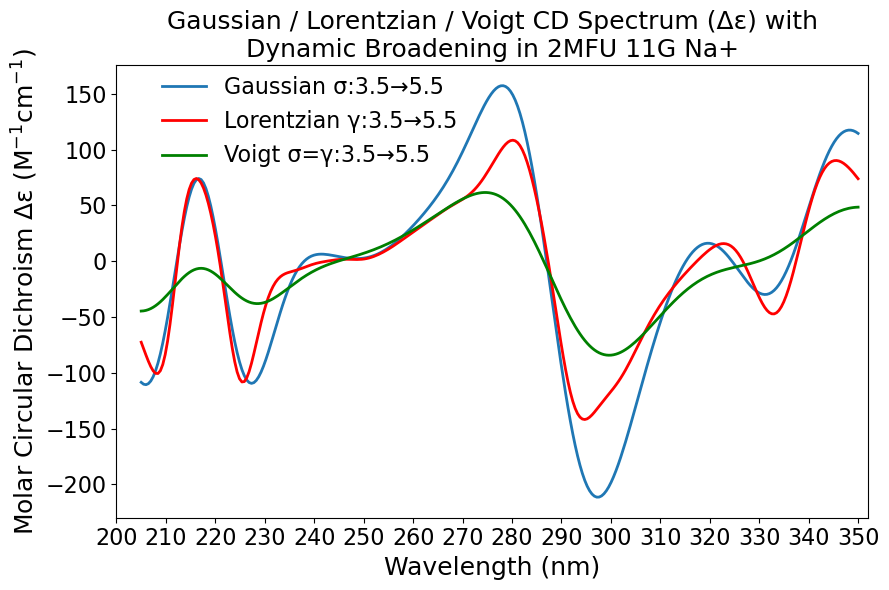

Spectrum data saved to: ../Figures/Output_Spectrum_csv/Style4_DynAll_Norman_DeltaEps_2MFU_C1_SimulatedSpectra.csv


In [21]:
# Attempt 10. All dynamics attempt: Gaussian / Lorentzian / Voigt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz
from collections import Counter

# === Step 0: Prerequisites settings ===
Taskname = "Style4_DynAll_Norman_DeltaEps_2MFU_C1"
globals()[f"filepath_{Taskname}"] = "../Raw_DFT/11Jun2025_2MFU-C1_TDDFT-TDA_CD_proj24.csv"

# === Step 1: Read raw CD data ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region 130–250 nm ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 255)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Build x_grid ===
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)
globals()[f"cd_gauss_variable_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])
globals()[f"cd_lorentz_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])
globals()[f"cd_voigt_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])

# === Step 4: Apply dynamic broadening ===
for wl, inten in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
    frac = (wl - globals()[f"wavelength_sel_{Taskname}"].min()) / (globals()[f"wavelength_sel_{Taskname}"].max() - globals()[f"wavelength_sel_{Taskname}"].min())
    sigma_var = 3.5 - frac * (3.5 - 5.5)
    gamma = sigma_var

    gauss = inten * np.exp(-0.5 * ((globals()[f"x_grid_{Taskname}"] - wl) / sigma_var)**2)
    gauss /= sigma_var * np.sqrt(2 * np.pi)
    globals()[f"cd_gauss_variable_{Taskname}"] += gauss

    lorentz = inten * (gamma / np.pi) / ((globals()[f"x_grid_{Taskname}"] - wl)**2 + gamma**2)
    globals()[f"cd_lorentz_{Taskname}"] += lorentz

    z = ((globals()[f"x_grid_{Taskname}"] - wl) + 1j * gamma) / (sigma_var * np.sqrt(2))
    voigt = inten * np.real(wofz(z)) / (sigma_var * np.sqrt(2 * np.pi))
    globals()[f"cd_voigt_{Taskname}"] += voigt

# === Step 5: Redshift and rescale ===
current_max = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]

current_min = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]

# === Step 6: Δε conversion (Norman-style, π compensated) ===
conversion_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * sigma_var) * np.pi
globals()[f"cd_gauss_deps_{Taskname}"] = globals()[f"cd_gauss_variable_{Taskname}"] * conversion_factor
globals()[f"cd_lorentz_deps_{Taskname}"] = globals()[f"cd_lorentz_{Taskname}"] * conversion_factor
globals()[f"cd_voigt_deps_{Taskname}"] = globals()[f"cd_voigt_{Taskname}"] * conversion_factor

# === Step 7: Peak comparison table ===
globals()[f"peak_df_{Taskname}"] = pd.DataFrame({
    "Method": ["Gaussian", "Lorentzian", "Voigt"],
    "Peak_λ(nm)": [
        globals()[f"x_scaled_{Taskname}"][np.argmax(globals()[f"cd_gauss_deps_{Taskname}"])],
        globals()[f"x_scaled_{Taskname}"][np.argmax(globals()[f"cd_lorentz_deps_{Taskname}"])],
        globals()[f"x_scaled_{Taskname}"][np.argmax(globals()[f"cd_voigt_deps_{Taskname}"])]
    ],
    "Peak_Δε": [
        np.max(globals()[f"cd_gauss_deps_{Taskname}"]),
        np.max(globals()[f"cd_lorentz_deps_{Taskname}"]),
        np.max(globals()[f"cd_voigt_deps_{Taskname}"])
    ]
})
# Print out peak comparision table
print(globals()[f"peak_df_{Taskname}"])
globals()[f"peak_df_{Taskname}"].to_csv(f"../Figures/Dynamic_Width/{Taskname}_PeakTable.csv", index=False)

# === Step 8: Plot spectra ===
plt.figure(figsize=(9,6))
plt.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_deps_{Taskname}"], label="Gaussian σ:3.5→5.5", color="#1f77b4", linewidth=2)
plt.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_lorentz_deps_{Taskname}"], label="Lorentzian γ:3.5→5.5", color="red", linewidth=2)
plt.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_voigt_deps_{Taskname}"], label="Voigt σ=γ:3.5→5.5", color="green", linewidth=2)

plt.xlabel("Wavelength (nm)", fontsize=18)
plt.ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 352, 10), fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(200, 352)
plt.xlim(200, 352)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.48, 1.02))
plt.title("Gaussian / Lorentzian / Voigt CD Spectrum (Δε) with\nDynamic Broadening in 2MFU 11G Na+", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Dynamic_Width/{Taskname}-Dynamic_Broadening_Comparison_Depsilon.png", dpi=600)
plt.show()

# # === Step 9: Auto-annotation on statistics within intervials  ===

# On Gaussian only：
wavelength_array = globals()[f"x_scaled_{Taskname}"]
cd_array = globals()[f"cd_gauss_deps_{Taskname}"]

intervals = {
    "<205": lambda x: x < 205,
    "205-210": lambda x: (x >= 205) & (x < 210),
    "210-215": lambda x: (x >= 210) & (x < 215),
    "215-220": lambda x: (x >= 215) & (x < 220),
    "220-225": lambda x: (x >= 220) & (x < 225),
    "225-230": lambda x: (x >= 225) & (x < 230),
    "230-235": lambda x: (x >= 230) & (x < 235),
    "235-240": lambda x: (x >= 235) & (x < 240),
    "240-245": lambda x: (x >= 240) & (x < 245),
    "245-250": lambda x: (x >= 245) & (x < 250),
    "250-255": lambda x: (x >= 250) & (x < 255),
    "255-260": lambda x: (x >= 255) & (x < 260),
    "260-265": lambda x: (x >= 260) & (x < 265),
    "265-270": lambda x: (x >= 265) & (x < 270),
    "270-275": lambda x: (x >= 270) & (x < 275),
    "275-280": lambda x: (x >= 275) & (x < 280),
    "280-285": lambda x: (x >= 280) & (x < 285),
    "285-290": lambda x: (x >= 285) & (x < 290),
    "290-295": lambda x: (x >= 290) & (x < 295),
    "295-300": lambda x: (x >= 295) & (x < 300),
    "300-305": lambda x: (x >= 300) & (x < 305),
    "305-310": lambda x: (x >= 305) & (x < 310),
    ">310": lambda x: x > 310
}

def classify_symbol(y):
    if y >= 20:
        return "++"
    elif 0 < y < 20:
        return "+"
    elif -20 < y <= 0:
        return "-"
    elif y <= -20:
        return "--"

summary_stats = []
for label, condition in intervals.items():
    mask_interval = condition(wavelength_array)
    y_vals = cd_array[mask_interval] if np.sum(mask_interval) > 0 else []
    if len(y_vals) == 0:
        summary_stats.append([label, "N/A", "N/A", "N/A", "N/A"])
    else:
        symbols = [classify_symbol(y) for y in y_vals]
        counts = Counter(symbols).most_common(2)
        primary = counts[0][0] if len(counts) > 0 else "N/A"
        secondary = counts[1][0] if len(counts) > 1 else "N/A"
        mean_val = np.mean(y_vals)
        std_val = np.std(y_vals)
        summary_stats.append([label, primary, secondary, round(mean_val, 2), round(std_val, 2)])

# Save into DataFrame
globals()[f"df_symbolic_{Taskname}"] = pd.DataFrame(summary_stats, columns=["Wavelength Range", "Primary State", "Secondary State", "Mean", "Std Dev"])
globals()[f"df_symbolic_{Taskname}"].to_csv(f"../Figures/Dynamic_Width/{Taskname}_SymbolicTable.csv", index=False)

# === Step 10: Save simulated spectra data into CSV ===
spectrum_df = pd.DataFrame({
    "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
    "Δε_Gaussian": globals()[f"cd_gauss_deps_{Taskname}"],
    "Δε_Lorentzian": globals()[f"cd_lorentz_deps_{Taskname}"],
    "Δε_Voigt": globals()[f"cd_voigt_deps_{Taskname}"]
})

spectrum_csv_path = f"../Figures/Output_Spectrum_csv/{Taskname}_SimulatedSpectra.csv"
spectrum_df.to_csv(spectrum_csv_path, index=False)
print(f"Spectrum data saved to: {spectrum_csv_path}")

### 3.1.2 2MFU-C2 8G Na+ (Stem 2-tetrad only)

       Method  Peak_λ(nm)     Peak_Δε
0    Gaussian  288.411371  362.655401
1  Lorentzian  290.351171  281.077887
2       Voigt  287.441472  151.891978


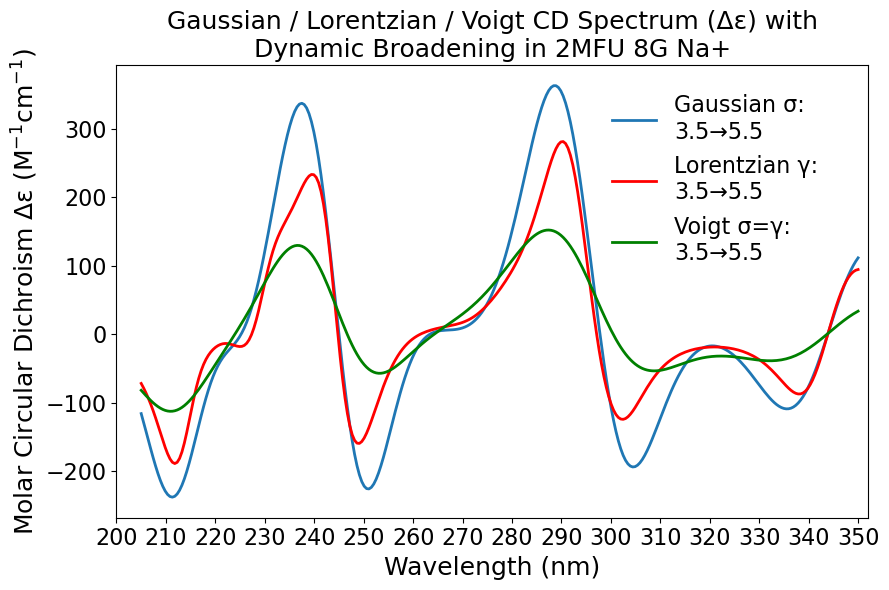

Spectrum data saved to: ../Figures/Dynamic_Width/Style4_DynAll_Norman_DeltaEps_2MFU_C2_SimulatedSpectra.csv
Spectrum data saved to: ../Figures/Output_Spectrum_csv/Style4_DynAll_Norman_DeltaEps_2MFU_C2_SimulatedSpectra.csv


In [20]:
# Attempt 10. All dynamics attempt: Gaussian / Lorentzian / Voigt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz
from collections import Counter

# === Step 0: Prerequisites settings ===
Taskname = "Style4_DynAll_Norman_DeltaEps_2MFU_C2"
globals()[f"filepath_{Taskname}"] = "../Raw_DFT/20May2025_2MFU-C2_TDDFT-TDA_CD_proj25.csv"

# === Step 1: Read raw CD data ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region 130–250 nm ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 255)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Build x_grid ===
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)
globals()[f"cd_gauss_variable_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])
globals()[f"cd_lorentz_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])
globals()[f"cd_voigt_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])

# === Step 4: Apply dynamic broadening ===
for wl, inten in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
    frac = (wl - globals()[f"wavelength_sel_{Taskname}"].min()) / (globals()[f"wavelength_sel_{Taskname}"].max() - globals()[f"wavelength_sel_{Taskname}"].min())
    sigma_var = 3.5 - frac * (3.5 - 5.5)
    gamma = sigma_var

    gauss = inten * np.exp(-0.5 * ((globals()[f"x_grid_{Taskname}"] - wl) / sigma_var)**2)
    gauss /= sigma_var * np.sqrt(2 * np.pi)
    globals()[f"cd_gauss_variable_{Taskname}"] += gauss

    lorentz = inten * (gamma / np.pi) / ((globals()[f"x_grid_{Taskname}"] - wl)**2 + gamma**2)
    globals()[f"cd_lorentz_{Taskname}"] += lorentz

    z = ((globals()[f"x_grid_{Taskname}"] - wl) + 1j * gamma) / (sigma_var * np.sqrt(2))
    voigt = inten * np.real(wofz(z)) / (sigma_var * np.sqrt(2 * np.pi))
    globals()[f"cd_voigt_{Taskname}"] += voigt

# === Step 5: Redshift and rescale ===
current_max = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]

current_min = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]

# === Step 6: Δε conversion (Norman-style, π compensated) ===
conversion_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * sigma_var) * np.pi
globals()[f"cd_gauss_deps_{Taskname}"] = globals()[f"cd_gauss_variable_{Taskname}"] * conversion_factor
globals()[f"cd_lorentz_deps_{Taskname}"] = globals()[f"cd_lorentz_{Taskname}"] * conversion_factor
globals()[f"cd_voigt_deps_{Taskname}"] = globals()[f"cd_voigt_{Taskname}"] * conversion_factor

# === Step 7: Peak comparison table ===
globals()[f"peak_df_{Taskname}"] = pd.DataFrame({
    "Method": ["Gaussian", "Lorentzian", "Voigt"],
    "Peak_λ(nm)": [
        globals()[f"x_scaled_{Taskname}"][np.argmax(globals()[f"cd_gauss_deps_{Taskname}"])],
        globals()[f"x_scaled_{Taskname}"][np.argmax(globals()[f"cd_lorentz_deps_{Taskname}"])],
        globals()[f"x_scaled_{Taskname}"][np.argmax(globals()[f"cd_voigt_deps_{Taskname}"])]
    ],
    "Peak_Δε": [
        np.max(globals()[f"cd_gauss_deps_{Taskname}"]),
        np.max(globals()[f"cd_lorentz_deps_{Taskname}"]),
        np.max(globals()[f"cd_voigt_deps_{Taskname}"])
    ]
})
# Print out peak comparision table
print(globals()[f"peak_df_{Taskname}"])
globals()[f"peak_df_{Taskname}"].to_csv(f"../Figures/Dynamic_Width/{Taskname}_PeakTable.csv", index=False)

# === Step 8: Plot spectra ===
plt.figure(figsize=(9,6))
plt.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_deps_{Taskname}"], label="Gaussian σ:\n3.5→5.5", color="#1f77b4", linewidth=2)
plt.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_lorentz_deps_{Taskname}"], label="Lorentzian γ:\n3.5→5.5", color="red", linewidth=2)
plt.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_voigt_deps_{Taskname}"], label="Voigt σ=γ:\n3.5→5.5", color="green", linewidth=2)

plt.xlabel("Wavelength (nm)", fontsize=18)
plt.ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 352, 10), fontsize=16)
plt.yticks(fontsize=16)
#ax.set_xlim(200, 352)
plt.xlim(200, 352)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.96, 0.98))
plt.title("Gaussian / Lorentzian / Voigt CD Spectrum (Δε) with\nDynamic Broadening in 2MFU 8G Na+", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Dynamic_Width/{Taskname}-Dynamic_Broadening_Comparison_Depsilon.png", dpi=600)
plt.show()

# # === Step 9: Auto-annotation on statistics within intervials  ===

# On Gaussian only：
wavelength_array = globals()[f"x_scaled_{Taskname}"]
cd_array = globals()[f"cd_gauss_deps_{Taskname}"]

intervals = {
    "<205": lambda x: x < 205,
    "205-210": lambda x: (x >= 205) & (x < 210),
    "210-215": lambda x: (x >= 210) & (x < 215),
    "215-220": lambda x: (x >= 215) & (x < 220),
    "220-225": lambda x: (x >= 220) & (x < 225),
    "225-230": lambda x: (x >= 225) & (x < 230),
    "230-235": lambda x: (x >= 230) & (x < 235),
    "235-240": lambda x: (x >= 235) & (x < 240),
    "240-245": lambda x: (x >= 240) & (x < 245),
    "245-250": lambda x: (x >= 245) & (x < 250),
    "250-255": lambda x: (x >= 250) & (x < 255),
    "255-260": lambda x: (x >= 255) & (x < 260),
    "260-265": lambda x: (x >= 260) & (x < 265),
    "265-270": lambda x: (x >= 265) & (x < 270),
    "270-275": lambda x: (x >= 270) & (x < 275),
    "275-280": lambda x: (x >= 275) & (x < 280),
    "280-285": lambda x: (x >= 280) & (x < 285),
    "285-290": lambda x: (x >= 285) & (x < 290),
    "290-295": lambda x: (x >= 290) & (x < 295),
    "295-300": lambda x: (x >= 295) & (x < 300),
    "300-305": lambda x: (x >= 300) & (x < 305),
    "305-310": lambda x: (x >= 305) & (x < 310),
    ">310": lambda x: x > 310
}

def classify_symbol(y):
    if y >= 20:
        return "++"
    elif 0 < y < 20:
        return "+"
    elif -20 < y <= 0:
        return "-"
    elif y <= -20:
        return "--"

summary_stats = []
for label, condition in intervals.items():
    mask_interval = condition(wavelength_array)
    y_vals = cd_array[mask_interval] if np.sum(mask_interval) > 0 else []
    if len(y_vals) == 0:
        summary_stats.append([label, "N/A", "N/A", "N/A", "N/A"])
    else:
        symbols = [classify_symbol(y) for y in y_vals]
        counts = Counter(symbols).most_common(2)
        primary = counts[0][0] if len(counts) > 0 else "N/A"
        secondary = counts[1][0] if len(counts) > 1 else "N/A"
        mean_val = np.mean(y_vals)
        std_val = np.std(y_vals)
        summary_stats.append([label, primary, secondary, round(mean_val, 2), round(std_val, 2)])

# Save into DataFrame
globals()[f"df_symbolic_{Taskname}"] = pd.DataFrame(summary_stats, columns=["Wavelength Range", "Primary State", "Secondary State", "Mean", "Std Dev"])
globals()[f"df_symbolic_{Taskname}"].to_csv(f"../Figures/Dynamic_Width/{Taskname}_SymbolicTable.csv", index=False)

# === Step 10: Save simulated spectra data into CSV ===
spectrum_df = pd.DataFrame({
    "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
    "Δε_Gaussian": globals()[f"cd_gauss_deps_{Taskname}"],
    "Δε_Lorentzian": globals()[f"cd_lorentz_deps_{Taskname}"],
    "Δε_Voigt": globals()[f"cd_voigt_deps_{Taskname}"]
})

spectrum_csv_path = f"../Figures/Dynamic_Width/{Taskname}_SimulatedSpectra.csv"
spectrum_df.to_csv(spectrum_csv_path, index=False)
print(f"Spectrum data saved to: {spectrum_csv_path}")

# === Step 10: Save simulated spectra data into CSV ===
spectrum_df = pd.DataFrame({
    "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
    "Δε_Gaussian": globals()[f"cd_gauss_deps_{Taskname}"],
    "Δε_Lorentzian": globals()[f"cd_lorentz_deps_{Taskname}"],
    "Δε_Voigt": globals()[f"cd_voigt_deps_{Taskname}"]
})

spectrum_csv_path = f"../Figures/Output_Spectrum_csv/{Taskname}_SimulatedSpectra.csv"
spectrum_df.to_csv(spectrum_csv_path, index=False)
print(f"Spectrum data saved to: {spectrum_csv_path}")

### 3.1.3 2MFU-C3 11G K+ (Including G8,G13,G21)

       Method  Peak_λ(nm)     Peak_Δε
0    Gaussian  348.060201  134.813997
1  Lorentzian  347.575251  102.676218
2       Voigt  350.000000   62.554402


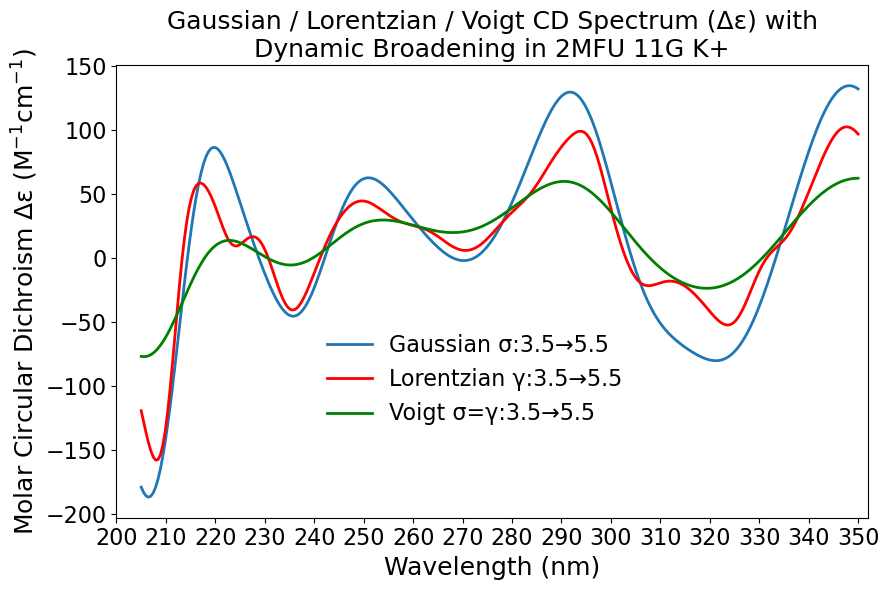

Spectrum data saved to: ../Figures/Output_Spectrum_csv/Style4_DynAll_Norman_DeltaEps_2MFU_C3_SimulatedSpectra.csv


In [17]:
# Attempt 10. All dynamics attempt: Gaussian / Lorentzian / Voigt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz
from collections import Counter

# === Step 0: Prerequisites settings ===
Taskname = "Style4_DynAll_Norman_DeltaEps_2MFU_C3"
globals()[f"filepath_{Taskname}"] = "../Raw_DFT/20May2025_2MFU-C3_TDDFT-TDA_CD_proj26.csv"

# === Step 1: Read raw CD data ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region 130–250 nm ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 255)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Build x_grid ===
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)
globals()[f"cd_gauss_variable_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])
globals()[f"cd_lorentz_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])
globals()[f"cd_voigt_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])

# === Step 4: Apply dynamic broadening ===
for wl, inten in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
    frac = (wl - globals()[f"wavelength_sel_{Taskname}"].min()) / (globals()[f"wavelength_sel_{Taskname}"].max() - globals()[f"wavelength_sel_{Taskname}"].min())
    sigma_var = 3.5 - frac * (3.5 - 5.5)
    gamma = sigma_var

    gauss = inten * np.exp(-0.5 * ((globals()[f"x_grid_{Taskname}"] - wl) / sigma_var)**2)
    gauss /= sigma_var * np.sqrt(2 * np.pi)
    globals()[f"cd_gauss_variable_{Taskname}"] += gauss

    lorentz = inten * (gamma / np.pi) / ((globals()[f"x_grid_{Taskname}"] - wl)**2 + gamma**2)
    globals()[f"cd_lorentz_{Taskname}"] += lorentz

    z = ((globals()[f"x_grid_{Taskname}"] - wl) + 1j * gamma) / (sigma_var * np.sqrt(2))
    voigt = inten * np.real(wofz(z)) / (sigma_var * np.sqrt(2 * np.pi))
    globals()[f"cd_voigt_{Taskname}"] += voigt

# === Step 5: Redshift and rescale ===
current_max = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]

current_min = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]

# === Step 6: Δε conversion (Norman-style, π compensated) ===
conversion_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * sigma_var) * np.pi
globals()[f"cd_gauss_deps_{Taskname}"] = globals()[f"cd_gauss_variable_{Taskname}"] * conversion_factor
globals()[f"cd_lorentz_deps_{Taskname}"] = globals()[f"cd_lorentz_{Taskname}"] * conversion_factor
globals()[f"cd_voigt_deps_{Taskname}"] = globals()[f"cd_voigt_{Taskname}"] * conversion_factor

# === Step 7: Peak comparison table ===
globals()[f"peak_df_{Taskname}"] = pd.DataFrame({
    "Method": ["Gaussian", "Lorentzian", "Voigt"],
    "Peak_λ(nm)": [
        globals()[f"x_scaled_{Taskname}"][np.argmax(globals()[f"cd_gauss_deps_{Taskname}"])],
        globals()[f"x_scaled_{Taskname}"][np.argmax(globals()[f"cd_lorentz_deps_{Taskname}"])],
        globals()[f"x_scaled_{Taskname}"][np.argmax(globals()[f"cd_voigt_deps_{Taskname}"])]
    ],
    "Peak_Δε": [
        np.max(globals()[f"cd_gauss_deps_{Taskname}"]),
        np.max(globals()[f"cd_lorentz_deps_{Taskname}"]),
        np.max(globals()[f"cd_voigt_deps_{Taskname}"])
    ]
})
# Print out peak comparision table
print(globals()[f"peak_df_{Taskname}"])
globals()[f"peak_df_{Taskname}"].to_csv(f"../Figures/Dynamic_Width/{Taskname}_PeakTable.csv", index=False)

# === Step 8: Plot spectra ===
plt.figure(figsize=(9,6))
plt.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_deps_{Taskname}"], label="Gaussian σ:3.5→5.5", color="#1f77b4", linewidth=2)
plt.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_lorentz_deps_{Taskname}"], label="Lorentzian γ:3.5→5.5", color="red", linewidth=2)
plt.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_voigt_deps_{Taskname}"], label="Voigt σ=γ:3.5→5.5", color="green", linewidth=2)

plt.xlabel("Wavelength (nm)", fontsize=18)
plt.ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 352, 10), fontsize=16)
plt.yticks(np.arange(-200, 152, 50), fontsize=16)
#ax.set_xlim(200, 352)
plt.xlim(200, 352)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.70, 0.45))
plt.title("Gaussian / Lorentzian / Voigt CD Spectrum (Δε) with\nDynamic Broadening in 2MFU 11G K+", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Dynamic_Width/{Taskname}-Dynamic_Broadening_Comparison_Depsilon.png", dpi=600)
plt.show()

# # === Step 9: Auto-annotation on statistics within intervials  ===

# On Gaussian only：
wavelength_array = globals()[f"x_scaled_{Taskname}"]
cd_array = globals()[f"cd_gauss_deps_{Taskname}"]

intervals = {
    "<205": lambda x: x < 205,
    "205-210": lambda x: (x >= 205) & (x < 210),
    "210-215": lambda x: (x >= 210) & (x < 215),
    "215-220": lambda x: (x >= 215) & (x < 220),
    "220-225": lambda x: (x >= 220) & (x < 225),
    "225-230": lambda x: (x >= 225) & (x < 230),
    "230-235": lambda x: (x >= 230) & (x < 235),
    "235-240": lambda x: (x >= 235) & (x < 240),
    "240-245": lambda x: (x >= 240) & (x < 245),
    "245-250": lambda x: (x >= 245) & (x < 250),
    "250-255": lambda x: (x >= 250) & (x < 255),
    "255-260": lambda x: (x >= 255) & (x < 260),
    "260-265": lambda x: (x >= 260) & (x < 265),
    "265-270": lambda x: (x >= 265) & (x < 270),
    "270-275": lambda x: (x >= 270) & (x < 275),
    "275-280": lambda x: (x >= 275) & (x < 280),
    "280-285": lambda x: (x >= 280) & (x < 285),
    "285-290": lambda x: (x >= 285) & (x < 290),
    "290-295": lambda x: (x >= 290) & (x < 295),
    "295-300": lambda x: (x >= 295) & (x < 300),
    "300-305": lambda x: (x >= 300) & (x < 305),
    "305-310": lambda x: (x >= 305) & (x < 310),
    ">310": lambda x: x > 310
}

def classify_symbol(y):
    if y >= 20:
        return "++"
    elif 0 < y < 20:
        return "+"
    elif -20 < y <= 0:
        return "-"
    elif y <= -20:
        return "--"

summary_stats = []
for label, condition in intervals.items():
    mask_interval = condition(wavelength_array)
    y_vals = cd_array[mask_interval] if np.sum(mask_interval) > 0 else []
    if len(y_vals) == 0:
        summary_stats.append([label, "N/A", "N/A", "N/A", "N/A"])
    else:
        symbols = [classify_symbol(y) for y in y_vals]
        counts = Counter(symbols).most_common(2)
        primary = counts[0][0] if len(counts) > 0 else "N/A"
        secondary = counts[1][0] if len(counts) > 1 else "N/A"
        mean_val = np.mean(y_vals)
        std_val = np.std(y_vals)
        summary_stats.append([label, primary, secondary, round(mean_val, 2), round(std_val, 2)])

# Save into DataFrame
globals()[f"df_symbolic_{Taskname}"] = pd.DataFrame(summary_stats, columns=["Wavelength Range", "Primary State", "Secondary State", "Mean", "Std Dev"])
globals()[f"df_symbolic_{Taskname}"].to_csv(f"../Figures/Dynamic_Width/{Taskname}_SymbolicTable.csv", index=False)

# === Step 10: Save simulated spectra data into CSV ===
spectrum_df = pd.DataFrame({
    "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
    "Δε_Gaussian": globals()[f"cd_gauss_deps_{Taskname}"],
    "Δε_Lorentzian": globals()[f"cd_lorentz_deps_{Taskname}"],
    "Δε_Voigt": globals()[f"cd_voigt_deps_{Taskname}"]
})

spectrum_csv_path = f"../Figures/Output_Spectrum_csv/{Taskname}_SimulatedSpectra.csv"
spectrum_df.to_csv(spectrum_csv_path, index=False)
print(f"Spectrum data saved to: {spectrum_csv_path}")

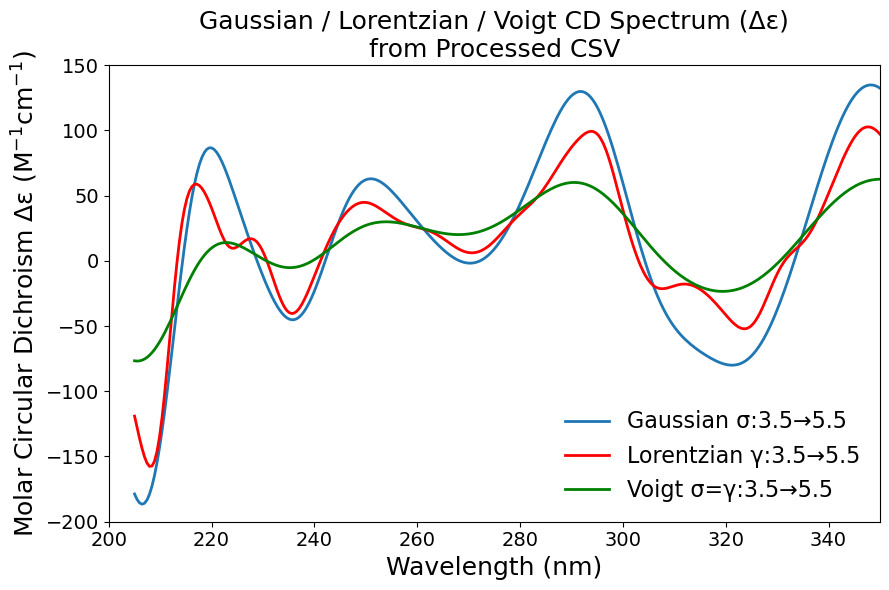

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load processed spectrum ===
csv_path = "../Figures/Output_Spectrum_csv/Style4_DynAll_Norman_DeltaEps_2MFU_C3_SimulatedSpectra.csv"
df = pd.read_csv(csv_path)

# === Step 2: Plot ===
plt.figure(figsize=(9,6))
plt.plot(df["Wavelength(nm)"], df["Δε_Gaussian"], label="Gaussian σ:3.5→5.5", color="#1f77b4", linewidth=2)
plt.plot(df["Wavelength(nm)"], df["Δε_Lorentzian"], label="Lorentzian γ:3.5→5.5", color="red", linewidth=2)
plt.plot(df["Wavelength(nm)"], df["Δε_Voigt"], label="Voigt σ=γ:3.5→5.5", color="green", linewidth=2)

plt.xlabel("Wavelength (nm)", fontsize=18)
plt.ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(200, 350)
plt.ylim(-200, 150)
plt.title("Gaussian / Lorentzian / Voigt CD Spectrum (Δε)\nfrom Processed CSV", fontsize=18)
plt.legend(fontsize=16, frameon=False)
plt.tight_layout()
plt.show()


### 3.1.4 2MFU-C4 8G K+ (2 tetrad stem guanosines only)

       Method  Peak_λ(nm)     Peak_Δε
0    Gaussian  235.066890  252.979015
1  Lorentzian  296.655518  196.590578
2       Voigt  293.260870   93.245557


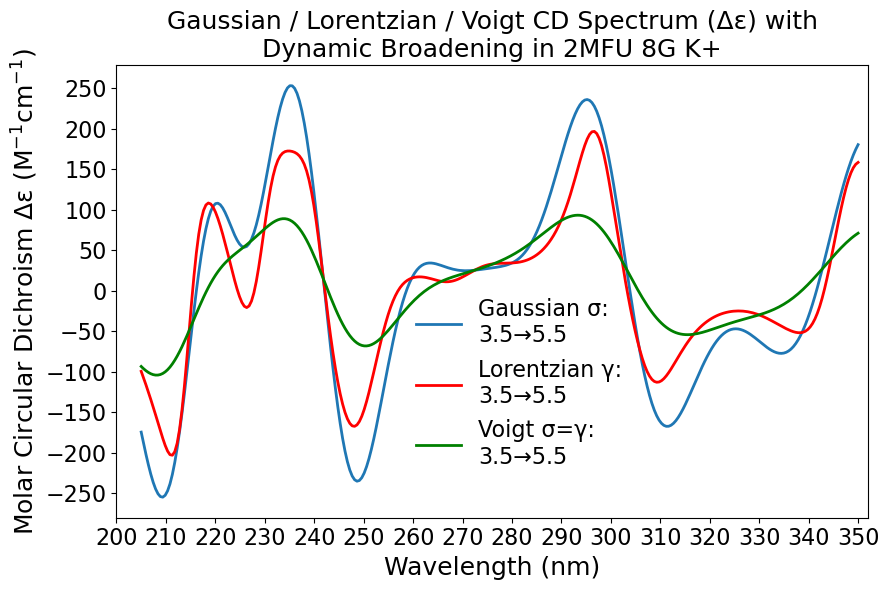

Spectrum data saved to: ../Figures/Output_Spectrum_csv/Style4_DynAll_Norman_DeltaEps_2MFU_C4_SimulatedSpectra.csv


In [19]:
# Attempt 10. All dynamics attempt: Gaussian / Lorentzian / Voigt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz
from collections import Counter

# === Step 0: Prerequisites settings ===
Taskname = "Style4_DynAll_Norman_DeltaEps_2MFU_C4"
globals()[f"filepath_{Taskname}"] = "../Raw_DFT/20May2025_2MFU-C4_TDDFT-TDA_CD_proj27.csv"

# === Step 1: Read raw CD data ===
globals()[f"df_{Taskname}"] = pd.read_csv(globals()[f"filepath_{Taskname}"])
globals()[f"wavelength_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"rotatory_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# === Step 2: Select region 130–250 nm ===
globals()[f"mask_{Taskname}"] = (globals()[f"wavelength_raw_{Taskname}"] >= 130) & (globals()[f"wavelength_raw_{Taskname}"] <= 255)
globals()[f"wavelength_sel_{Taskname}"] = globals()[f"wavelength_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]
globals()[f"rotatory_sel_{Taskname}"] = globals()[f"rotatory_raw_{Taskname}"][globals()[f"mask_{Taskname}"]]

# === Step 3: Build x_grid ===
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_sel_{Taskname}"].min(), globals()[f"wavelength_sel_{Taskname}"].max(), 300)
globals()[f"cd_gauss_variable_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])
globals()[f"cd_lorentz_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])
globals()[f"cd_voigt_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])

# === Step 4: Apply dynamic broadening ===
for wl, inten in zip(globals()[f"wavelength_sel_{Taskname}"], globals()[f"rotatory_sel_{Taskname}"]):
    frac = (wl - globals()[f"wavelength_sel_{Taskname}"].min()) / (globals()[f"wavelength_sel_{Taskname}"].max() - globals()[f"wavelength_sel_{Taskname}"].min())
    sigma_var = 3.5 - frac * (3.5 - 5.5)
    gamma = sigma_var

    gauss = inten * np.exp(-0.5 * ((globals()[f"x_grid_{Taskname}"] - wl) / sigma_var)**2)
    gauss /= sigma_var * np.sqrt(2 * np.pi)
    globals()[f"cd_gauss_variable_{Taskname}"] += gauss

    lorentz = inten * (gamma / np.pi) / ((globals()[f"x_grid_{Taskname}"] - wl)**2 + gamma**2)
    globals()[f"cd_lorentz_{Taskname}"] += lorentz

    z = ((globals()[f"x_grid_{Taskname}"] - wl) + 1j * gamma) / (sigma_var * np.sqrt(2))
    voigt = inten * np.real(wofz(z)) / (sigma_var * np.sqrt(2 * np.pi))
    globals()[f"cd_voigt_{Taskname}"] += voigt

# === Step 5: Redshift and rescale ===
current_max = globals()[f"x_grid_{Taskname}"].max()
globals()[f"redshift_{Taskname}"] = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + globals()[f"redshift_{Taskname}"]

current_min = globals()[f"x_redshifted_{Taskname}"].min()
globals()[f"scale_factor_{Taskname}"] = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * globals()[f"scale_factor_{Taskname}"]

# === Step 6: Δε conversion (Norman-style, π compensated) ===
conversion_factor = globals()[f"x_scaled_{Taskname}"] / (22.94 * np.sqrt(np.pi) * sigma_var) * np.pi
globals()[f"cd_gauss_deps_{Taskname}"] = globals()[f"cd_gauss_variable_{Taskname}"] * conversion_factor
globals()[f"cd_lorentz_deps_{Taskname}"] = globals()[f"cd_lorentz_{Taskname}"] * conversion_factor
globals()[f"cd_voigt_deps_{Taskname}"] = globals()[f"cd_voigt_{Taskname}"] * conversion_factor

# === Step 7: Peak comparison table ===
globals()[f"peak_df_{Taskname}"] = pd.DataFrame({
    "Method": ["Gaussian", "Lorentzian", "Voigt"],
    "Peak_λ(nm)": [
        globals()[f"x_scaled_{Taskname}"][np.argmax(globals()[f"cd_gauss_deps_{Taskname}"])],
        globals()[f"x_scaled_{Taskname}"][np.argmax(globals()[f"cd_lorentz_deps_{Taskname}"])],
        globals()[f"x_scaled_{Taskname}"][np.argmax(globals()[f"cd_voigt_deps_{Taskname}"])]
    ],
    "Peak_Δε": [
        np.max(globals()[f"cd_gauss_deps_{Taskname}"]),
        np.max(globals()[f"cd_lorentz_deps_{Taskname}"]),
        np.max(globals()[f"cd_voigt_deps_{Taskname}"])
    ]
})
# Print out peak comparision table
print(globals()[f"peak_df_{Taskname}"])
globals()[f"peak_df_{Taskname}"].to_csv(f"../Figures/Dynamic_Width/{Taskname}_PeakTable.csv", index=False)

# === Step 8: Plot spectra ===
plt.figure(figsize=(9,6))
plt.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_deps_{Taskname}"], label="Gaussian σ:\n3.5→5.5", color="#1f77b4", linewidth=2)
plt.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_lorentz_deps_{Taskname}"], label="Lorentzian γ:\n3.5→5.5", color="red", linewidth=2)
plt.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_voigt_deps_{Taskname}"], label="Voigt σ=γ:\n3.5→5.5", color="green", linewidth=2)

plt.xlabel("Wavelength (nm)", fontsize=18)
plt.ylabel("Molar Circular Dichroism Δε (M$^{-1}$cm$^{-1}$)", fontsize=18)
plt.xticks(np.arange(200, 352, 10), fontsize=16)
plt.yticks(np.arange(-250, 252, 50), fontsize=16)
ax.set_xlim(200, 352)
plt.xlim(200, 352)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.70, 0.53))
plt.title("Gaussian / Lorentzian / Voigt CD Spectrum (Δε) with\nDynamic Broadening in 2MFU 8G K+", fontsize=18)
plt.tight_layout()
plt.savefig(f"../Figures/Dynamic_Width/{Taskname}-Dynamic_Broadening_Comparison_Depsilon.png", dpi=600)
plt.show()

# # === Step 9: Auto-annotation on statistics within intervials  ===

# On Gaussian only：
wavelength_array = globals()[f"x_scaled_{Taskname}"]
cd_array = globals()[f"cd_gauss_deps_{Taskname}"]

intervals = {
    "<205": lambda x: x < 205,
    "205-210": lambda x: (x >= 205) & (x < 210),
    "210-215": lambda x: (x >= 210) & (x < 215),
    "215-220": lambda x: (x >= 215) & (x < 220),
    "220-225": lambda x: (x >= 220) & (x < 225),
    "225-230": lambda x: (x >= 225) & (x < 230),
    "230-235": lambda x: (x >= 230) & (x < 235),
    "235-240": lambda x: (x >= 235) & (x < 240),
    "240-245": lambda x: (x >= 240) & (x < 245),
    "245-250": lambda x: (x >= 245) & (x < 250),
    "250-255": lambda x: (x >= 250) & (x < 255),
    "255-260": lambda x: (x >= 255) & (x < 260),
    "260-265": lambda x: (x >= 260) & (x < 265),
    "265-270": lambda x: (x >= 265) & (x < 270),
    "270-275": lambda x: (x >= 270) & (x < 275),
    "275-280": lambda x: (x >= 275) & (x < 280),
    "280-285": lambda x: (x >= 280) & (x < 285),
    "285-290": lambda x: (x >= 285) & (x < 290),
    "290-295": lambda x: (x >= 290) & (x < 295),
    "295-300": lambda x: (x >= 295) & (x < 300),
    "300-305": lambda x: (x >= 300) & (x < 305),
    "305-310": lambda x: (x >= 305) & (x < 310),
    ">310": lambda x: x > 310
}

def classify_symbol(y):
    if y >= 20:
        return "++"
    elif 0 < y < 20:
        return "+"
    elif -20 < y <= 0:
        return "-"
    elif y <= -20:
        return "--"

summary_stats = []
for label, condition in intervals.items():
    mask_interval = condition(wavelength_array)
    y_vals = cd_array[mask_interval] if np.sum(mask_interval) > 0 else []
    if len(y_vals) == 0:
        summary_stats.append([label, "N/A", "N/A", "N/A", "N/A"])
    else:
        symbols = [classify_symbol(y) for y in y_vals]
        counts = Counter(symbols).most_common(2)
        primary = counts[0][0] if len(counts) > 0 else "N/A"
        secondary = counts[1][0] if len(counts) > 1 else "N/A"
        mean_val = np.mean(y_vals)
        std_val = np.std(y_vals)
        summary_stats.append([label, primary, secondary, round(mean_val, 2), round(std_val, 2)])

# Save into DataFrame
globals()[f"df_symbolic_{Taskname}"] = pd.DataFrame(summary_stats, columns=["Wavelength Range", "Primary State", "Secondary State", "Mean", "Std Dev"])
globals()[f"df_symbolic_{Taskname}"].to_csv(f"../Figures/Dynamic_Width/{Taskname}_SymbolicTable.csv", index=False)

# === Step 10: Save simulated spectra data into CSV ===
spectrum_df = pd.DataFrame({
    "Wavelength(nm)": globals()[f"x_scaled_{Taskname}"],
    "Δε_Gaussian": globals()[f"cd_gauss_deps_{Taskname}"],
    "Δε_Lorentzian": globals()[f"cd_lorentz_deps_{Taskname}"],
    "Δε_Voigt": globals()[f"cd_voigt_deps_{Taskname}"]
})

spectrum_csv_path = f"../Figures/Output_Spectrum_csv/{Taskname}_SimulatedSpectra.csv"
spectrum_df.to_csv(spectrum_csv_path, index=False)
print(f"Spectrum data saved to: {spectrum_csv_path}")

### 3.1.6 2MKM-A3 Hybrid Triplex NoG11 5G

## 4. DFT Species: 

### 4.1 Schematics of redshift and rescale. 

### 4.1.1 2MFU 11G 3K

[INFO] Redshifted by: 100.9 nm to align max wavelength to 350 nm.
[INFO] Scaled to minimum 205 nm with scale factor: 1.768


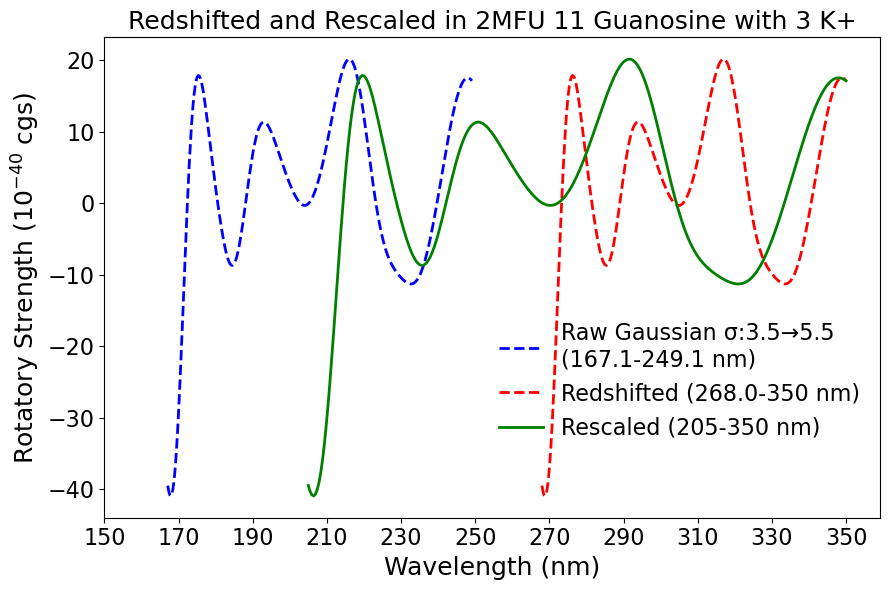

In [138]:
# Redshift and rescale, Guaussian 3.5 to 5.5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.ndimage import gaussian_filter1d
from scipy.special import wofz

# Step 0: Prerequisites settings
Taskname = "Style5_DynGauss_RES_2MFU_C3"  # Change this task name per project
filepath = f"../Raw_DFT/20May2025_2MFU-C3_TDDFT-TDA_CD_proj26.csv"

# Step 1: Read raw CD data
globals()[f"df_{Taskname}"] = pd.read_csv(filepath)
globals()[f"wavelength_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"cd_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# Step 2: Select region 130–250 nm
mask = (globals()[f"wavelength_{Taskname}"] >= 130) & (globals()[f"wavelength_{Taskname}"] <= 255)
globals()[f"wavelength_selected_{Taskname}"] = globals()[f"wavelength_{Taskname}"][mask]
globals()[f"cd_selected_{Taskname}"] = globals()[f"cd_raw_{Taskname}"][mask]

# Step 3: Gaussian broadening with fixed σ = 10
# globals()[f"cd_gauss_fixed_{Taskname}"] = gaussian_filter1d(globals()[f"cd_selected_{Taskname}"], sigma=10)

# Step 4: Gaussian broadening with variable σ from 3.5 to 5.5
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_selected_{Taskname}"].min(), globals()[f"wavelength_selected_{Taskname}"].max(), 300)
globals()[f"cd_gauss_variable_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])

globals()[f"cd_lorentz_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])
globals()[f"cd_voigt_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])

for wl, inten in zip(globals()[f"wavelength_selected_{Taskname}"], globals()[f"cd_selected_{Taskname}"]):
    frac = (wl - globals()[f"wavelength_selected_{Taskname}"].min()) / (globals()[f"wavelength_selected_{Taskname}"].max() - globals()[f"wavelength_selected_{Taskname}"].min())
    sigma_var = 3.5 - frac * (3.5 - 5.5)
    gamma = sigma_var  # for Lorentzian and Voigt

    # Gaussian
    gauss = inten * np.exp(-0.5 * ((globals()[f"x_grid_{Taskname}"] - wl) / sigma_var)**2)
    gauss /= sigma_var * np.sqrt(2 * np.pi)
    globals()[f"cd_gauss_variable_{Taskname}"] += gauss

    # Lorentzian
    lorentz = inten * (gamma / np.pi) / ((globals()[f"x_grid_{Taskname}"] - wl)**2 + gamma**2)
    globals()[f"cd_lorentz_{Taskname}"] += lorentz

    # Voigt (via complex error function)
    z = ((globals()[f"x_grid_{Taskname}"] - wl) + 1j * gamma) / (sigma_var * np.sqrt(2))
    voigt = inten * np.real(wofz(z)) / (sigma_var * np.sqrt(2 * np.pi))
    globals()[f"cd_voigt_{Taskname}"] += voigt

# Step 5: Redshift (max → 325 nm)
current_max = globals()[f"x_grid_{Taskname}"].max()
redshift = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + redshift
print(f"[INFO] Redshifted by: {round(redshift, 2)} nm to align max wavelength to 350 nm.")

# Step 6: Scaling (min → 200 nm)
current_min = globals()[f"x_redshifted_{Taskname}"].min()
scale_factor = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * scale_factor
print(f"[INFO] Scaled to minimum 205 nm with scale factor: {round(scale_factor, 3)}")

# Step 7: Plot all spectra
fig, ax = plt.subplots(figsize=(9,6))

# Gaussian fixed
# ax.plot(globals()[f"x_scaled_{Taskname}"], gaussian_filter1d(globals()[f"cd_selected_{Taskname}"], sigma=10), color="blue", label="Gaussian σ=10", linewidth=2)

# Gaussian dynamic
# ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="darkorange", label="Gaussian σ:8→3", linewidth=2)
ax.plot(globals()[f"x_grid_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="blue", linestyle="dashed", label="Raw Gaussian σ:3.5→5.5\n(167.1-249.1 nm)", linewidth=2)
ax.plot(globals()[f"x_redshifted_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="red", linestyle="dashed", label="Redshifted (268.0-350 nm)", linewidth=2)
ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="green", label="Rescaled (205-350 nm) ", linewidth=2)

# Lorentzian dynamic

# Voigt dynamic
#ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_voigt_{Taskname}"], color="green", label="Voigt (σ,γ:8→3)", linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontproperties=prop, size=18)
ax.set_ylabel("Rotatory Strength (10$^{\\mathrm{-40}}$ cgs)", color="black", fontproperties=prop, size=18)
plt.xticks(np.arange(150, 352, 20), fontsize=16)
plt.yticks(fontsize=16)
#ax.set_xlim(198, 325)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(1.00, 0.45))
#plt.title(f"{Taskname} Spectrum: Gaussian, Lorentzian, Voigt", size=18)
plt.title(f"Redshifted and Rescaled in 2MFU 11 Guanosine with 3 K+", fontproperties=prop, size=18)  
plt.tight_layout()
plt.savefig(f"../Figures/Shifted_Scaled/{Taskname}-Shifted_Scaled.png", dpi=600)
plt.show()

### 4.1.2 2MFU 8G 3K

[INFO] Redshifted by: 100.3 nm to align max wavelength to 350 nm.
[INFO] Scaled to minimum 205 nm with scale factor: 1.544


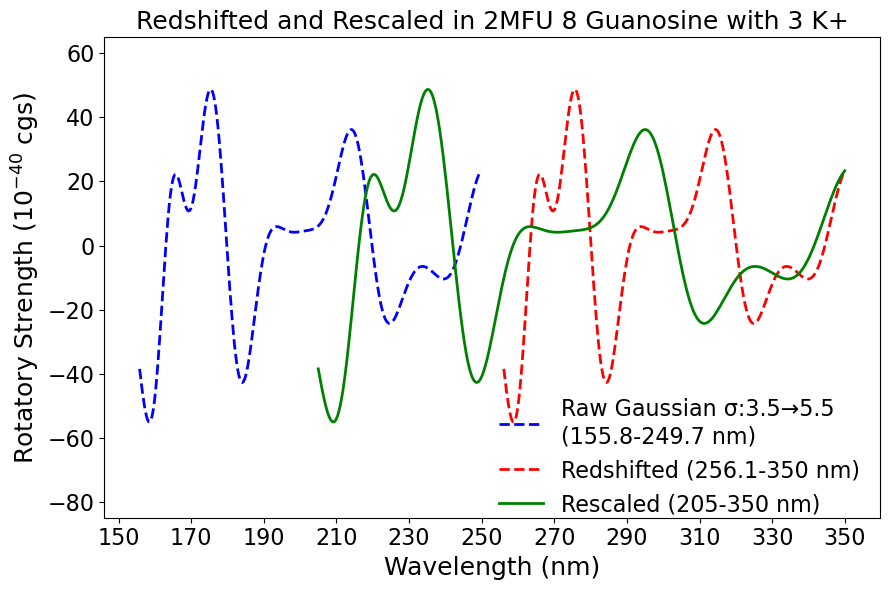

In [162]:
# Redshift and rescale, Guaussian 3.5 to 5.5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.ndimage import gaussian_filter1d
from scipy.special import wofz

# Step 0: Prerequisites settings
Taskname = "Style5_DynGauss_RES_2MFU_C4"  # Change this task name per project
filepath = f"../Raw_DFT/20May2025_2MFU-C4_TDDFT-TDA_CD_proj27.csv"

# Step 1: Read raw CD data
globals()[f"df_{Taskname}"] = pd.read_csv(filepath)
globals()[f"wavelength_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"cd_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# Step 2: Select region 130–250 nm
mask = (globals()[f"wavelength_{Taskname}"] >= 130) & (globals()[f"wavelength_{Taskname}"] <= 255)
globals()[f"wavelength_selected_{Taskname}"] = globals()[f"wavelength_{Taskname}"][mask]
globals()[f"cd_selected_{Taskname}"] = globals()[f"cd_raw_{Taskname}"][mask]

# Step 3: Gaussian broadening with fixed σ = 10
globals()[f"cd_gauss_fixed_{Taskname}"] = gaussian_filter1d(globals()[f"cd_selected_{Taskname}"], sigma=10)

# Step 4: Gaussian broadening with variable σ from 12 to 5
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_selected_{Taskname}"].min(), globals()[f"wavelength_selected_{Taskname}"].max(), 300)
globals()[f"cd_gauss_variable_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])

globals()[f"cd_lorentz_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])
globals()[f"cd_voigt_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])

for wl, inten in zip(globals()[f"wavelength_selected_{Taskname}"], globals()[f"cd_selected_{Taskname}"]):
    frac = (wl - globals()[f"wavelength_selected_{Taskname}"].min()) / (globals()[f"wavelength_selected_{Taskname}"].max() - globals()[f"wavelength_selected_{Taskname}"].min())
    sigma_var = 3.5 - frac * (3.5 - 5.5)
    gamma = sigma_var  # for Lorentzian and Voigt

    # Gaussian
    gauss = inten * np.exp(-0.5 * ((globals()[f"x_grid_{Taskname}"] - wl) / sigma_var)**2)
    gauss /= sigma_var * np.sqrt(2 * np.pi)
    globals()[f"cd_gauss_variable_{Taskname}"] += gauss

    # Lorentzian
    lorentz = inten * (gamma / np.pi) / ((globals()[f"x_grid_{Taskname}"] - wl)**2 + gamma**2)
    globals()[f"cd_lorentz_{Taskname}"] += lorentz

    # Voigt (via complex error function)
    z = ((globals()[f"x_grid_{Taskname}"] - wl) + 1j * gamma) / (sigma_var * np.sqrt(2))
    voigt = inten * np.real(wofz(z)) / (sigma_var * np.sqrt(2 * np.pi))
    globals()[f"cd_voigt_{Taskname}"] += voigt

# Step 5: Redshift (max → 350 nm)
current_max = globals()[f"x_grid_{Taskname}"].max()
redshift = 350 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + redshift
print(f"[INFO] Redshifted by: {round(redshift, 2)} nm to align max wavelength to 350 nm.")

# Step 6: Scaling (min → 205 nm)
current_min = globals()[f"x_redshifted_{Taskname}"].min()
scale_factor = (350 - 205) / (350 - current_min)
globals()[f"x_scaled_{Taskname}"] = 350 - (350 - globals()[f"x_redshifted_{Taskname}"]) * scale_factor
print(f"[INFO] Scaled to minimum 205 nm with scale factor: {round(scale_factor, 3)}")

# Step 7: Plot all spectra
fig, ax = plt.subplots(figsize=(9,6))

# Gaussian fixed
# ax.plot(globals()[f"x_scaled_{Taskname}"], gaussian_filter1d(globals()[f"cd_selected_{Taskname}"], sigma=10), color="blue", label="Gaussian σ=10", linewidth=2)

# Gaussian dynamic
# ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="darkorange", label="Gaussian σ:8→3", linewidth=2)
ax.plot(globals()[f"x_grid_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="blue", linestyle="dashed", label="Raw Gaussian σ:3.5→5.5\n(155.8-249.7 nm)", linewidth=2)
ax.plot(globals()[f"x_redshifted_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="red", linestyle="dashed", label="Redshifted (256.1-350 nm)", linewidth=2)
ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="green", label="Rescaled (205-350 nm) ", linewidth=2)

# Lorentzian dynamic

# Voigt dynamic
#ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_voigt_{Taskname}"], color="green", label="Voigt (σ,γ:8→3)", linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontproperties=prop, size=18)
ax.set_ylabel("Rotatory Strength (10$^{\\mathrm{-40}}$ cgs)", color="black", fontproperties=prop, size=18)
plt.xticks(np.arange(150, 352, 20), fontsize=16)
plt.yticks(fontsize=16)
#ax.set_xlim(198, 325)
ax.set_ylim(-85, 65)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(1.00, 0.29))
#plt.title(f"{Taskname} Spectrum: Gaussian, Lorentzian, Voigt", size=18)
plt.title(f"Redshifted and Rescaled in 2MFU 8 Guanosine with 3 K+", fontproperties=prop, size=18)  
plt.tight_layout()
plt.savefig(f"../Figures/Shifted_Scaled/{Taskname}-Shifted_Scaled.png", dpi=600)
plt.show()

### 4.1.3 2MKM-B4 Hairpin-2 4G. 

[INFO] Redshifted by: 83.7 nm to align max wavelength to 325 nm.
[INFO] Scaled to minimum 200 nm with scale factor: 1.131


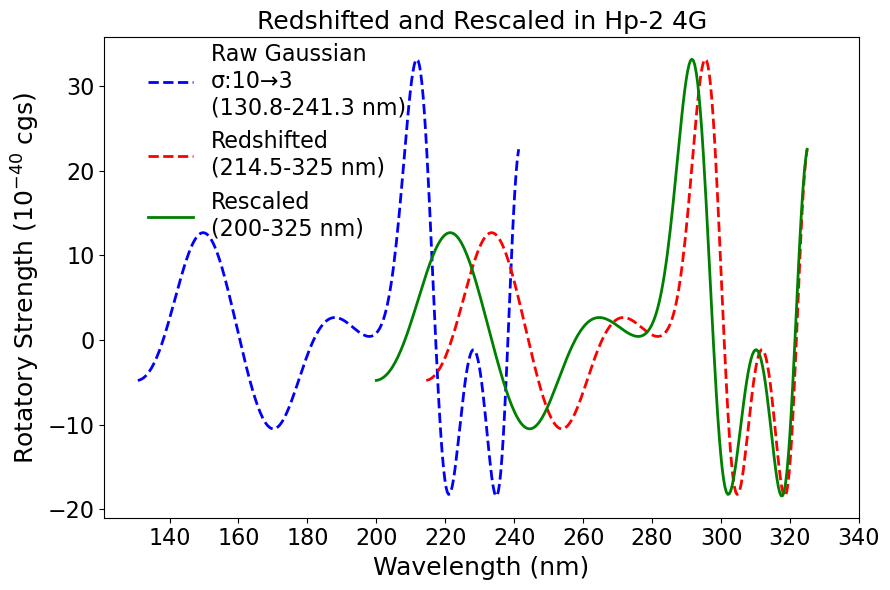

In [51]:
# Redshift and rescale, Guaussian 10 to 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.ndimage import gaussian_filter1d
from scipy.special import wofz

# Step 0: Prerequisites settings
Taskname = "Style1_DynGauss10to3_RES_2MKM_B4"  # Change this task name per project
filepath = f"../Raw_DFT/28Mar2025_2MKM-B4_TDDFT-TDA_CD_proj12.csv"

# Step 1: Read raw CD data
globals()[f"df_{Taskname}"] = pd.read_csv(filepath)
globals()[f"wavelength_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"cd_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# Step 2: Select region 130–250 nm
mask = (globals()[f"wavelength_{Taskname}"] >= 130) & (globals()[f"wavelength_{Taskname}"] <= 250)
globals()[f"wavelength_selected_{Taskname}"] = globals()[f"wavelength_{Taskname}"][mask]
globals()[f"cd_selected_{Taskname}"] = globals()[f"cd_raw_{Taskname}"][mask]

# Step 3: Gaussian broadening with fixed σ = 10
globals()[f"cd_gauss_fixed_{Taskname}"] = gaussian_filter1d(globals()[f"cd_selected_{Taskname}"], sigma=10)

# Step 4: Gaussian broadening with variable σ from 12 to 5
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_selected_{Taskname}"].min(), globals()[f"wavelength_selected_{Taskname}"].max(), 300)
globals()[f"cd_gauss_variable_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])

globals()[f"cd_lorentz_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])
globals()[f"cd_voigt_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])

for wl, inten in zip(globals()[f"wavelength_selected_{Taskname}"], globals()[f"cd_selected_{Taskname}"]):
    frac = (wl - globals()[f"wavelength_selected_{Taskname}"].min()) / (globals()[f"wavelength_selected_{Taskname}"].max() - globals()[f"wavelength_selected_{Taskname}"].min())
    sigma_var = 10 - frac * (10 - 3)
    gamma = sigma_var  # for Lorentzian and Voigt

    # Gaussian
    gauss = inten * np.exp(-0.5 * ((globals()[f"x_grid_{Taskname}"] - wl) / sigma_var)**2)
    gauss /= sigma_var * np.sqrt(2 * np.pi)
    globals()[f"cd_gauss_variable_{Taskname}"] += gauss

    # Lorentzian
    lorentz = inten * (gamma / np.pi) / ((globals()[f"x_grid_{Taskname}"] - wl)**2 + gamma**2)
    globals()[f"cd_lorentz_{Taskname}"] += lorentz

    # Voigt (via complex error function)
    z = ((globals()[f"x_grid_{Taskname}"] - wl) + 1j * gamma) / (sigma_var * np.sqrt(2))
    voigt = inten * np.real(wofz(z)) / (sigma_var * np.sqrt(2 * np.pi))
    globals()[f"cd_voigt_{Taskname}"] += voigt

# Step 5: Redshift (max → 325 nm)
current_max = globals()[f"x_grid_{Taskname}"].max()
redshift = 325 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + redshift
print(f"[INFO] Redshifted by: {round(redshift, 2)} nm to align max wavelength to 325 nm.")

# Step 6: Scaling (min → 200 nm)
current_min = globals()[f"x_redshifted_{Taskname}"].min()
scale_factor = (325 - 205) / (325 - current_min)
globals()[f"x_scaled_{Taskname}"] = 325 - (325 - globals()[f"x_redshifted_{Taskname}"]) * scale_factor
print(f"[INFO] Scaled to minimum 200 nm with scale factor: {round(scale_factor, 3)}")

# Step 7: Plot all spectra
fig, ax = plt.subplots(figsize=(9,6))

# Gaussian fixed
# ax.plot(globals()[f"x_scaled_{Taskname}"], gaussian_filter1d(globals()[f"cd_selected_{Taskname}"], sigma=10), color="blue", label="Gaussian σ=10", linewidth=2)

# Gaussian dynamic
# ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="darkorange", label="Gaussian σ:8→3", linewidth=2)
ax.plot(globals()[f"x_grid_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="blue", linestyle="dashed", label="Raw Gaussian\nσ:10→3\n(130.8-241.3 nm)", linewidth=2)
ax.plot(globals()[f"x_redshifted_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="red", linestyle="dashed", label="Redshifted\n(214.5-325 nm)", linewidth=2)
ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="green", label="Rescaled\n(200-325 nm) ", linewidth=2)

# Lorentzian dynamic

# Voigt dynamic
#ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_voigt_{Taskname}"], color="green", label="Voigt (σ,γ:8→3)", linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontproperties=prop, size=18)
ax.set_ylabel("Rotatory Strength (10$^{\\mathrm{-40}}$ cgs)", color="black", fontproperties=prop, size=18)
plt.xticks(np.arange(140, 341, 20), fontsize=16)
plt.yticks(fontsize=16)
#ax.set_xlim(198, 325)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.426, 1.03))
#plt.title(f"{Taskname} Spectrum: Gaussian, Lorentzian, Voigt", size=18)
plt.title(f"Redshifted and Rescaled in Hp-2 4G", fontproperties=prop, size=18)  
plt.tight_layout()
plt.savefig(f"../Figures/Shifted_Scaled/{Taskname}-Shifted_Scaled.png", dpi=600)
plt.show()

### 4.1.4 2MKM-B6 Cryptand-2 6G. (G-interstack)

[INFO] Redshifted by: 80.8 nm to align max wavelength to 325 nm.
[INFO] Scaled to minimum 200 nm with scale factor: 1.26


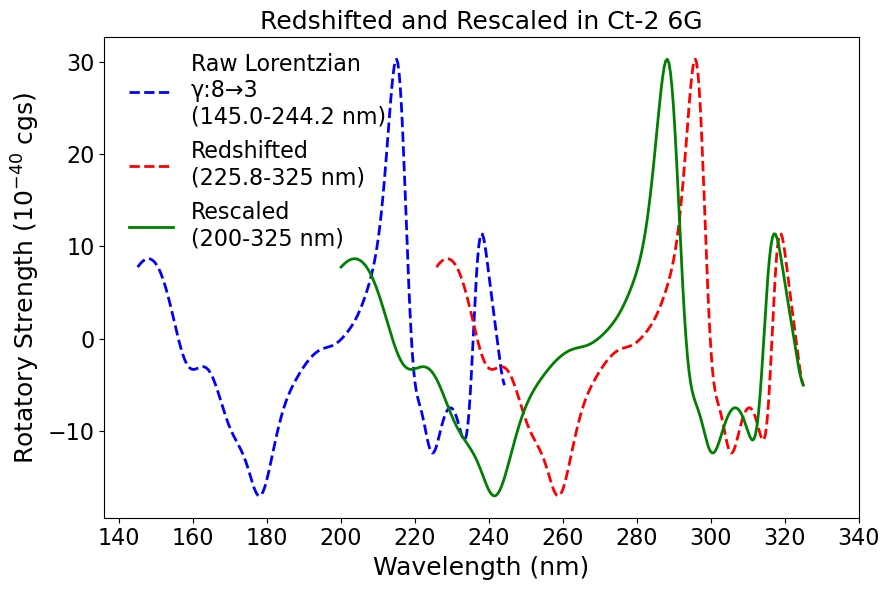

In [52]:
# Redshift and rescale, Lorentzian 5 to 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.ndimage import gaussian_filter1d
from scipy.special import wofz

# Step 0: Prerequisites settings
Taskname = "Style1_DynGauss5to3_RES_2MKM_B6"  # Change this task name per project
filepath = f"../Raw_DFT/28Mar2025_2MKM-B6_TDDFT-TDA_CD_proj14.csv"

# Step 1: Read raw CD data
globals()[f"df_{Taskname}"] = pd.read_csv(filepath)
globals()[f"wavelength_{Taskname}"] = globals()[f"df_{Taskname}"]["Wavelength(nm)"].values
globals()[f"cd_raw_{Taskname}"] = globals()[f"df_{Taskname}"]["R(ELEC)"].values

# Step 2: Select region 130–250 nm
mask = (globals()[f"wavelength_{Taskname}"] >= 130) & (globals()[f"wavelength_{Taskname}"] <= 250)
globals()[f"wavelength_selected_{Taskname}"] = globals()[f"wavelength_{Taskname}"][mask]
globals()[f"cd_selected_{Taskname}"] = globals()[f"cd_raw_{Taskname}"][mask]

# Step 3: Gaussian broadening with fixed σ = 10
globals()[f"cd_gauss_fixed_{Taskname}"] = gaussian_filter1d(globals()[f"cd_selected_{Taskname}"], sigma=10)

# Step 4: Gaussian broadening with variable σ from 8 to 3
globals()[f"x_grid_{Taskname}"] = np.linspace(globals()[f"wavelength_selected_{Taskname}"].min(), globals()[f"wavelength_selected_{Taskname}"].max(), 300)
globals()[f"cd_gauss_variable_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])

globals()[f"cd_lorentz_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])
globals()[f"cd_voigt_{Taskname}"] = np.zeros_like(globals()[f"x_grid_{Taskname}"])

for wl, inten in zip(globals()[f"wavelength_selected_{Taskname}"], globals()[f"cd_selected_{Taskname}"]):
    frac = (wl - globals()[f"wavelength_selected_{Taskname}"].min()) / (globals()[f"wavelength_selected_{Taskname}"].max() - globals()[f"wavelength_selected_{Taskname}"].min())
    sigma_var = 8 - frac * (8 - 3)
    gamma = sigma_var  # for Lorentzian and Voigt

    # Gaussian
    gauss = inten * np.exp(-0.5 * ((globals()[f"x_grid_{Taskname}"] - wl) / sigma_var)**2)
    gauss /= sigma_var * np.sqrt(2 * np.pi)
    globals()[f"cd_gauss_variable_{Taskname}"] += gauss

    # Lorentzian
    lorentz = inten * (gamma / np.pi) / ((globals()[f"x_grid_{Taskname}"] - wl)**2 + gamma**2)
    globals()[f"cd_lorentz_{Taskname}"] += lorentz

    # Voigt (via complex error function)
    z = ((globals()[f"x_grid_{Taskname}"] - wl) + 1j * gamma) / (sigma_var * np.sqrt(2))
    voigt = inten * np.real(wofz(z)) / (sigma_var * np.sqrt(2 * np.pi))
    globals()[f"cd_voigt_{Taskname}"] += voigt

# Step 5: Redshift (max → 325 nm)
current_max = globals()[f"x_grid_{Taskname}"].max()
redshift = 325 - current_max
globals()[f"x_redshifted_{Taskname}"] = globals()[f"x_grid_{Taskname}"] + redshift
print(f"[INFO] Redshifted by: {round(redshift, 2)} nm to align max wavelength to 325 nm.")

# Step 6: Scaling (min → 200 nm)
current_min = globals()[f"x_redshifted_{Taskname}"].min()
scale_factor = (325 - 205) / (325 - current_min)
globals()[f"x_scaled_{Taskname}"] = 325 - (325 - globals()[f"x_redshifted_{Taskname}"]) * scale_factor
print(f"[INFO] Scaled to minimum 200 nm with scale factor: {round(scale_factor, 3)}")

# Step 7: Plot all spectra
fig, ax = plt.subplots(figsize=(9,6))

# Gaussian fixed
# ax.plot(globals()[f"x_scaled_{Taskname}"], gaussian_filter1d(globals()[f"cd_selected_{Taskname}"], sigma=10), color="blue", label="Gaussian σ=10", linewidth=2)

# Gaussian dynamic
# ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_variable_{Taskname}"], color="darkorange", label="Gaussian σ:8→3", linewidth=2)

# Lorentzian dynamic
ax.plot(globals()[f"x_grid_{Taskname}"], globals()[f"cd_lorentz_{Taskname}"], color="blue", linestyle="dashed", label="Raw Lorentzian\nγ:8→3\n(145.0-244.2 nm)", linewidth=2)
ax.plot(globals()[f"x_redshifted_{Taskname}"], globals()[f"cd_lorentz_{Taskname}"], color="red", linestyle="dashed", label="Redshifted\n(225.8-325 nm)", linewidth=2)
ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_lorentz_{Taskname}"], color="green", label="Rescaled\n(200-325 nm) ", linewidth=2)

# Voigt dynamic
#ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_voigt_{Taskname}"], color="green", label="Voigt (σ,γ:8→3)", linewidth=2)

ax.set_xlabel("Wavelength (nm)", fontproperties=prop, size=18)
ax.set_ylabel("Rotatory Strength (10$^{\\mathrm{-40}}$ cgs)", color="black", fontproperties=prop, size=18)
plt.xticks(np.arange(140, 341, 20), fontsize=16)
plt.yticks(fontsize=16)
#ax.set_xlim(198, 325)
plt.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.40, 1.01))
#plt.title(f"{Taskname} Spectrum: Gaussian, Lorentzian, Voigt", size=18)
plt.title(f"Redshifted and Rescaled in Ct-2 6G", fontproperties=prop, size=18)  
plt.tight_layout()
plt.savefig(f"../Figures/Shifted_Scaled/{Taskname}-Shifted_Scaled.png", dpi=600)
plt.show()

### 4.2 DFT Species: Gaussian filter, fix width 10

### 4.2 DFT Species: Fitting curve merge together.

### 4.2.1 DFT Species for S1,S2,S3

In [ ]:
Style1_FixedGauss_Norman5_2MKM_B6
ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_deps_{Taskname}"], color="#1f77b4", label="Fixed σ:3", linewidth=2) # Dark blue
ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_variable_fixed5_{Taskname}"], color="red", label="Fixed σ:5", linewidth=2)
ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_variable_fixed8_{Taskname}"], color="green", label="Fixed σ:8", linewidth=2)
ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_variable_fixed10_{Taskname}"], color="#9467bd", label="Fixed σ:10", linewidth=2) # violet purple
ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_variable_fixed12_{Taskname}"], color="#ff7f0e", label="Fixed σ:12", linewidth=2) # Orange
ax.plot(globals()[f"x_scaled_{Taskname}"], globals()[f"cd_gauss_variable_fixed15_{Taskname}"], color="black", label="Fixed σ:15", linewidth=2)

spectrum_converted_sigma_ 

In [ ]:
# Species:
"
Style4_DynAll_Norman_DeltaEps_2MKM_A2
Style4_DynAll_Norman_DeltaEps_2MKM_A1
Style4_DynAll_Norman_DeltaEps_2MKM_B4
Style4_DynAll_Norman_DeltaEps_2MKM_B6
Style4_DynAll_Norman_DeltaEps_2MKM_B1
Style4_DynAll_Norman_DeltaEps_2MKM_A3
"

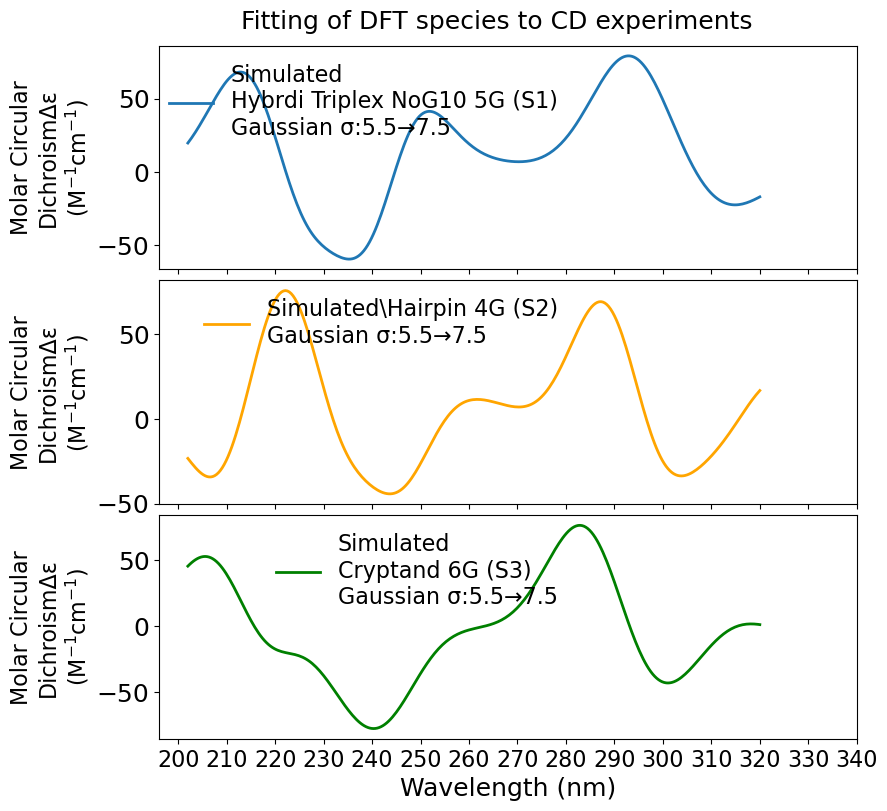

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.special import wofz

# Create three subplots aligned vertically with a common x-axis.
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(9, 9), gridspec_kw={'hspace': 0.05})  # hspace调整间距

# list of data and color.
plot_data = [
    {
        "x": x_scaled_Style4_DynAll_Norman_DeltaEps_2MKM_A2,
        "y": cd_gauss_deps_Style4_DynAll_Norman_DeltaEps_2MKM_A2,
        "color": "#1f77b4", # Better blue color
        "label": "Simulated\nHybrdi Triplex NoG10 5G (S1)\nGaussian σ:5.5→7.5",
    },
    {
        "x": x_scaled_Style4_DynAll_Norman_DeltaEps_2MKM_B4,
        "y": cd_gauss_deps_Style4_DynAll_Norman_DeltaEps_2MKM_B4,
        "color": "orange",
        "label": "Simulated\Hairpin 4G (S2)\nGaussian σ:5.5→7.5",
    },
    {
        "x": x_scaled_Style4_DynAll_Norman_DeltaEps_2MKM_B6,
        "y": cd_gauss_deps_Style4_DynAll_Norman_DeltaEps_2MKM_B6,
        "color": "green",
        "label": "Simulated\nCryptand 6G (S3)\nGaussian σ:5.5→7.5",
    }
]

# Foor loop, filling
for i, ax in enumerate(axs):
    ax.plot(plot_data[i]["x"], plot_data[i]["y"], color=plot_data[i]["color"], label=plot_data[i]["label"], linewidth=2)
    ax.set_ylabel("Molar Circular\nDichroismΔε\n(M$^{-1}$cm$^{-1}$)", fontsize=16)
    ax.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.60, 1.01))
    ax.tick_params(axis='both', labelsize=18)
    # ax.set_xlim(198, 325)
    plt.xticks(np.arange(200, 341, 10), fontsize=16)
    if i < 2:
        ax.tick_params(labelbottom=False)  # X axis only at the bottom one,

# United X axis
axs[-1].set_xlabel("Wavelength (nm)", fontproperties=prop, size=18)

# Titles positio
plt.suptitle("Fitting of DFT species to CD experiments", fontproperties=prop, size=18, y=0.92)

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Space for the title
plt.savefig("../Figures/DFT_Species/DFT_species_All_3Subplots_6May2025.png", dpi=600)
plt.show()

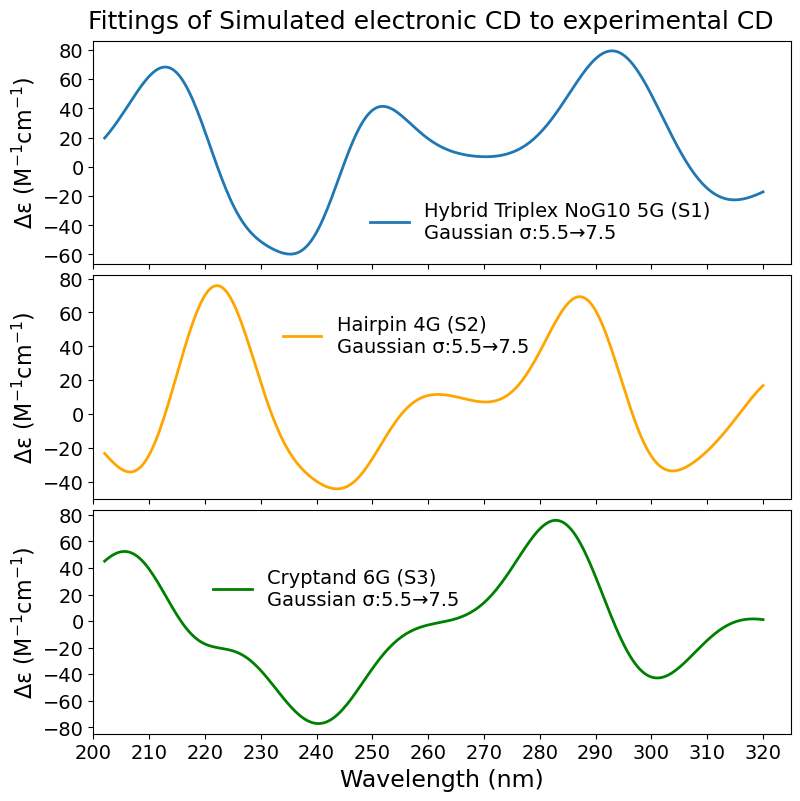

In [126]:
import matplotlib.pyplot as plt

# Create three subplots aligned vertically with a common x-axis.
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(9, 9), gridspec_kw={'hspace': 0.05})

# === 1st Subplot：S1 Hybrid Triplex ===
ax1.plot(x_scaled_Style4_DynAll_Norman_DeltaEps_2MKM_A2, 
         cd_gauss_deps_Style4_DynAll_Norman_DeltaEps_2MKM_A2, 
         color="#1f77b4", linewidth=2,
         label="Hybrid Triplex NoG10 5G (S1)\nGaussian σ:5.5→7.5")
ax1.set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
ax1.legend(loc='upper right', fontsize=14, frameon=False, bbox_to_anchor=(0.91, 0.36))
ax1.tick_params(axis='both', labelsize=14)
ax1.set_yticks(np.arange(-60, 81, 20))

# === 2nd Subplot：S2 Hairpin ===
ax2.plot(x_scaled_Style4_DynAll_Norman_DeltaEps_2MKM_B4, 
         cd_gauss_deps_Style4_DynAll_Norman_DeltaEps_2MKM_B4, 
         color="orange", linewidth=2,
         label="Hairpin 4G (S2)\nGaussian σ:5.5→7.5")
ax2.set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
ax2.legend(loc='upper right', fontsize=14, frameon=False, bbox_to_anchor=(0.65, 0.90))
ax2.tick_params(axis='both', labelsize=14)
ax2.tick_params(labelbottom=False)
ax2.set_yticks(np.arange(-40, 81, 20))

# === 3rd Subplot：S3 Cryptand ===
ax3.plot(x_scaled_Style4_DynAll_Norman_DeltaEps_2MKM_B6, 
         cd_gauss_deps_Style4_DynAll_Norman_DeltaEps_2MKM_B6, 
         color="green", linewidth=2,
         label="Cryptand 6G (S3)\nGaussian σ:5.5→7.5")
ax3.set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)
ax3.legend(loc='upper right', fontsize=14, frameon=False, bbox_to_anchor=(0.55, 0.82))
ax3.tick_params(axis='both', labelsize=14)
ax3.set_xlabel("Wavelength (nm)", fontsize=17)
ax3.set_yticks(np.arange(-80, 81, 20))
ax3.set_xticks(np.arange(200, 341, 10))

# Titles, figure saved
plt.suptitle("Fittings of Simulated electronic CD to experimental CD", fontsize=18, y=0.915)
plt.xlim(200, 325)
#plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("../Figures/DFT_Species/DFT_species_All_3Subplots_6May2025_refined.png", dpi=600)
plt.show()

TypeError: 'Axes' object is not iterable

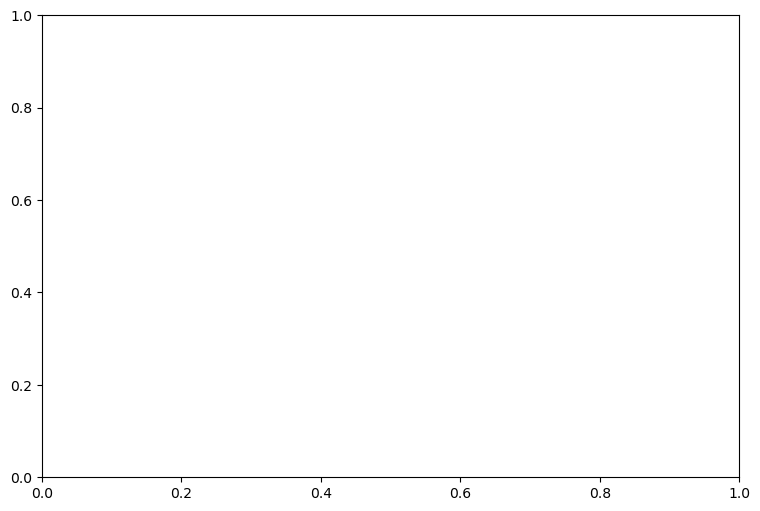

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.special import wofz

# Create three subplots aligned vertically with a common x-axis.
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(9, 6), gridspec_kw={'hspace': 0.05})  # hspace

# list of data and color.
plot_data = [
    {
        "x": x_scaled_Style4_DynAll_Norman_DeltaEps_2MFU_C3,
        "y": cd_gauss_deps_Style4_DynAll_Norman_DeltaEps_2MFU_C3,
        "color": "#1f77b4", # Better blue color
        "label": "Simulated\n2MFU 11 Guanosine with 3 K+\nGaussian σ:3.5→5.5",
    }
]

# Foor loop, filling
for i, ax in enumerate(axs):
    ax.plot(plot_data[i]["x"], plot_data[i]["y"], color=plot_data[i]["color"], label=plot_data[i]["label"], linewidth=2)
    ax.set_ylabel("Molar Circular\nDichroismΔε\n(M$^{-1}$cm$^{-1}$)", fontsize=16)
    ax.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(0.60, 1.01))
    ax.tick_params(axis='both', labelsize=18)
    # ax.set_xlim(198, 325)
    plt.xticks(np.arange(200, 352, 10), fontsize=16)
    if i < 2:
        ax.tick_params(labelbottom=False)  # X axis only at the bottom one,

# United X axis
axs[-1].set_xlabel("Wavelength (nm)", fontproperties=prop, size=18)

# Titles positio
plt.suptitle("Fitting of DFT species to CD experiments", fontproperties=prop, size=18, y=0.92)

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Space for the title
plt.savefig("../Figures/DFT_Species/DFT_species_2MFU_11Gonly_24May2025.png", dpi=600)
plt.show()

# Taskname = "Style4_DynAll_Norman_DeltaEps_2MFU_C3"
# globals()[f"filepath_{Taskname}"] = "../Raw_DFT/20May2025_2MFU-C3_TDDFT-TDA_CD_proj26.csv"

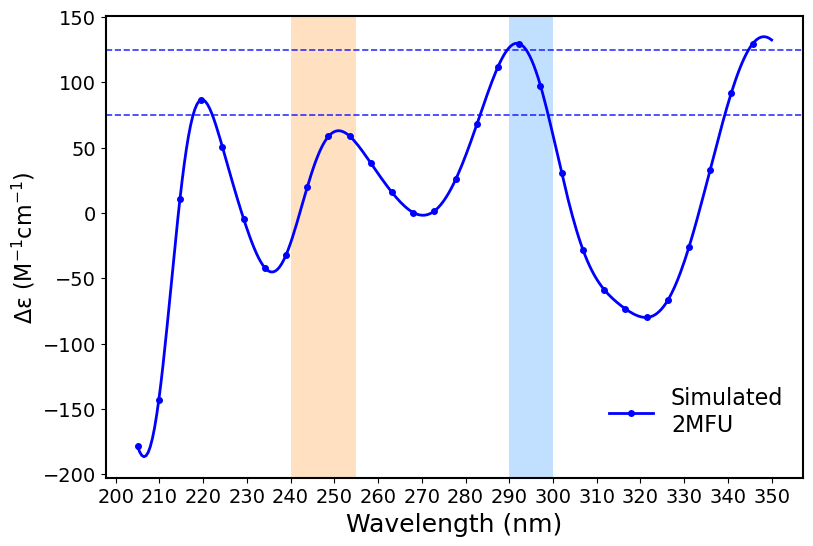

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.special import wofz

# Example input data (replace with your actual variables)
# These are mock arrays; replace them with your actual arrays
# Create a single subplot (not a list of Axes)
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(9, 6), gridspec_kw={'hspace': 0.05})

# Define the plotting data
plot_data = [
    {
        "x": x_scaled_Style4_DynAll_Norman_DeltaEps_2MFU_C3,
        "y": cd_gauss_deps_Style4_DynAll_Norman_DeltaEps_2MFU_C3,
        "color": "blue",  # Better blue
        "label": "Simulated\n2MFU"
        #"label": "Simulated\n2MFU 11 Guanosine with 3 K+\nGaussian σ:3.5→5.5",
    }
]

# Since axs is a single Axes object, assign it to 'ax' directly
ax = axs

# Plot the spectrum
ax.plot(
    plot_data[0]["x"],
    plot_data[0]["y"],
    color=plot_data[0]["color"],
    label=plot_data[0]["label"],
    linewidth=2,
    marker='o',           # circle marker
    markersize=4,         # marker size
    markevery=10          # place marker every 10 data points
)


# Set Y label
ax.set_ylabel("Δε (M$^{-1}$cm$^{-1}$)", fontsize=16)

# Set legend
ax.legend(loc='upper right', fontsize=16, frameon=False, bbox_to_anchor=(1.00, 0.24))

# Thicken the border of the plot
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # Adjust as needed (e.g., 1.2–2.0)
    
# Tick formatting
ax.tick_params(axis='both', labelsize=16)

# Set X ticks and optional limits
plt.xticks(np.arange(200, 352, 10), fontsize=14)
plt.yticks(fontsize=14)
# ax.set_xlim(198, 325)  # Uncomment if desired

# Set X-axis label
# If you're using custom font properties, define 'prop'; else, remove it.
# Example: from matplotlib import font_manager; prop = font_manager.FontProperties(family='Arial')
prop = None  # Placeholder; remove 'fontproperties=prop' below if not using

ax.set_xlabel("Wavelength (nm)", fontproperties=prop, size=18)


# Color bands — mimic orange/blue zones in reference figure
ax.axvspan(240, 255, facecolor='#ffcc99', alpha=0.6, zorder=0, linewidth=1.0)
ax.axvspan(290, 300, facecolor='#99ccff', alpha=0.6, zorder=0, linewidth=1.0)

# Horizontal cutoff lines at Δε values
CD_cutoffs = [75, 125]  # y-axis Δε cutoffs
for cutoff in CD_cutoffs:
    ax.axhline(y=cutoff, color='blue', linestyle='--', linewidth=1.2, alpha=0.8)

# Sup title for overall plot
# Add global title
# plt.suptitle("Fitting of DFT species to CD experiments", fontproperties=prop, size=18, y=0.92)

# Save figure to file
plt.savefig("../Figures/DFT_Species/DFT_species_2MFU_11Gonly_24May2025.png", dpi=300)

# Show the plot
plt.show()
